This Project Made by Farid Hossain .

## **Covid-19: Comparative Data Analysis and Prediction for the World and Bangladesh.**

-----------------------

#**Introduction**

 The COVID-19 pandemic has had a profound impact on global public health, economies, and daily life. On January 30, 2020, the World Health Organization (WHO) declared the SARS-CoV-2 outbreak a Public Health Emergency of International Concern (PHEIC), emphasizing the urgent need for scientific research, data-driven decision-making, and predictive analytics. The crisis has spurred a global effort to develop effective diagnostic tools, vaccines, and therapeutics, with researchers worldwide leveraging data science and machine learning to understand and combat the virus.

This project, "Covid-19: Comparative Data Analysis and Prediction for the World and Bangladesh," aims to analyze COVID-19 trends across different regions, with a specific focus on Bangladesh. Using advanced data analysis techniques, including Predictive Data Modeling (PDM), classification algorithms, and deep learning frameworks like TensorFlow, this study seeks to identify patterns in infection rates, mortality, and recovery trends. The project integrates datasets from sources such as Kaggle, WHO, and national health organizations, including data from Bangladesh and China, to compare the outbreak's dynamics globally and locally.

By utilizing Python-based tools like pandas and Matplotlib, this research will provide insightful visualizations and predictive models that can aid policymakers, healthcare professionals, and researchers in preparing for future outbreaks. Open data sharing and transparent research methodologies will be emphasized to ensure that findings contribute meaningfully to the ongoing global fight against COVID-19.

Importing all the Libraries that we need to do this project work

In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Imported a dataset of Covid 19 where the data is stored upto 15th November, 2020

In [7]:
import pandas as pd
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "covid_19_data1.csv"
file_path = os.path.join(base_path, file_name)

# Check if the file exists
if os.path.exists(file_path):
    try:
        # Load the dataset (handle encoding errors)
        df = pd.read_csv(file_path, encoding="utf-8")
        print("? Successfully loaded:", file_name)
        print(df.head())  # Show first 5 rows
    except UnicodeDecodeError:
        print("? Unicode error! Trying a different encoding...")
        try:
            df = pd.read_csv(file_path, encoding="ISO-8859-1")  # Alternative encoding
            print("? Successfully loaded with ISO-8859-1 encoding!")
            print(df.head())
        except Exception as e:
            print("? Failed to load the file:", e)
    except Exception as e:
        print("? Error loading file:", e)
else:
    print("? File NOT FOUND:", file_name)


Mounted at /content/drive
? Successfully loaded: covid_19_data1.csv
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  


Shape of the dataset

In [8]:
df.shape

(85638, 8)

Information regarding the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85638 entries, 0 to 85637
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              85638 non-null  int64  
 1   ObservationDate  85638 non-null  object 
 2   Province/State   57338 non-null  object 
 3   Country/Region   85638 non-null  object 
 4   Last Update      85638 non-null  object 
 5   Confirmed        85638 non-null  float64
 6   Deaths           85638 non-null  float64
 7   Recovered        85638 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.2+ MB


We will convert the ObservationDate and Last Update to datetime since they are currently taken as object

In [10]:
# Convert 'ObservationDate' to datetime
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Convert 'Last Update' to datetime with the correct format
df['Last Update'] = pd.to_datetime(df['Last Update'], format='%m/%d/%Y %H:%M', errors='coerce')


# Verify the conversion
print(df[['ObservationDate', 'Last Update']].head())



  ObservationDate         Last Update
0      2020-01-22 2020-01-22 17:00:00
1      2020-01-22 2020-01-22 17:00:00
2      2020-01-22 2020-01-22 17:00:00
3      2020-01-22 2020-01-22 17:00:00
4      2020-01-22 2020-01-22 17:00:00


The counts for 'Confirmed' , 'Deaths' and 'Recovered' will be converted into int datatype for the simplicity of the usage

In [11]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

Since the final count of the cases is present on 12th August, 2020 we are trying to create a separate dataframe for the same

In [12]:
from datetime import date
recent = df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

SNo ObservationDate     Province/State  Country/Region Last Update  \
84896  84897      2020-08-12                NaN     Afghanistan         NaT   
84897  84898      2020-08-12                NaN         Albania         NaT   
84898  84899      2020-08-12                NaN         Algeria         NaT   
84899  84900      2020-08-12                NaN         Andorra         NaT   
84900  84901      2020-08-12                NaN          Angola         NaT   
...      ...             ...                ...             ...         ...   
85633  85634      2020-08-12  Zaporizhia Oblast         Ukraine         NaT   
85634  85635      2020-08-12            Zeeland     Netherlands         NaT   
85635  85636      2020-08-12           Zhejiang  Mainland China         NaT   
85636  85637      2020-08-12    Zhytomyr Oblast         Ukraine         NaT   
85637  85638      2020-08-12       Zuid-Holland     Netherlands         NaT   

       Confirmed  Deaths  Recovered  
84896      37345    1354      26694  
84897       6817     208       3552  
84898      36699    1333      25627  
84899        977      53        855  
84900       1762      80        577  
...          ...     ...        ...  
85633        971      22        680  
85634        950      69          0  
85635       1275       1       1268  
85636       2215      48       1574  
85637      15765    1314          0  

[742 rows x 8 columns]

Out of the 156291 records we are now left with only 758 and many of the records don't have the Province defined

In [13]:
import pandas as pd

# Load dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Check initial number of records
print(f"Initial number of records: {df.shape[0]}")

# Display missing values count in Province/State
missing_province = df['Province/State'].isnull().sum()
print(f"Missing 'Province/State' values: {missing_province}")

# Handle missing values in Province/State (Options)
df['Province/State'].fillna("Unknown", inplace=True)  # Option 1: Fill with 'Unknown'
# df.dropna(subset=['Province/State'], inplace=True)  # Option 2: Remove rows where Province is missing

# Apply filtering conditions (Modify as per need)
filtered_df = df[df['Confirmed'] > 0]  # Example filter: Keeping only confirmed cases

# Check remaining records after filtering
print(f"Remaining records after filtering: {filtered_df.shape[0]}")

# Save filtered data if needed
filtered_df.to_csv("filtered_covid_data.csv", index=False)

# Display a preview
print(filtered_df.head())


Initial number of records: 85638
Missing 'Province/State' values: 28300
Remaining records after filtering: 84790
   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
5    6      01/22/2020      Guangdong  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
5       26.0     0.0        0.0  


# **These are the provinces that are basically a not part of China**

**Whenever provinces are null, we replace them with the country name and group mainland China and China together in China**

In [14]:
  # Check the column names to ensure they are correct
print(df_update.columns)

# Replace null 'Province/State' with the 'Country/Region' name
df_update['Province/State'] = df_update['Province/State'].fillna(df_update['Country/Region'])

# Group mainland China and China together
df_update['Country/Region'] = df_update['Country/Region'].replace('Mainland China', 'China')

# Check if the missing values are replaced
df_update.isnull().sum()


Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


SNo                  0
ObservationDate      0
Province/State       0
Country/Region       0
Last Update        742
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [15]:
 # Ensure the DataFrame is not a slice to avoid SettingWithCopyWarning
df_update = df_update.copy()
df = df.copy()

# Fill missing 'Province/State' values with the corresponding 'Country/Region'
df_update.loc[:, 'Province/State'] = df_update['Province/State'].fillna(df_update['Country/Region'])
df.loc[:, 'Province/State'] = df['Province/State'].fillna(df['Country/Region'])

# Display the result
print(df_update[['Country/Region', 'Province/State']].head())
print(df[['Country/Region', 'Province/State']].head())


      Country/Region Province/State
84896    Afghanistan    Afghanistan
84897        Albania        Albania
84898        Algeria        Algeria
84899        Andorra        Andorra
84900         Angola         Angola
   Country/Region Province/State
0  Mainland China          Anhui
1  Mainland China        Beijing
2  Mainland China      Chongqing
3  Mainland China         Fujian
4  Mainland China          Gansu


In [16]:
 # Ensure df_update and df are independent copies to avoid SettingWithCopyWarning
df_update = df_update.copy()
df = df.copy()

# Replace 'Mainland China' with 'China' using .replace()
df_update.loc[:, 'Country/Region'] = df_update['Country/Region'].replace('Mainland China', 'China')
df.loc[:, 'Country/Region'] = df['Country/Region'].replace('Mainland China', 'China')

# Display the updated data
print(df_update[['Country/Region']].drop_duplicates())  # Show unique country names
print(df[['Country/Region']].drop_duplicates())  # Show unique country names


      Country/Region
84896    Afghanistan
84897        Albania
84898        Algeria
84899        Andorra
84900         Angola
...              ...
85110        Germany
85125         Sweden
85160        Ukraine
85251      Hong Kong
85340          Macau

[190 rows x 1 columns]
              Country/Region
0                      China
12                 Hong Kong
20                     Macau
28                    Taiwan
31                        US
...                      ...
12387  Sao Tome and Principe
13705                  Yemen
19963                Comoros
20090             Tajikistan
24221                Lesotho

[223 rows x 1 columns]


We are performing the encoding of the country to CountryID and Province to ProvinceID

In [17]:
 from sklearn.preprocessing import LabelEncoder

# Ensure df_update is a copy of the original DataFrame to avoid chained assignment issues
df_update = df_update.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply Label Encoding using .loc to avoid SettingWithCopyWarning
df_update.loc[:, 'ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update.loc[:, 'CountryID'] = le.fit_transform(df_update['Country/Region'])

# Display the updated DataFrame
df_update.head()


SNo ObservationDate Province/State Country/Region Last Update  \
84896  84897      2020-08-12    Afghanistan    Afghanistan         NaT   
84897  84898      2020-08-12        Albania        Albania         NaT   
84898  84899      2020-08-12        Algeria        Algeria         NaT   
84899  84900      2020-08-12        Andorra        Andorra         NaT   
84900  84901      2020-08-12         Angola         Angola         NaT   

       Confirmed  Deaths  Recovered  ProvinceID  CountryID  
84896      37345    1354      26694           3          0  
84897       6817     208       3552          10          1  
84898      36699    1333      25627          12          2  
84899        977      53        855          22          3  
84900       1762      80        577          23          4

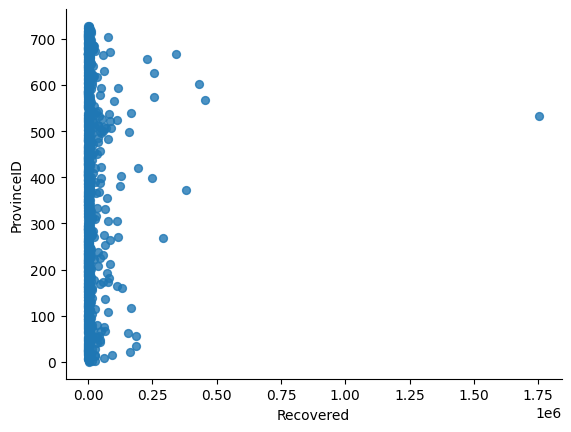

In [18]:
# @title Recovered vs ProvinceID

from matplotlib import pyplot as plt
df_update.plot(kind='scatter', x='Recovered', y='ProvinceID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Presenting the Heatmap for all the 'Confirmed','Recovered' and 'Casualties' with respect to the ProvinceID and CountryID

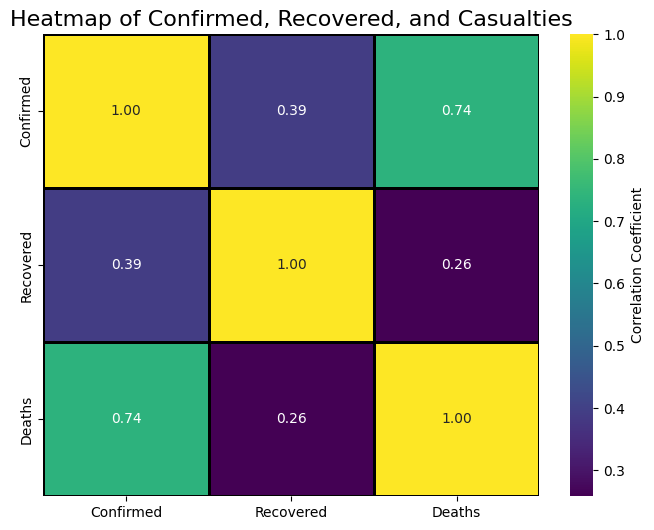

In [19]:
  # Select only the numeric columns
df_numeric = df_update[['Confirmed', 'Recovered', 'Deaths']]

# Calculate the correlation
corr = df_numeric.corr()

# Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Increase figure size for better readability
sns.heatmap(corr, annot=True, cmap='viridis', cbar_kws={'label': 'Correlation Coefficient'}, fmt=".2f", linewidths=1, linecolor='black')

# Title and labels
plt.title('Heatmap of Confirmed, Recovered, and Casualties', fontsize=16)
plt.show()


**********************

## A. Finding out How many countries were affected by Covid-19

In [20]:
import pandas as pd

# Load dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Get unique countries
affected_countries = df['Country/Region'].nunique()

# Print the result
print(f"Total number of countries affected by COVID-19: {affected_countries}")



Total number of countries affected by COVID-19: 223


Total number of countries affected by COVID-19: 223


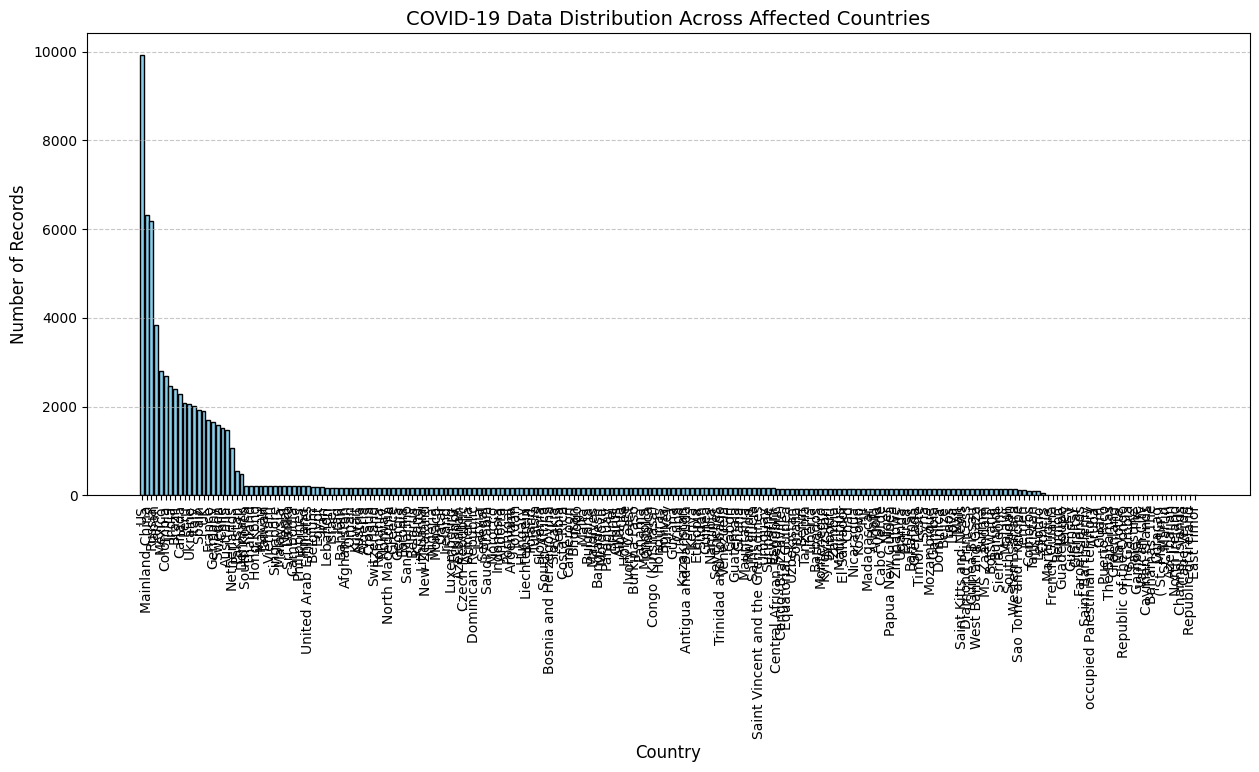

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Count occurrences of each country
country_counts = df['Country/Region'].value_counts()

# Get the number of unique affected countries
affected_countries = country_counts.shape[0]

# Print the total number of affected countries
print(f"Total number of countries affected by COVID-19: {affected_countries}")

# Plot the histogram
plt.figure(figsize=(15, 6))
plt.bar(country_counts.index, country_counts.values, color='skyblue', edgecolor='black')

# Labeling the histogram
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)
plt.title("COVID-19 Data Distribution Across Affected Countries", fontsize=14)
plt.xticks(rotation=90)  # Rotate country names for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


**How many countries were affected by Covid-19 in the world Sow  in Map**


In [22]:
 import folium
import pandas as pd
import numpy as np
from folium.plugins import FloatImage
from IPython.display import display

# Load dataset (Ensure df_update contains 'Country/Region' and 'Confirmed' columns)
df_update['Confirmed'] = pd.to_numeric(df_update['Confirmed'], errors='coerce').fillna(0)

# Country-wise latitude and longitude dataset (Example list for key countries)
country_coords = {
    "Bangladesh": [23.685, 90.3563],
    "India": [20.5937, 78.9629],
    "China": [35.8617, 104.1954],
    "USA": [37.0902, -95.7129],
    "Italy": [41.8719, 12.5674],
    "Spain": [40.4637, -3.7492],
    "Brazil": [-14.2350, -51.9253],
    "Russia": [61.5240, 105.3188],
    "UK": [55.3781, -3.4360],
    "Germany": [51.1657, 10.4515],
}

# List of countries or regions to exclude from marking (e.g., "Country" or "Mohadesh")
excluded_countries = ["Country", "Mohadesh"]

# Create the base map centered on the world
m = folium.Map(location=[20, 0], zoom_start=2, tiles="cartodbpositron")

# Function to determine marker color
def get_color(confirmed_cases):
    if confirmed_cases > 1_000_000:
        return 'darkred'
    elif confirmed_cases > 500_000:
        return 'red'
    elif confirmed_cases > 100_000:
        return 'orange'
    elif confirmed_cases > 10_000:
        return 'yellow'
    else:
        return 'green'

# Normalize radius sizes to avoid excessive overlaps
def get_radius(confirmed_cases):
    return np.log1p(confirmed_cases) * 2  # Logarithmic scaling

# Loop through dataframe and add markers
for _, row in df_update.iterrows():
    country = row['Country/Region']
    confirmed = row['Confirmed']

    # Skip excluded countries or regions
    if country in excluded_countries:
        continue

    if country in country_coords and confirmed > 0:
        location = country_coords[country]
        popup_text = f"<b>{country}</b><br>Confirmed Cases: {confirmed:,}"

        folium.CircleMarker(
            location=location,
            radius=get_radius(confirmed),
            color=get_color(confirmed),
            fill=True,
            fill_color=get_color(confirmed),
            fill_opacity=0.6,
            popup=folium.Popup(popup_text, parse_html=True)
        ).add_to(m)

# Create a custom legend as an HTML element
legend_html = '''
<div style="position: fixed; bottom: 50px; left: 50px; width: 220px; background-color: white;
            z-index:9999; font-size:14px; padding: 10px; border-radius: 8px; border: 2px solid grey;">
    <b>COVID-19 Severity Levels</b><br>
    <div style="background-color: darkred; width: 20px; height: 20px; display: inline-block;"></div> 1M+ Cases <br>
    <div style="background-color: red; width: 20px; height: 20px; display: inline-block;"></div> 500K+ Cases <br>
    <div style="background-color: orange; width: 20px; height: 20px; display: inline-block;"></div> 100K+ Cases <br>
    <div style="background-color: yellow; width: 20px; height: 20px; display: inline-block;"></div> 10K+ Cases <br>
    <div style="background-color: green; width: 20px; height: 20px; display: inline-block;"></div> <10K Cases <br>
</div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map inside Jupyter Notebook
display(m)



***********

## B. Percentage of confirmed cases per country through the Pie-chart

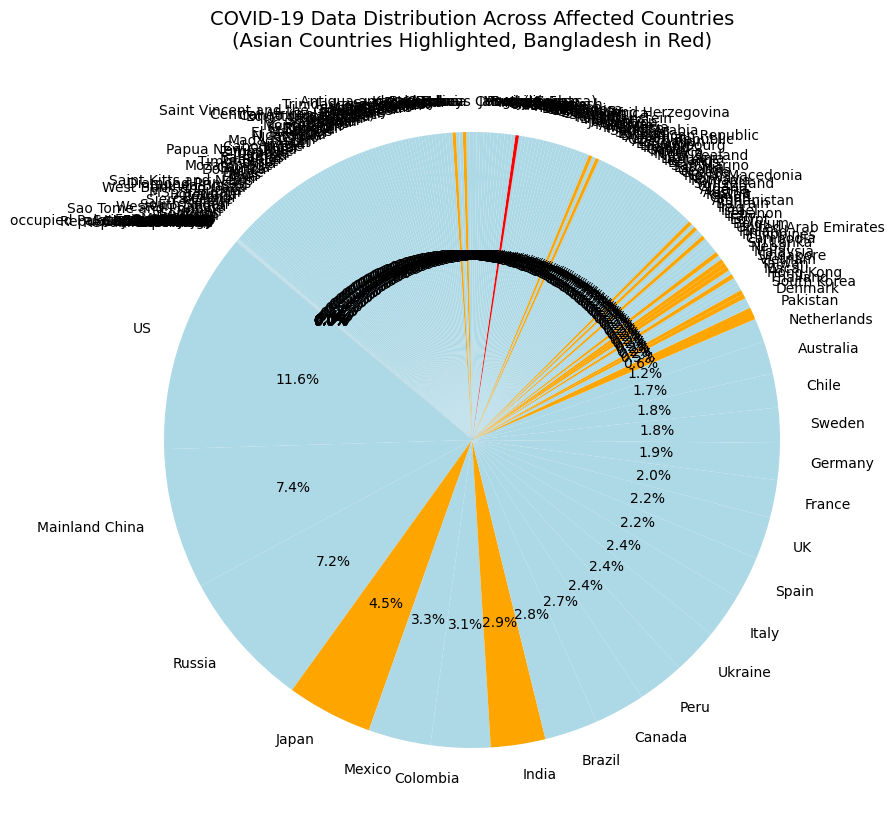

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Count occurrences of each country
country_counts = df['Country/Region'].value_counts()

# List of Asian countries (you can add more if needed)
asian_countries = [
    "Bangladesh", "India", "China", "Pakistan", "Japan", "South Korea", "Indonesia",
    "Malaysia", "Thailand", "Vietnam", "Philippines", "Sri Lanka", "Nepal", "Myanmar",
    "Afghanistan", "Iran", "Iraq", "Saudi Arabia", "UAE", "Turkey", "Kazakhstan"
]

# Assign colors:
colors = []
for country in country_counts.index:
    if country == "Bangladesh":
        colors.append("red")  # Highlight Bangladesh in Red
    elif country in asian_countries:
        colors.append("orange")  # Highlight other Asian countries in Orange
    else:
        colors.append("lightblue")  # Rest of the world in Light Blue

# Plot the pie chart
plt.figure(figsize=(15, 10))
plt.pie(
    country_counts,
    labels=country_counts.index,
    autopct='%1.1f%%',
    colors=colors,
    startangle=140
)

# Title
plt.title("COVID-19 Data Distribution Across Affected Countries\n(Asian Countries Highlighted, Bangladesh in Red)", fontsize=14)

# Show plot
plt.show()






Approximately 11.6% of the total confirmed cases of the world is found at United States of America

After USA, there are India and Brazil;, the 2nd and 3rd most affected countries in the world where the percentage of confirmed cases reported with respect to the world is 16.27% and 10.78% respectively

****************

## C. Top 5 countries having most number of confirmed cases till 15th November, 2020

**The overall number of global coronavirus cases has surpassed the 43 million mark, while the deaths have increased to over1.16 million, according to the Johns Hopkins University.**

1. The United States tops 8.7 million coronavirus case. The United States on Tuesday surpassed 8,704,606 novel coronavirus cases, according to Johns Hopkins University. The pandemic has now claimed the lives of at least 225,735 people in the United States, which leads the world in the number of confirmed infections.

2. India is now the second worst-affected country by COVID-19.India's novel Coronavirus tally crossed the 7.9 million mark on Tuesday with detection of less than 40,000 new cases in the last 24 hours, the Indian Health Ministry said. The state of Maharashtra, Andhra Pradesh, Tamil Nadu, Karnataka and Uttar Pradesh were among the five worst-affected states in India.

3. Brazil with more than 5.4 million cases. Third, in the list of the worst affected countries, Brazil has more than 5.4 million confirmed cases, according to Johns Hopkins University. The country has so far reported 5,409,854 total cases and 157,397 deaths due to coronavirus.

4. Russia with more than 1.5 million cases. Russia reported more than 1,537,142 cases of coronavirus infections so far and 26,409 deaths. The country has the fourth-highest number of infections behind the United States, India and Brazil, but the number of new cases has seen a stellar rise every day in the past month.

5. France with 1.2 million coronavirus cases. France&#39;s novel coronavirus tally crossed the 1.2 million mark on Tuesday with the death toll rising to 35,052, according to John Hopkins University.

In [24]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

Country/Region  Confirmed  Recovered  Deaths
0             US    5197118    1753760  166026
1         Brazil    3164785    2506228  104201
2          India    2396637    1695982   47033
3         Russia     900745     708900   15231
4   South Africa     568919     432029   11010

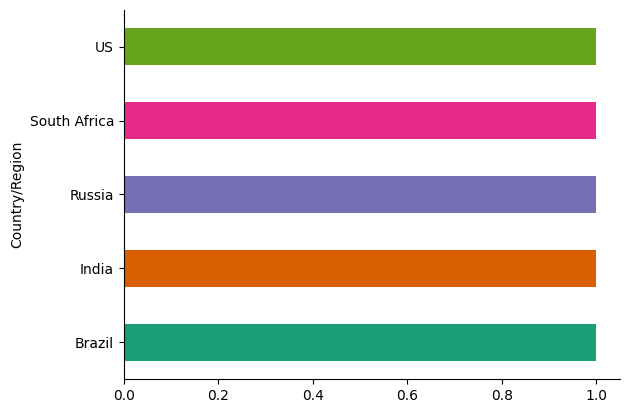

In [25]:
# @title Country/Region

from matplotlib import pyplot as plt
import seaborn as sns
group_cases.groupby('Country/Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
import pandas as pd

# Sample Data (Replace with your actual DataFrame)
data = {
    'Country': ['Bangladesh', 'USA', 'India', 'Italy', 'Brazil'],
    'Confirmed': [50000, 1000000, 900000, 400000, 700000],
    'Recovered': [45000, 800000, 850000, 350000, 650000],
    'Deaths': [5000, 50000, 40000, 50000, 30000]
}

# Create DataFrame
group_cases = pd.DataFrame(data)
group_cases.set_index('Country', inplace=True)

# Calculate Recovery Rate and Death Rate
group_cases['Recovery Rate'] = round(group_cases['Recovered'] / group_cases['Confirmed'], 2)
group_cases['Death Rate'] = round(group_cases['Deaths'] / group_cases['Confirmed'], 2)

# Sort by Confirmed Cases
group_cases = group_cases.sort_values(by='Confirmed', ascending=False)

# Define function to highlight Bangladesh
def highlight_bangladesh(row):
    return ['background-color: red; color: white' if row.name == 'Bangladesh' else '' for _ in row]

# Apply styling: Green gradient + Bangladesh in red
styled_df = group_cases.style.apply(highlight_bangladesh, axis=1).background_gradient(cmap='Greens')

# Display styled DataFrame in Jupyter Notebook
from IPython.core.display import display
display(styled_df)



**Representing the Top 5 most affected countries with gradient, where darker the colour is values of that particular area is the greatest**

In [27]:
group_cases['Recovery Rate']=round(group_cases['Recovered'] / group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths'] / group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed', ascending= False)
group_cases.style.background_gradient(cmap='Greens')

*************

## D. Plotting the Bar Graph representation where it's showing the Confirmed cases, Recovered cases and Death tolls in the Top 5 affected countries till 15th November, 2020

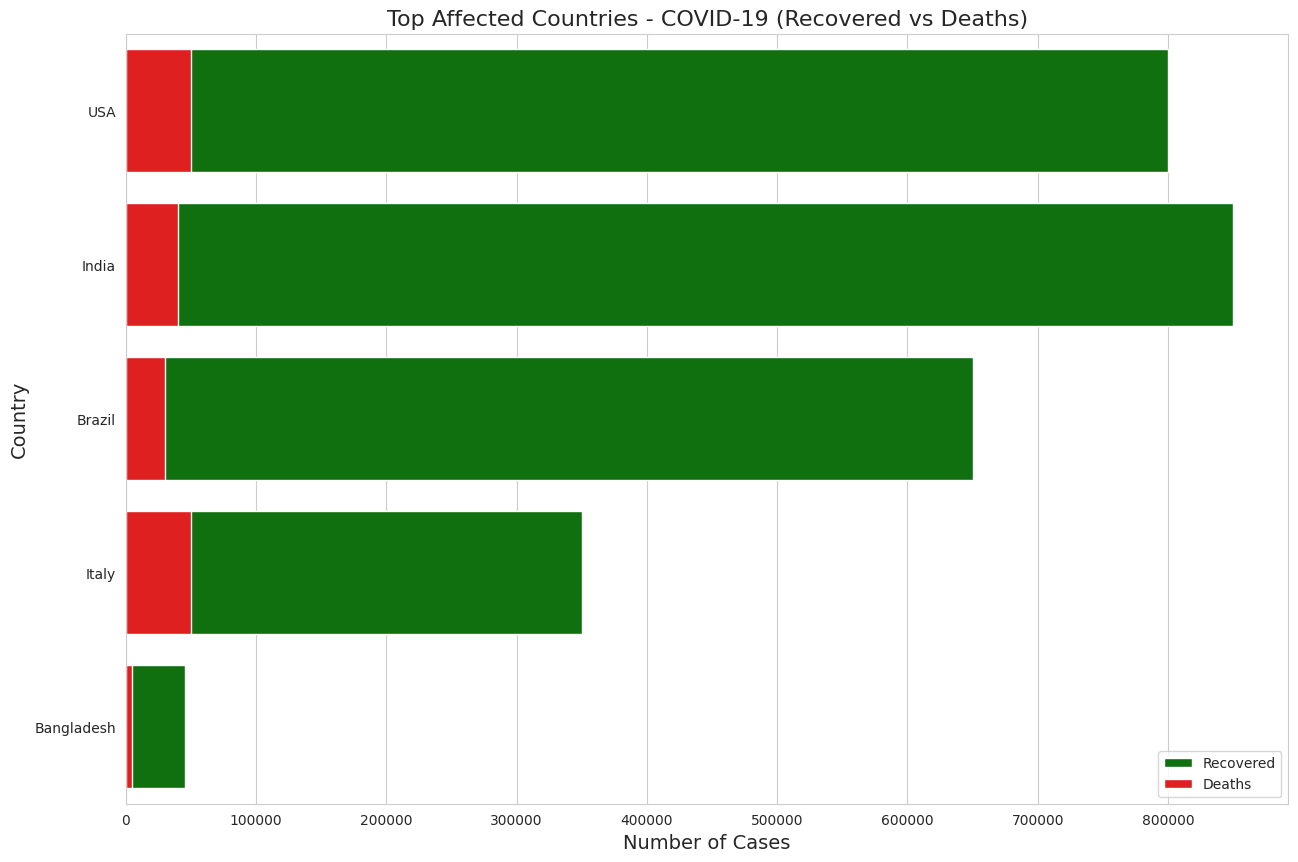

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index to make 'Country' a column
group_cases_reset = group_cases.reset_index()

# Create the plot for the top 5 affected countries based on Recovered and Deaths
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")

# Plot bars for Recovered and Deaths
bar1 = sns.barplot(x="Recovered", y="Country", data=group_cases_reset, label="Recovered", color="g")
bar2 = sns.barplot(x="Deaths", y="Country", data=group_cases_reset, label="Deaths", color="r")

# Add title and labels
plt.title("Top Affected Countries - COVID-19 (Recovered vs Deaths)", fontsize=16)
plt.xlabel("Number of Cases", fontsize=14)
plt.ylabel("Country", fontsize=14)
plt.legend(loc="lower right")

# Show the plot
plt.show()



*************

  ```````## E. Recovered Cases v/s Death Cases in the Top 5 countries

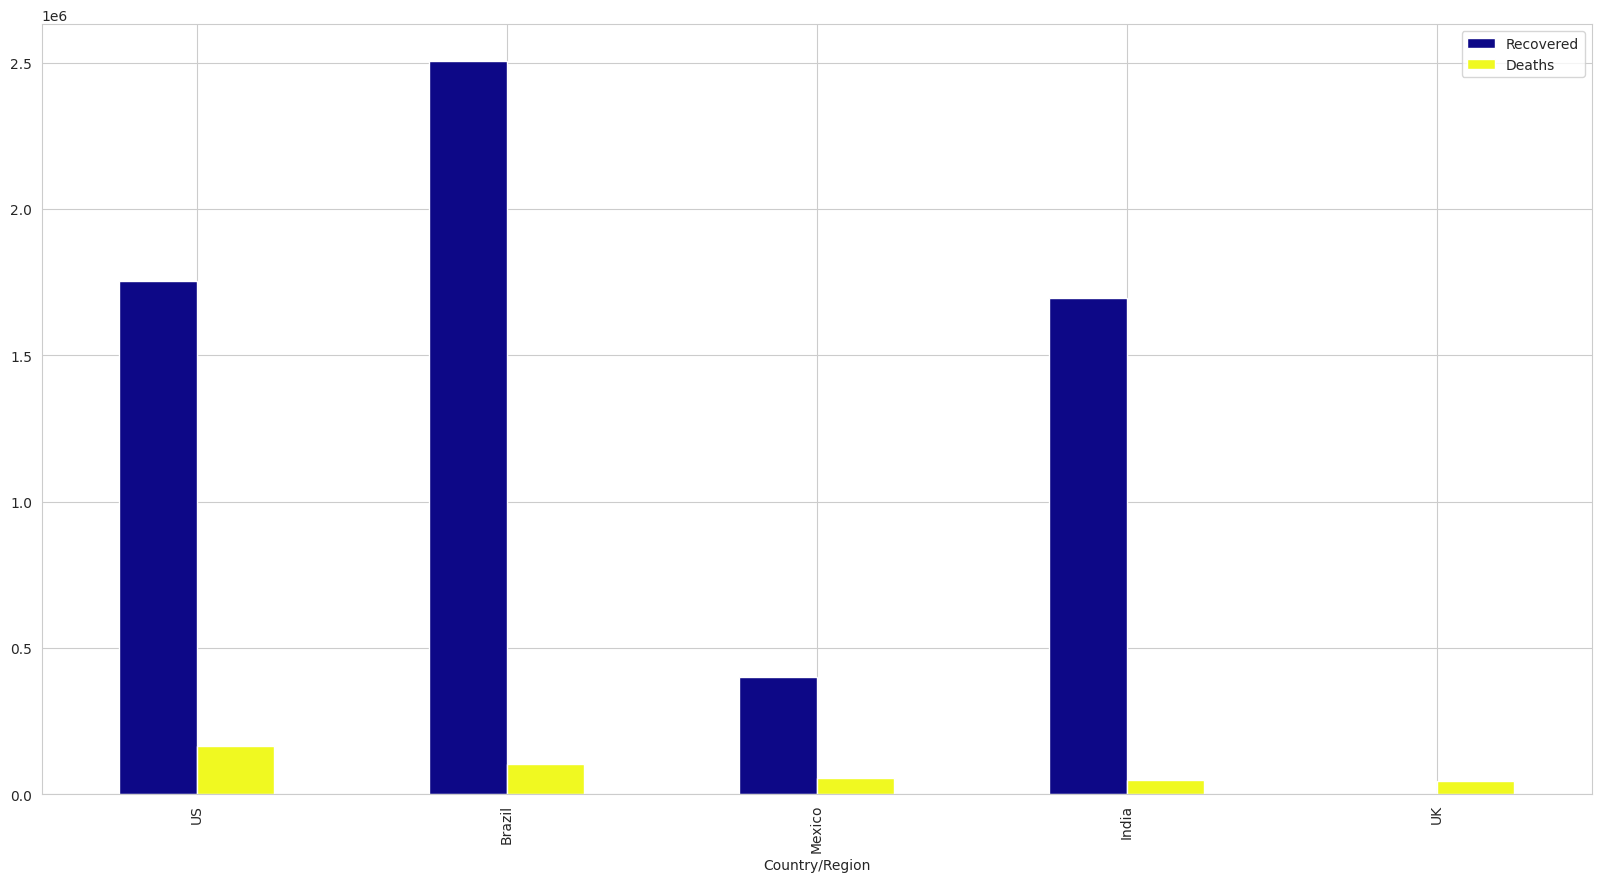

In [29]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

********************
******************

# Chapter 1 : China - The First Epicentre of the pandemic

- On December 29 th Wuhan City government starts to trace cases

- On January 4 th Shanghai lab detects coronavirus similar to SARS

- On January 6 th Wuhan doctor, 13 nurses infected after operating on infected patient

- On January 7 th Pathogen identified as novel coronavirus

- On January 13 th Incubation period identified as 14 days

- On January 17 th Baibuting neighbourhood in Wuhan holds Lunar New Year banquet

- On January 19 th Pulmonologist Nanshan Zhong announces human- to-human spread

- On January 20 th Annual Spring Festival travel rush begins in Hubei Province

- On January 23 rd Wuhan placed under quarantine

- On January 23 rd Announced new hospital to be built in 10 days

- On January 26 th Hundreds of medical staff, equipment and food sent to Wuhan

- On January 28 th Thousands more medical workers sent to Wuhan  (1/28-1/29)

- On February 1 st Member of Chinese Academy of Science leads team to support Wuhan

- On February 2 nd China Central Bank carried out a reverse repurchase of 1.2 trillion RMB ($170B)

- On February 3 rd First Wuhan field hospital opens; More hospitals built overnight

- On February 5 th Diagnostic criteria expanded

- On February 9 th Another 3,187 medical workers sent to Hubei Province

- On February 10 th 19 provinces partner with 16 cities in Hubei for assistance

- On February 12 th Hubei Province incorporates diagnostic change

- On February 14 th Wuhan asks recovered patients to donate plasma

- On February 19 th Another 1,299 medical workers sent to Wuhan as city disinfects sewage

- On February 24 th China bans trade, consumption of wild animals, and postpones annual parliamentary meeting

- On February 26 th Daily new cases outside China surpass those inside the country

- On February 29 th China-WHO joint investigation report on COVID-19 published

- On April 15 th China issued revised death and case count


### A. Since China is the first epicentre of this pandemic situation, we are checking for provinces within China to detect the spread out of the virus

In [30]:
china_cases=df_update.loc[df_update['Country/Region']=='China']

Dataset Columns: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


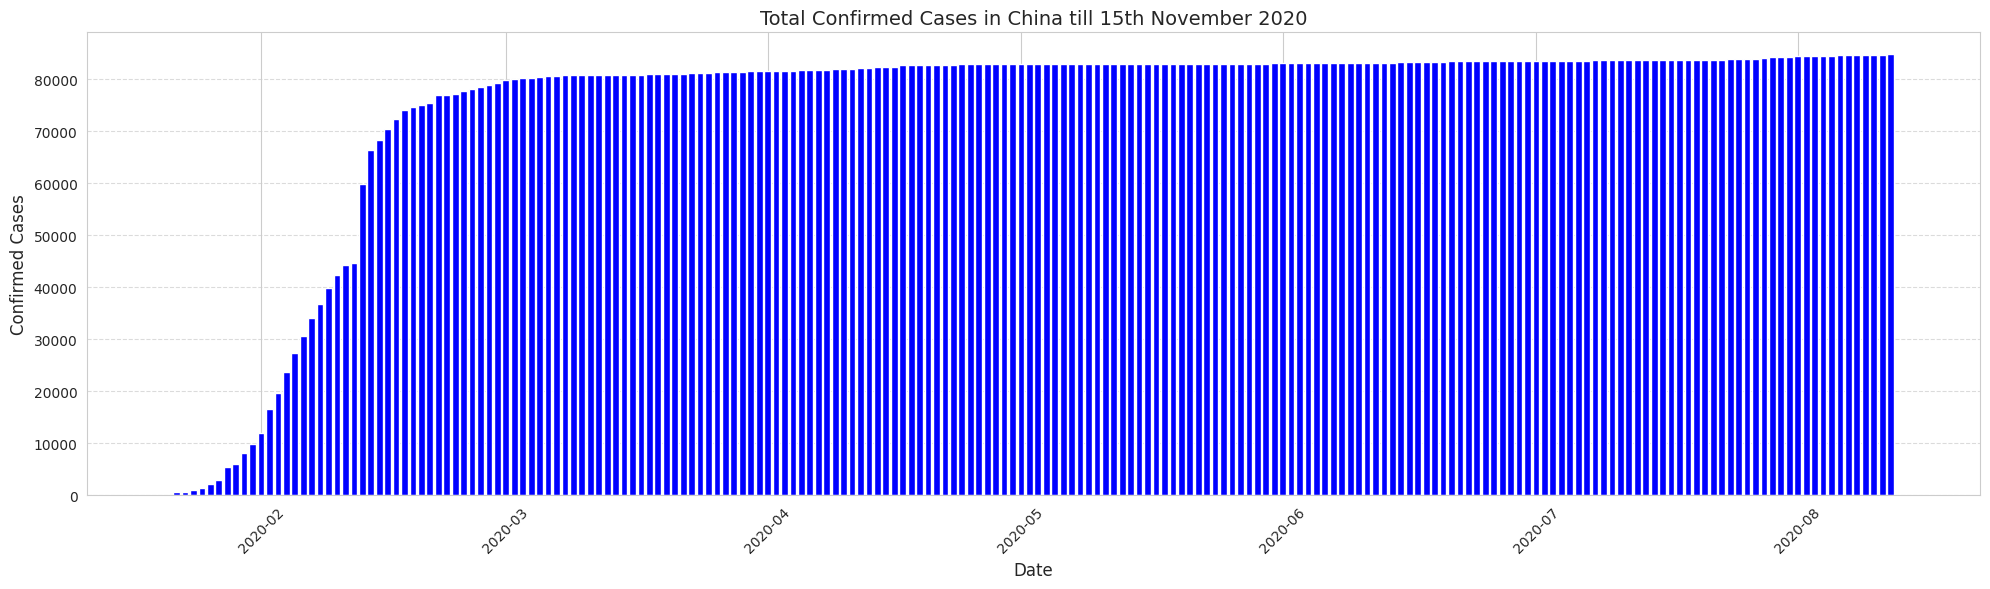

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Make sure to use the correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Print column names to verify
print("Dataset Columns:", df.columns)

# Ensure that 'Country/Region' column exists, and select China data
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")
china_cases = df[df[country_column].str.contains('China', case=False, na=False)].copy()

# Check if the date column exists
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Convert 'ObservationDate' to datetime format if needed
china_cases[date_column] = pd.to_datetime(china_cases[date_column], errors='coerce')

# Aggregate confirmed cases by date
num_plot_china = china_cases.groupby(date_column)[['Confirmed']].sum().reset_index()

# Ensure the date column is named 'date' for consistency
if 'date' not in num_plot_china.columns:
    possible_date_columns = [col for col in num_plot_china.columns if 'date' in col.lower()]
    if possible_date_columns:
        num_plot_china.rename(columns={possible_date_columns[0]: 'date'}, inplace=True)
    else:
        print("Error: No date-related column found. Check your dataset!")
        exit()

# Ensure 'Confirmed' column exists
if 'Confirmed' not in num_plot_china.columns:
    print("Error: 'Confirmed' column not found in the dataset!")
    exit()

# Sort the data by date
num_plot_china.sort_values(by='date', inplace=True)

# Plot confirmed cases in China
plt.figure(figsize=(20, 6))
plt.bar(num_plot_china['date'], num_plot_china['Confirmed'], color='blue', width=0.8)

# Formatting the plot
plt.title('Total Confirmed Cases in China till 15th November 2020', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



The above representation is showing that the most affected are or, Province in China is Hubei where the confirmed cases are reached to 70000 and approximately 90% of the cases of Total China's Confirmed Cases

### B. The per-day statistics of China where the line graph shows flattening of curve confirmed cases. However on 17th April there was a sudden rise in the Death and Confirmed cases

Dataset Columns: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


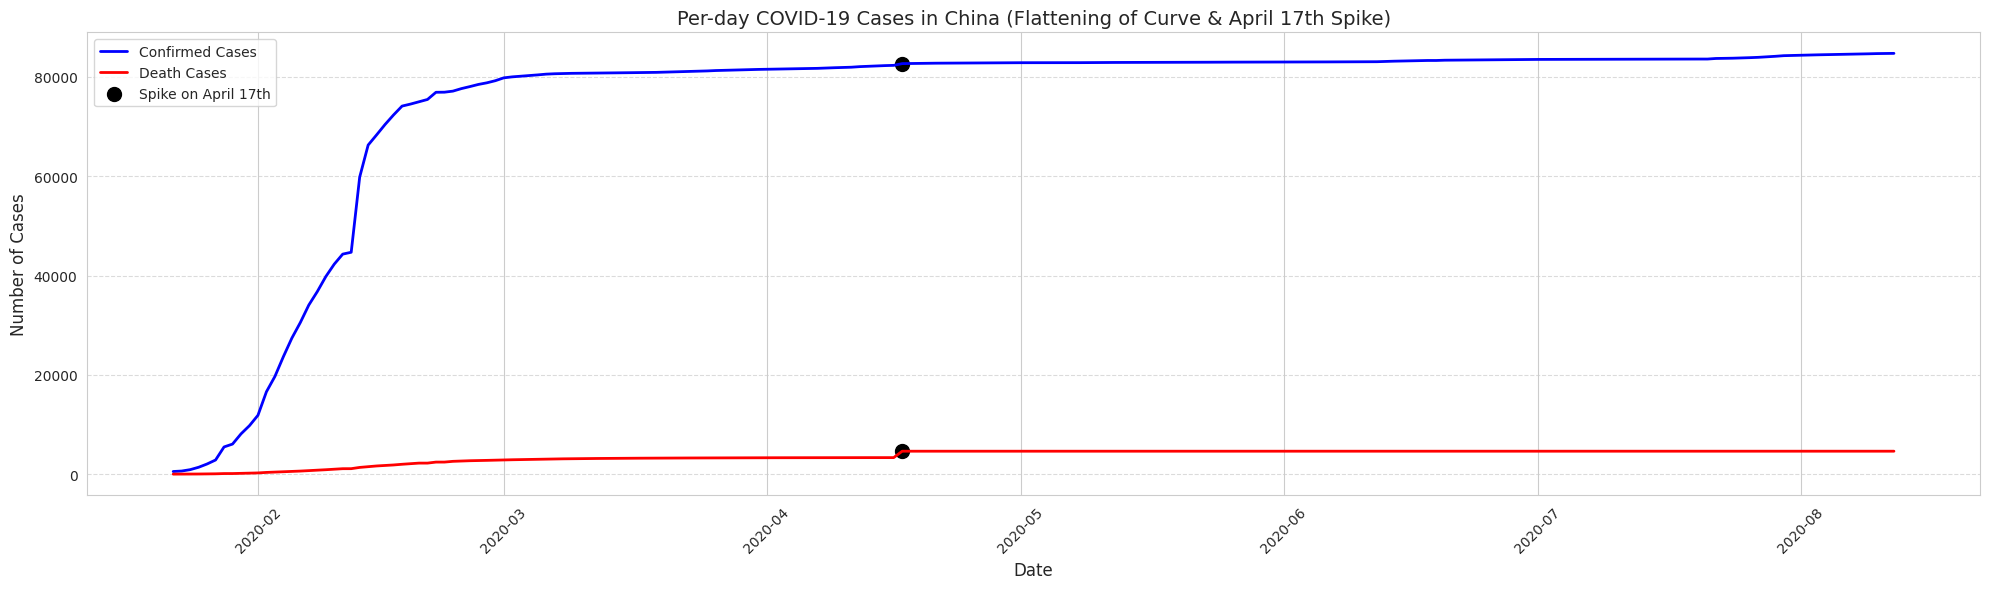

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Print column names to verify
print("Dataset Columns:", df.columns)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Select China data
china_cases = df[df[country_column].str.contains('China', case=False, na=False)].copy()

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Convert date column to datetime format
china_cases[date_column] = pd.to_datetime(china_cases[date_column], errors='coerce')

# Aggregate confirmed and death cases by date
num_plot_china = china_cases.groupby(date_column)[['Confirmed', 'Deaths']].sum().reset_index()

# Ensure the date column is named 'date' for consistency
num_plot_china.rename(columns={date_column: 'date'}, inplace=True)

# Ensure necessary columns exist
if 'Confirmed' not in num_plot_china.columns or 'Deaths' not in num_plot_china.columns:
    raise ValueError("Error: Missing 'Confirmed' or 'Deaths' column in the dataset!")

# Sort by date
num_plot_china.sort_values(by='date', inplace=True)

# Plot line graph for confirmed and death cases
plt.figure(figsize=(20, 6))
plt.plot(num_plot_china['date'], num_plot_china['Confirmed'], label='Confirmed Cases', color='blue', linewidth=2)
plt.plot(num_plot_china['date'], num_plot_china['Deaths'], label='Death Cases', color='red', linewidth=2)

# Highlight sudden spike on April 17, 2020
april_17 = num_plot_china[num_plot_china['date'] == '2020-04-17']
if not april_17.empty:
    plt.scatter(april_17['date'], april_17['Confirmed'], color='black', s=100, label='Spike on April 17th')
    plt.scatter(april_17['date'], april_17['Deaths'], color='black', s=100)

# Formatting the plot
plt.title('Per-day COVID-19 Cases in China (Flattening of Curve & April 17th Spike)', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


This graph shows how much stiff the growth rate is in the past months of February and March

Dataset Columns: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')
Unique values in 'Country/Region': ['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indon

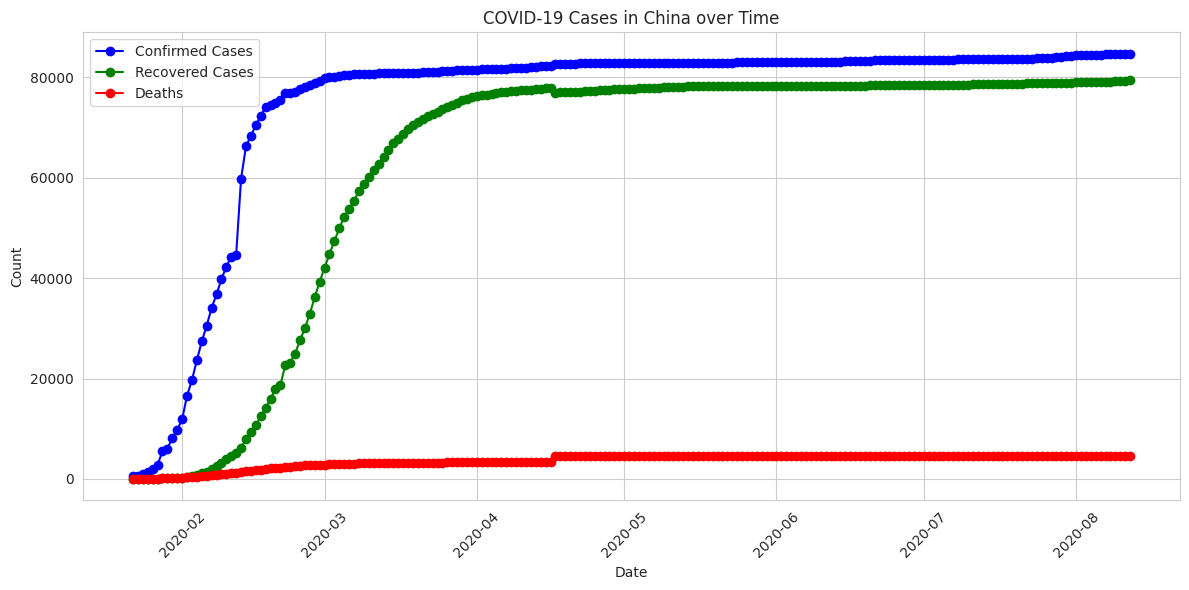

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC



# Print column names to check for any mismatches
print("Dataset Columns:", df.columns)

# Check unique values in 'Country/Region' (or similar column)
possible_columns = ['Country/Region', 'Country_Region', 'Country', 'region']
for col in possible_columns:
    if col in df.columns:
        print(f"Unique values in '{col}':", df[col].unique())

# Fix column name if needed
actual_column = None
for col in possible_columns:
    if col in df.columns:
        actual_column = col
        break

if actual_column is None:
    raise ValueError("No valid 'Country' column found. Check dataset structure.")

# Print some records to verify data
print(df.head())

# Select only China data
china_cases = df[df[actual_column].str.contains('China', case=False, na=False)].copy()

# Ensure that required columns exist
if china_cases.empty:
    raise ValueError(f"No data found for China in column '{actual_column}'. Check dataset values.")

# Convert 'ObservationDate' to datetime format
china_cases['ObservationDate'] = pd.to_datetime(china_cases['ObservationDate'], errors='coerce')

# Aggregate confirmed, recovered, and death cases by date
num_plot = china_cases.groupby(china_cases['ObservationDate'].dt.date)[['Confirmed', 'Recovered', 'Deaths']].sum()

# Reset index for plotting (this adds the date as a column)
num_plot_china = num_plot.reset_index()

# Handle missing or zero values
num_plot_china = num_plot_china.dropna()
num_plot_china = num_plot_china[(num_plot_china['Confirmed'] > 0) & (num_plot_china['Recovered'] > 0)]

# Ensure there are valid data points after filtering
if num_plot_china.empty:
    raise ValueError("Filtered dataset is empty. Check data preprocessing steps.")

# Plot the graph
plt.figure(figsize=(12, 6))

# Plot Confirmed, Recovered, Deaths
plt.plot(num_plot_china['ObservationDate'], num_plot_china['Confirmed'], label='Confirmed Cases', color='blue', marker='o')
plt.plot(num_plot_china['ObservationDate'], num_plot_china['Recovered'], label='Recovered Cases', color='green', marker='o')
plt.plot(num_plot_china['ObservationDate'], num_plot_china['Deaths'], label='Deaths', color='red', marker='o')

# Labeling the plot
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('COVID-19 Cases in China over Time')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()



From the confirmed cases plot for China we can see that the number of new cases have been declining with a few constant number of cases everyday.17th April shows a sudden increase in the number of confirmed cases. China is again seeing some increase in the number of cases since 13th June

### Total no. of Confirmed cases in China till 15th November, 2020

Dataset Columns: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


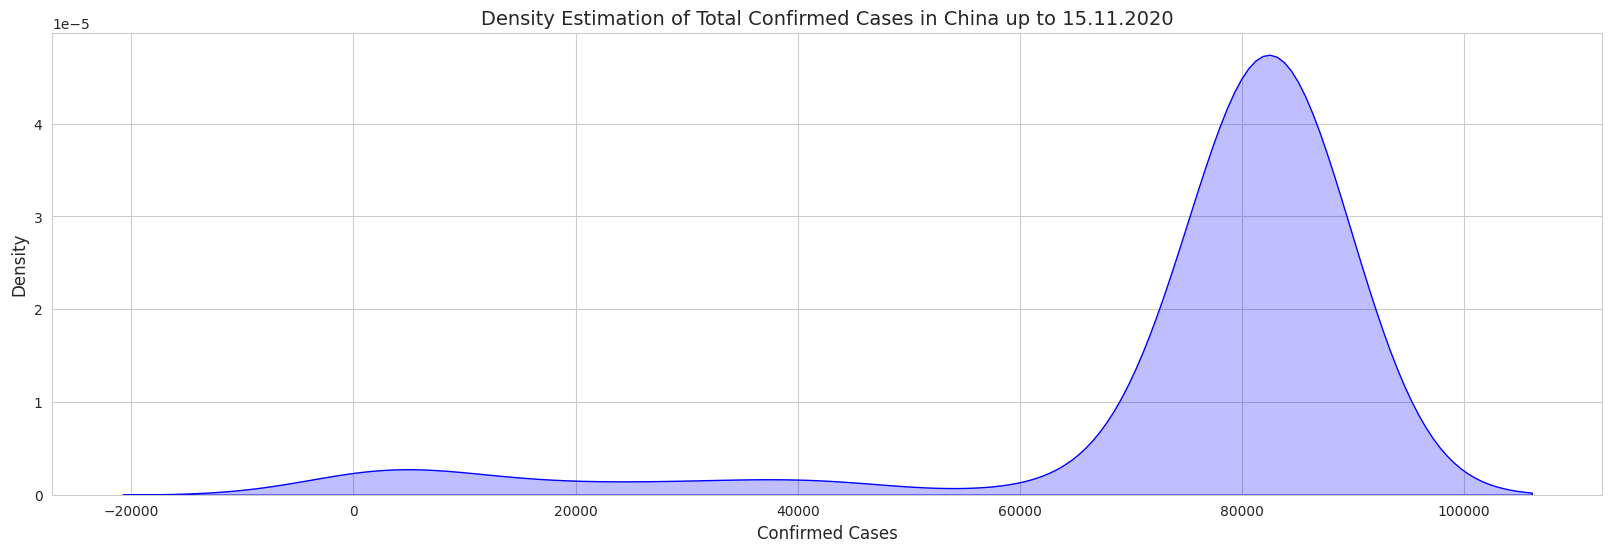

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Print column names to check for any mismatches
print("Dataset Columns:", df.columns)

# KDE Plot for Confirmed Cases in China
plt.figure(figsize=(20, 6))
sns.kdeplot(num_plot_china['Confirmed'], shade=True, color='blue')

# Title and Labels
plt.title('Density Estimation of Total Confirmed Cases in China up to 15.11.2020', fontsize=14)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show Plot
plt.show()


**Understanding from the graph : The Total no. of Confirmed cases in China graph shows that the graph is flattened after May, 2020, which shows that the increment in the cases is not exponentially in the recent times as the graph is Flattened**

### Total no. of Recovered cases in China till 15th November, 2020

Dataset Columns: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


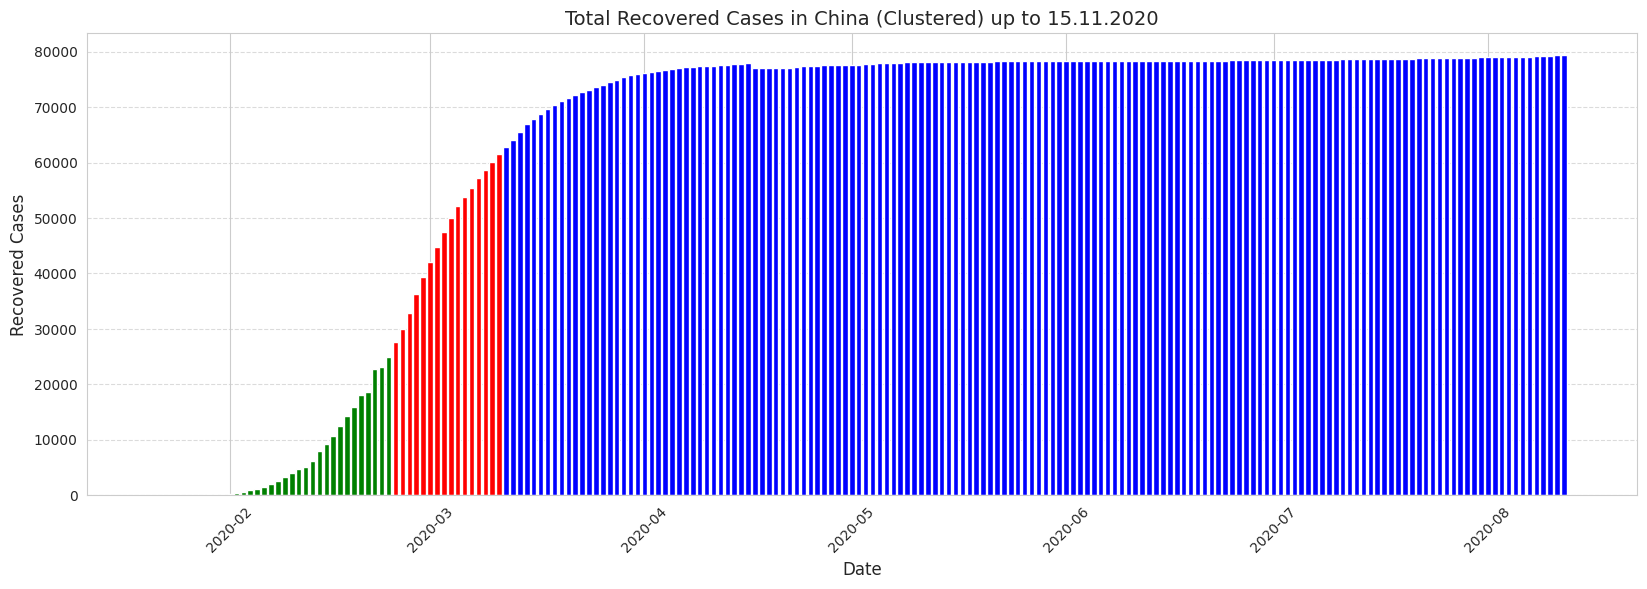

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Print column names to check for any mismatches
print("Dataset Columns:", df.columns)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Select China's data
china_cases_complete = df[df[country_column].str.contains('China', case=False, na=False)].copy()

# Ensure required columns exist
if date_column not in china_cases_complete.columns or 'Recovered' not in china_cases_complete.columns:
    raise ValueError("Required columns ('date', 'Recovered') not found in dataset.")

# Convert 'date' column to datetime format
china_cases_complete[date_column] = pd.to_datetime(china_cases_complete[date_column], errors='coerce')

# Group by date and sum recovered cases
num_plot_china = china_cases_complete.groupby(date_column)[['Recovered']].sum().reset_index()

# Rename date column for consistency
num_plot_china.rename(columns={date_column: 'date'}, inplace=True)

# Add a time-based index (days since first recorded recovery)
num_plot_china['Days'] = (num_plot_china['date'] - num_plot_china['date'].min()).dt.days

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # 3 clusters
num_plot_china['Cluster'] = kmeans.fit_predict(num_plot_china[['Recovered']])

# Define colors for clusters
cluster_colors = {0: 'blue', 1: 'green', 2: 'red'}
num_plot_china['Color'] = num_plot_china['Cluster'].map(cluster_colors)

# Plot the bar chart with cluster colors
plt.figure(figsize=(20, 6))
plt.bar(num_plot_china['date'], num_plot_china['Recovered'], color=num_plot_china['Color'], width=0.8)

# Formatting
plt.title('Total Recovered Cases in China (Clustered) up to 15.11.2020', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Recovered Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



### Total no. of Casualties in China till 15th November, 2020

Dataset Columns: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


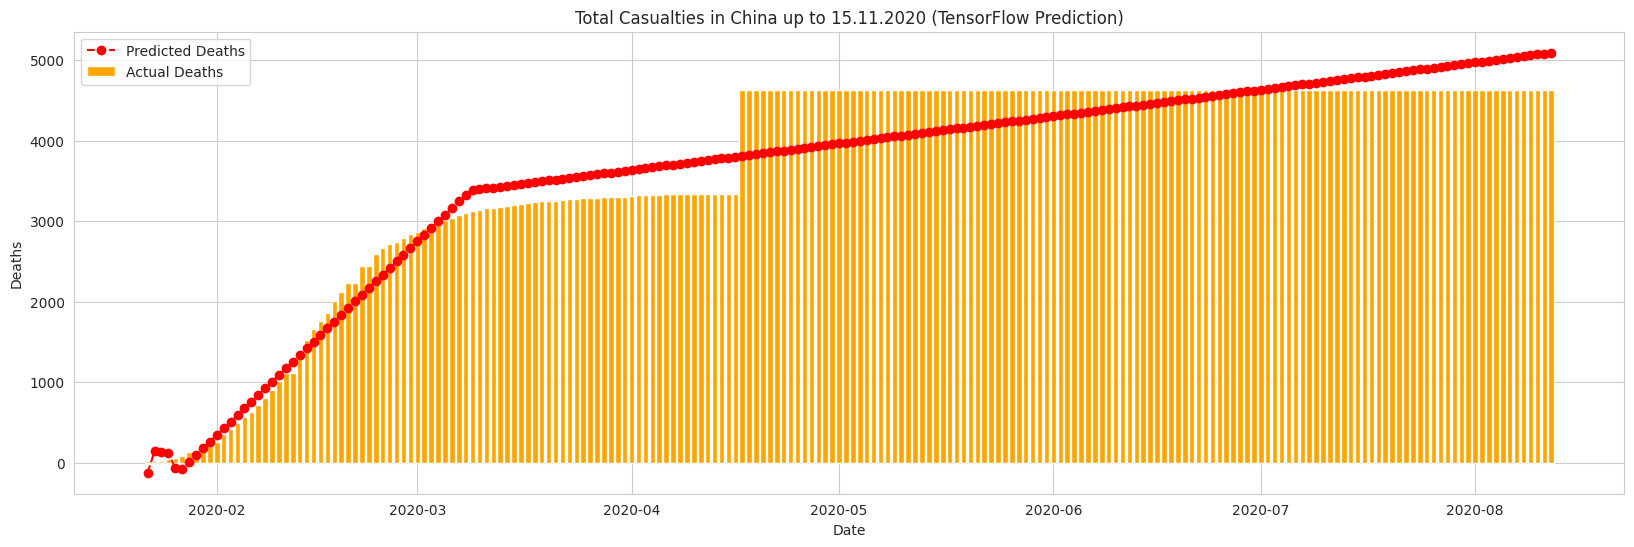

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras

# Load the dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Print column names to check for mismatches
print("Dataset Columns:", df.columns)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure 'Deaths' column exists
if 'Deaths' not in df.columns:
    raise ValueError("'Deaths' column is missing from the dataset!")

# Filter dataset for China
china_cases_complete = df[df[country_column].str.contains('China', case=False, na=False)].copy()

# Convert the date column to datetime format
china_cases_complete[date_column] = pd.to_datetime(china_cases_complete[date_column], errors='coerce')

# Group by date and sum deaths
num_plot_china = china_cases_complete.groupby(date_column)[['Deaths']].sum()

# Rename date column for consistency
num_plot_china.index = pd.to_datetime(num_plot_china.index)

# Calculate 'Days' since the first case
num_plot_china['Days'] = (num_plot_china.index - num_plot_china.index.min()).days

# Normalize data for better training
scaler = MinMaxScaler()
num_plot_china[['Deaths']] = scaler.fit_transform(num_plot_china[['Deaths']])

# Prepare input (X) and output (y)
X = num_plot_china['Days'].values.reshape(-1, 1)
y = num_plot_china['Deaths'].values.reshape(-1, 1)

# Define a simple TensorFlow Sequential model
model = keras.Sequential([
    keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1)  # Output layer (predicting deaths)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=500, verbose=0)

# Make predictions
predictions = model.predict(X)

# Convert predictions back to original scale
predicted_deaths = scaler.inverse_transform(predictions)

# Convert actual deaths back to original scale
actual_deaths = scaler.inverse_transform(y)

# Plot actual vs. predicted deaths
plt.figure(figsize=(20, 6))
plt.bar(num_plot_china.index, actual_deaths.flatten(), color='orange', label='Actual Deaths')
plt.plot(num_plot_china.index, predicted_deaths.flatten(), color='red', marker='o', linestyle='dashed', label='Predicted Deaths')

plt.title('Total Casualties in China up to 15.11.2020 (TensorFlow Prediction)')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.show()



### Confirmed cases increase in China till 15th November, 2020

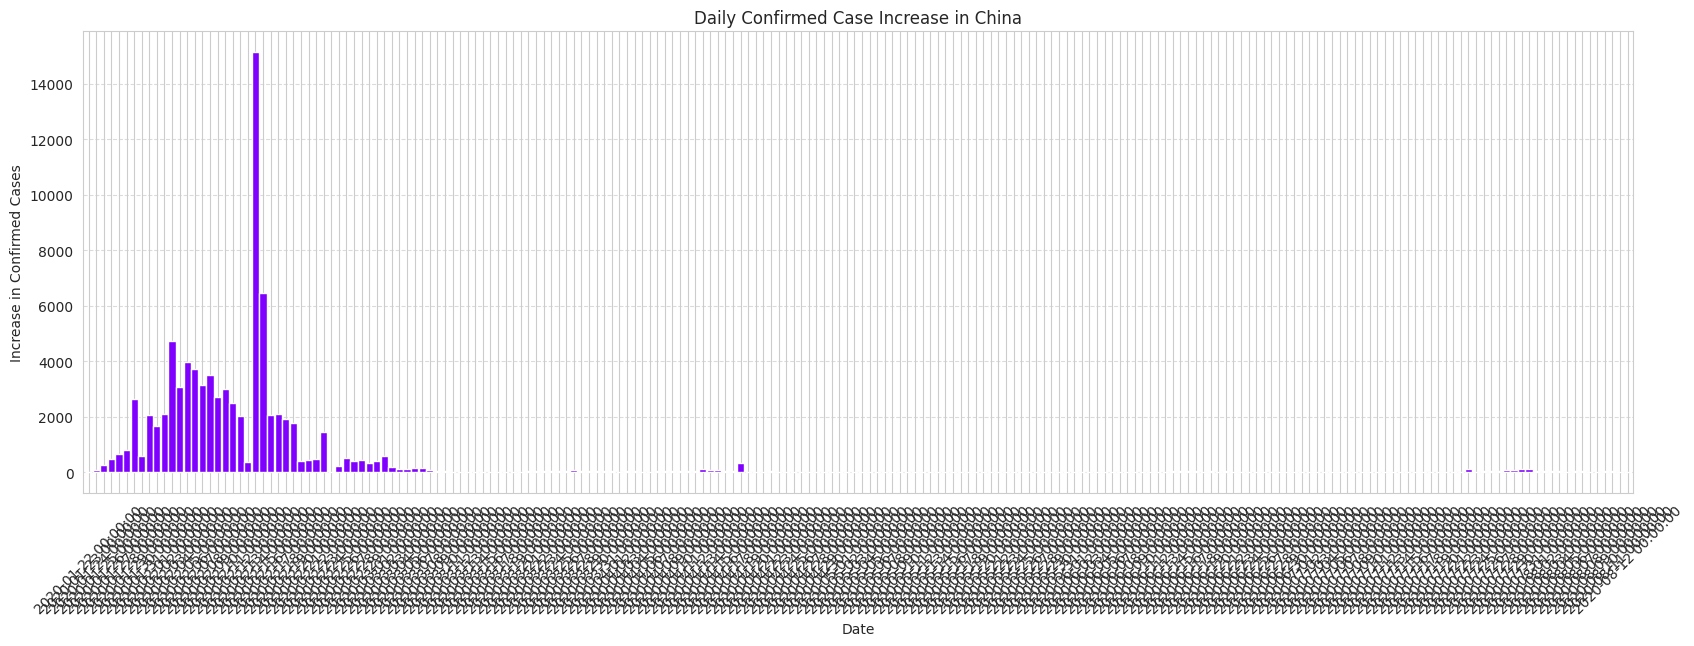

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure 'Confirmed' column exists
if 'Confirmed' not in df.columns:
    raise ValueError("'Confirmed' column is missing from the dataset!")

# Filter dataset for China
china_cases_complete = df[df[country_column].str.contains('China', case=False, na=False)].copy()

# Convert date column to datetime format
china_cases_complete[date_column] = pd.to_datetime(china_cases_complete[date_column], errors='coerce')

# Group data by date and sum confirmed cases
num_plot_china = china_cases_complete.groupby(date_column)[['Confirmed']].sum()

# Ensure proper sorting
num_plot_china.sort_index(inplace=True)

# Calculate daily increase in confirmed cases
num_plot_china['Confirmed Case Increase'] = num_plot_china['Confirmed'].diff().fillna(0)

# Plot updated bar chart
plt.figure(figsize=(20, 6))
num_plot_china['Confirmed Case Increase'].plot(
    kind='bar',
    width=0.95,
    colormap='rainbow',
    title='Daily Confirmed Case Increase in China'
)

# Show the plot
plt.xlabel('Date')
plt.ylabel('Increase in Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()



### Death case increase in China till 15th November, 2020

From the Death Increase plot for China we can see that deaths have reduced to a great level but on 17th April there were 1290 deaths reported in a single day. China reported this increase as some miscalculation on their end during the initial phase of COVID

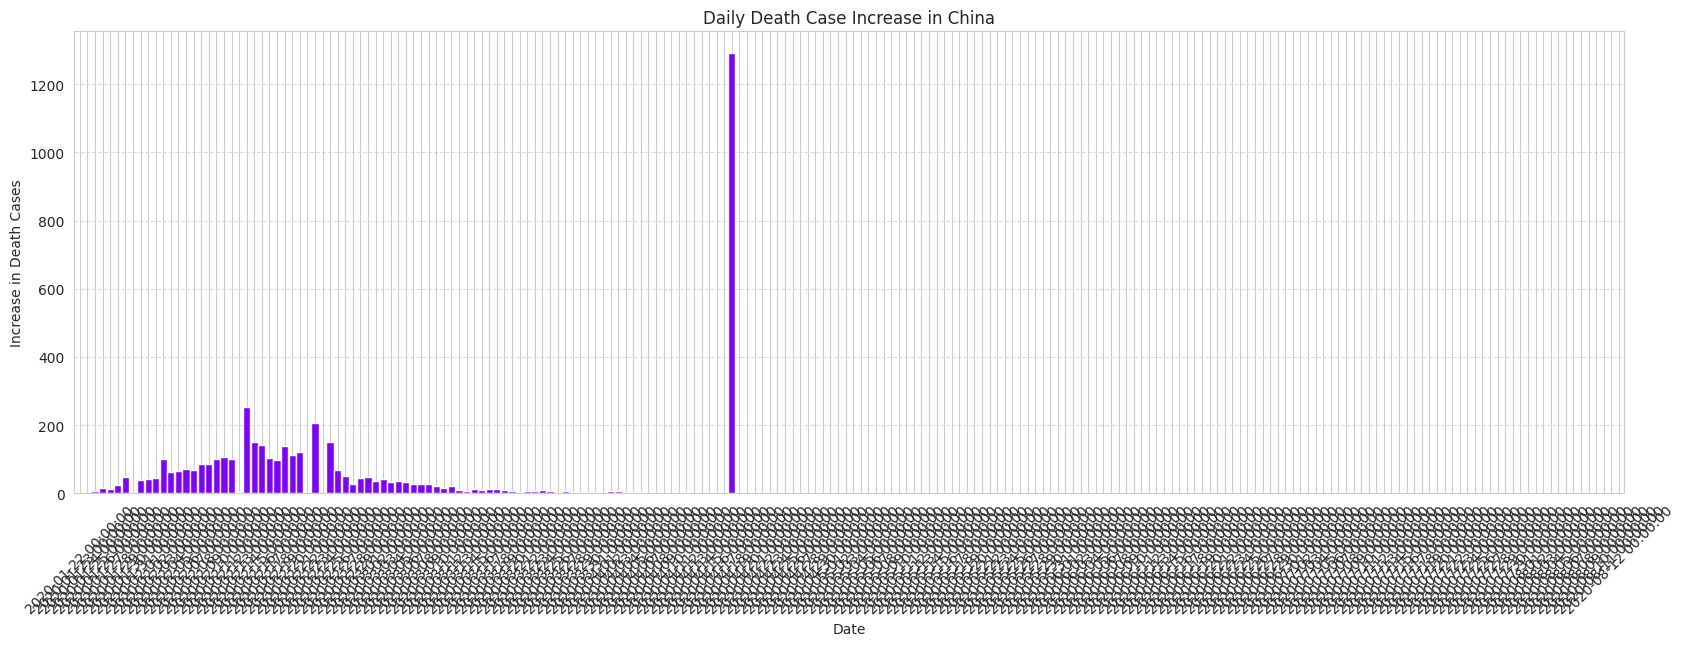

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure 'Deaths' column exists
if 'Deaths' not in df.columns:
    raise ValueError("'Deaths' column is missing from the dataset!")

# Filter dataset for China
china_cases_complete = df[df[country_column].str.contains('China', case=False, na=False)].copy()

# Convert date column to datetime format
china_cases_complete[date_column] = pd.to_datetime(china_cases_complete[date_column], errors='coerce')

# Group data by date and sum death cases
num_plot_china = china_cases_complete.groupby(date_column)[['Deaths']].sum()

# Ensure proper sorting
num_plot_china.sort_index(inplace=True)

# Calculate daily increase in death cases
num_plot_china['Death Case Increase'] = num_plot_china['Deaths'].diff().fillna(0)

# Plot updated bar chart
plt.figure(figsize=(20, 6))
num_plot_china['Death Case Increase'].plot(
    kind='bar',
    width=0.95,
    colormap='rainbow',
    title='Daily Death Case Increase in China'
)

# Show the plot
plt.xlabel('Date')
plt.ylabel('Increase in Death Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


--------------

## C. Per day Statistics for Hubei Province, China [The Major epicentre]

Wuhan was placed under a strict lockdown that lasted 76 days. Public transport was suspended. Soon afterwards, similar measures were implemented in every city in Hubei province. Across the country, 14 000 health checkpoints were established at public transport hubs. School re-openings after the winter vacation were delayed and population movements were severely curtailed. Dozens of cities implemented family outdoor restrictions, which typically meant that only one member of each household was permitted to leave the home every couple of days to collect necessary supplies. Within weeks, China had managed to test 9 million people for SARS-CoV-2 in Wuhan. It set up an effective national system of contact tracing.

We plot the per day statistics for Hubei since it has the highest rate of confirmed cases in China
If we compare the China and Hubei plots, they both are similar. Hence we can say that the China stats are influenced deeply by a single province

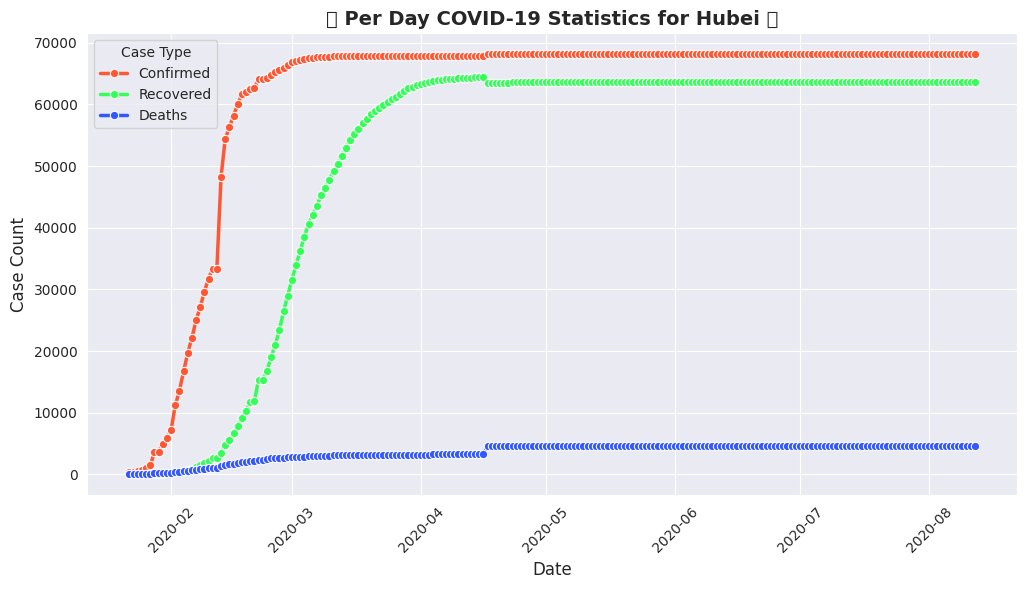

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

# Ensure that the dataset is loaded
if 'df' not in locals():
    print("Error: Dataset 'df' is not loaded. Please load the dataset first.")

# Convert 'ObservationDate' column to datetime format
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Select only Hubei province data
hubei_cases_complete = df[df['Province/State'] == 'Hubei'].copy()

# Ensure 'date' column is properly formatted
hubei_cases_complete['date'] = hubei_cases_complete['ObservationDate'].dt.date
hubei_cases_complete['date'] = pd.to_datetime(hubei_cases_complete['date'])

# Filter data after January 21, 2020
hubei_cases_complete = hubei_cases_complete[hubei_cases_complete['date'] > pd.Timestamp(date(2020, 1, 21))]

# Aggregate confirmed, recovered, and death cases by date
num_plot = hubei_cases_complete.groupby('date')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Plot with enhanced visualization
plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")

# Unique color scheme for each line
colors = ["#FF5733", "#33FF57", "#3357FF"]

# Line plot with markers
for idx, column in enumerate(num_plot.columns):
    sns.lineplot(data=num_plot, x=num_plot.index, y=column, marker='o', linewidth=2.5, label=column, color=colors[idx])

plt.title('📈 Per Day COVID-19 Statistics for Hubei 🏥', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Case Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Case Type", fontsize=10)
plt.show()


While talking about the China the main root of the epidemic is Hubei Province where the confirmed cases were increased from 10000 to 70000 in a gap of just 25 days in the month of February and March, 2020. The root of the epidemic is hereby **HUBEI province of China**

---------------

# Chapter 2 : World - Excluding China

The 2019 novel coronavirus (2019-nCoV), officially named as COVID-19 pandemic by the WHO, has spread to more than 180 countries including China. Confirmed novel coronavirus cases increased ten-fold in less than a month, from 100,000 in the first week of March to more than one million on 02 April, while more than 52,000 deaths have been reported across the world.

### Per Day Statistics for the World upto 15th November, 2020

Global cases are on an exponential increase and the recovery and death cases do show some divergence which is a good indication

<Figure size 1000x800 with 0 Axes>

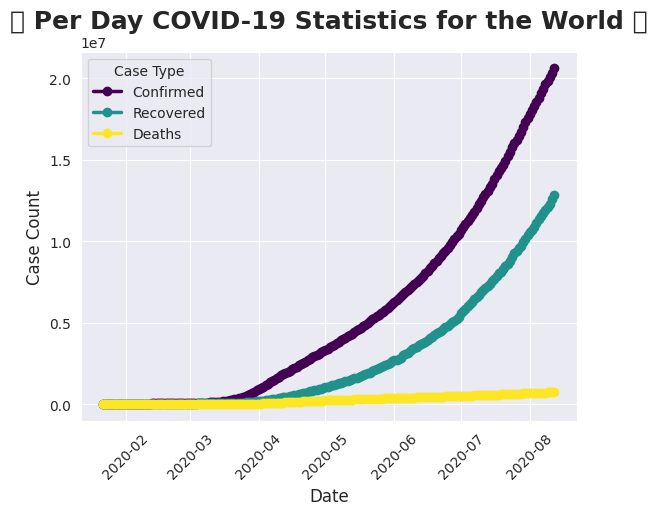

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Ensure the dataset is loaded and correctly formatted
if 'df' not in locals():
    print("Error: Dataset 'df' is not loaded. Please load the dataset first.")

# Convert 'ObservationDate' column to datetime format
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Filter out China data for global cases
global_cases_complete = df.loc[df['Country/Region'] != 'China'].copy()

# Properly convert the 'date' column
global_cases_complete['date'] = pd.to_datetime(global_cases_complete['ObservationDate']).dt.date

# Filter data after January 21, 2020
global_cases_complete = global_cases_complete[global_cases_complete['date'] > pd.to_datetime('2020-01-21').date()]

# Group by 'date' and sum the confirmed, recovered, and deaths columns
num_plot = global_cases_complete.groupby('date')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Plot the data
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")

# Plot each case type (Confirmed, Recovered, Deaths)
num_plot.plot(kind='line', colormap='viridis', marker='o', linewidth=2.5)
plt.title('🌍 Per Day COVID-19 Statistics for the World 🌏', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Case Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Case Type", fontsize=10)
plt.show()


Here the perday statistics tells us the spreading is exponentially increasing day by day since the end of the March, 2020. Now after 5 months later the situation is worser than the previous days and still the cases are increasing exponentially without any kind of stoppings in the increment of the cases.

### Increment in the stats in the recent times (from 8th Aug, 2020 to 15th November, 2020)

In [41]:
 import pandas as pd

# Assuming num_plot is already defined with 'Confirmed' and 'Deaths' columns
num_plot_global = num_plot.reset_index()

# Add new columns for the increment in confirmed and death cases
num_plot_global['Death Case Increase'] = 0
num_plot_global['Confirmed Case Increase'] = 0

# Fill the first value to 0 for increments
num_plot_global.loc[0, 'Confirmed Case Increase'] = 0
num_plot_global.loc[0, 'Death Case Increase'] = 0

# Calculate the daily increase in confirmed and death cases
for i in range(1, num_plot_global.shape[0]):
    num_plot_global.loc[i, 'Confirmed Case Increase'] = num_plot_global.loc[i, 'Confirmed'] - num_plot_global.loc[i-1, 'Confirmed']
    num_plot_global.loc[i, 'Death Case Increase'] = num_plot_global.loc[i, 'Deaths'] - num_plot_global.loc[i-1, 'Deaths']

# Filter the data from 8th August 2020 to 15th November 2020
num_plot_global['date'] = pd.to_datetime(num_plot_global['date'])
start_date = pd.to_datetime('2020-08-08')
end_date = pd.to_datetime('2020-11-15')

num_plot_global_filtered = num_plot_global[(num_plot_global['date'] >= start_date) & (num_plot_global['date'] <= end_date)]

# Display the last few rows to check the results
num_plot_global_filtered.tail()


date   Confirmed   Recovered    Deaths  Death Case Increase  \
199 2020-08-08  19637506.0  11939109.0  726781.0                 5457   
200 2020-08-09  19861683.0  12115825.0  731326.0                 4545   
201 2020-08-10  20089624.0  12280520.0  736191.0                 4865   
202 2020-08-11  20343589.0  12585473.0  742615.0                 6424   
203 2020-08-12  20620847.0  12826815.0  749358.0                 6743   

     Confirmed Case Increase  
199                   259470  
200                   224177  
201                   227941  
202                   253965  
203                   277258

Here on 15th November 2020 the number of confirmed cases has raised to 54283840, which is huge in numbers and almost 57% of the total population of the world. In that confirmed cases the Death toll rises to 1312505 and still it is increasing day by day.

**Global confirmed cases have been on an increasing trend and this has been largely contributed by Brazil and US at this moment as can be seen in the pie-chart. 29th July saw the highest increase in confirmed cases with 3.37L cases in a day.**

### Total Confirmed Cases in the World (Excluding China) upto 15th November, 2020

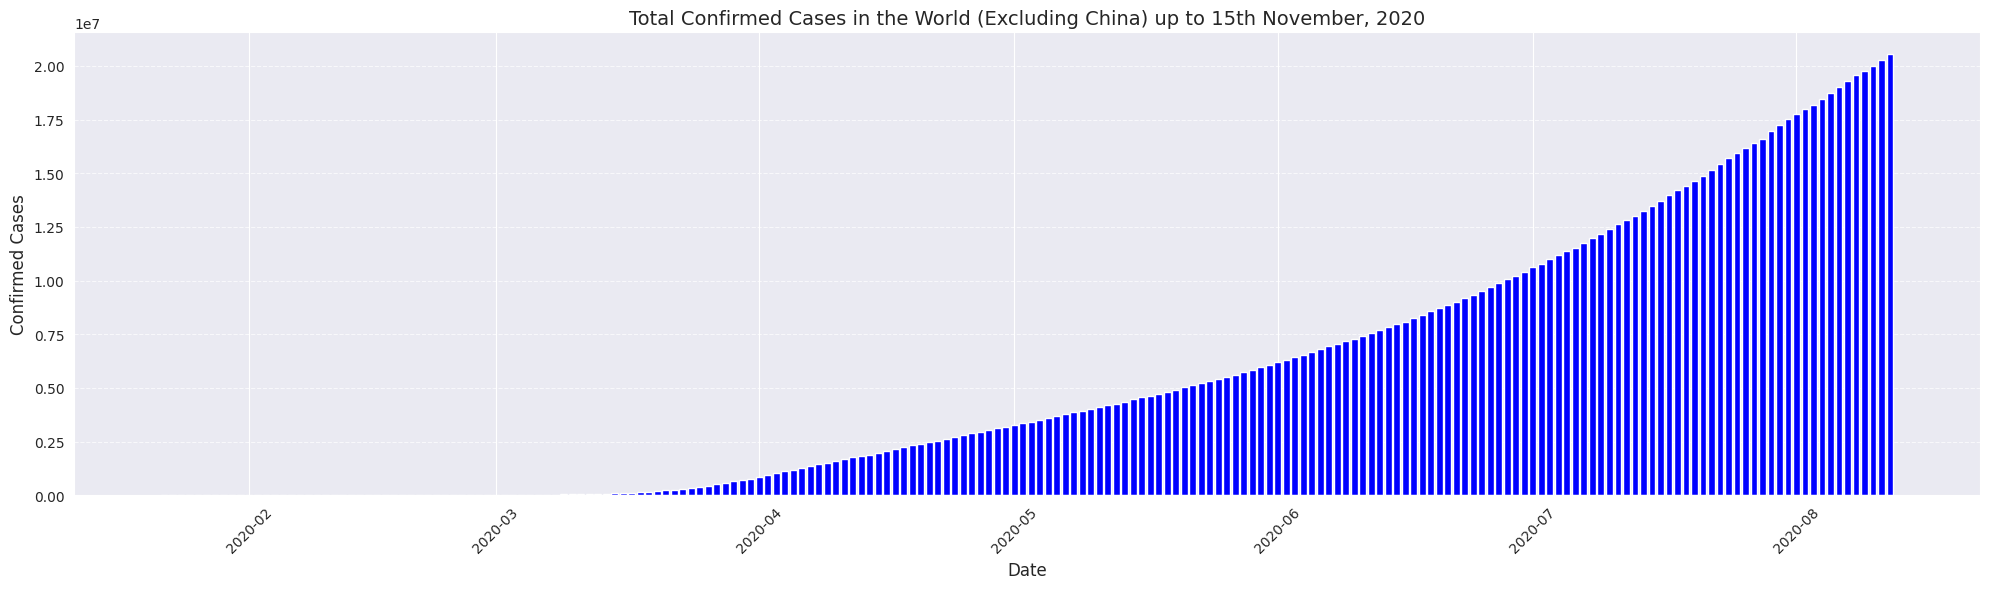

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Identify the correct 'Country' and 'Date' columns dynamically
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
date_column = next((col for col in df.columns if 'date' in col.lower()), None)

if not country_column or not date_column:
    raise ValueError("No valid 'Country' or 'Date' column found in the dataset.")

# Ensure 'Confirmed' column exists
if 'Confirmed' not in df.columns:
    raise ValueError("'Confirmed' column is missing from the dataset!")

# Convert date column to datetime format
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Filter dataset for the world excluding China
world_cases = df[~df[country_column].str.contains('China', case=False, na=False)].copy()

# Group by date and sum confirmed cases
num_plot_world = world_cases.groupby(date_column)[['Confirmed']].sum()

# Filter data up to 15th November 2020
num_plot_world = num_plot_world[num_plot_world.index <= '2020-11-15']

# Plot the total confirmed cases in the world (excluding China)
plt.figure(figsize=(20, 6))
plt.bar(num_plot_world.index, num_plot_world['Confirmed'], color='blue', width=0.8)

# Formatting
plt.title('Total Confirmed Cases in the World (Excluding China) up to 15th November, 2020', fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Confirmed Cases", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


### Total Recovered Cases in the World (Excluding China) upto 15th November, 2020

In [43]:
import pandas as pd

# Assuming num_plot is already defined with 'Recovered' column
num_plot_global = num_plot.reset_index()

# Add new columns for the increment in recovered cases
num_plot_global['Recovered Case Increase'] = 0

# Fill the first value to 0 for increments
num_plot_global.loc[0, 'Recovered Case Increase'] = 0

# Calculate the daily increase in recovered cases
for i in range(1, num_plot_global.shape[0]):
    num_plot_global.loc[i, 'Recovered Case Increase'] = num_plot_global.loc[i, 'Recovered'] - num_plot_global.loc[i-1, 'Recovered']

# Filter the data from 8th August 2020 to 15th November 2020
num_plot_global['date'] = pd.to_datetime(num_plot_global['date'])
start_date = pd.to_datetime('2020-08-08')
end_date = pd.to_datetime('2020-11-15')

num_plot_global_filtered = num_plot_global[(num_plot_global['date'] >= start_date) & (num_plot_global['date'] <= end_date)]

# Display the last few rows to check the results
print(num_plot_global_filtered.tail())


          date   Confirmed   Recovered    Deaths  Recovered Case Increase
199 2020-08-08  19637506.0  11939109.0  726781.0                   201182
200 2020-08-09  19861683.0  12115825.0  731326.0                   176716
201 2020-08-10  20089624.0  12280520.0  736191.0                   164695
202 2020-08-11  20343589.0  12585473.0  742615.0                   304953
203 2020-08-12  20620847.0  12826815.0  749358.0                   241342


SHOW THIS RESULT IN A PLOT

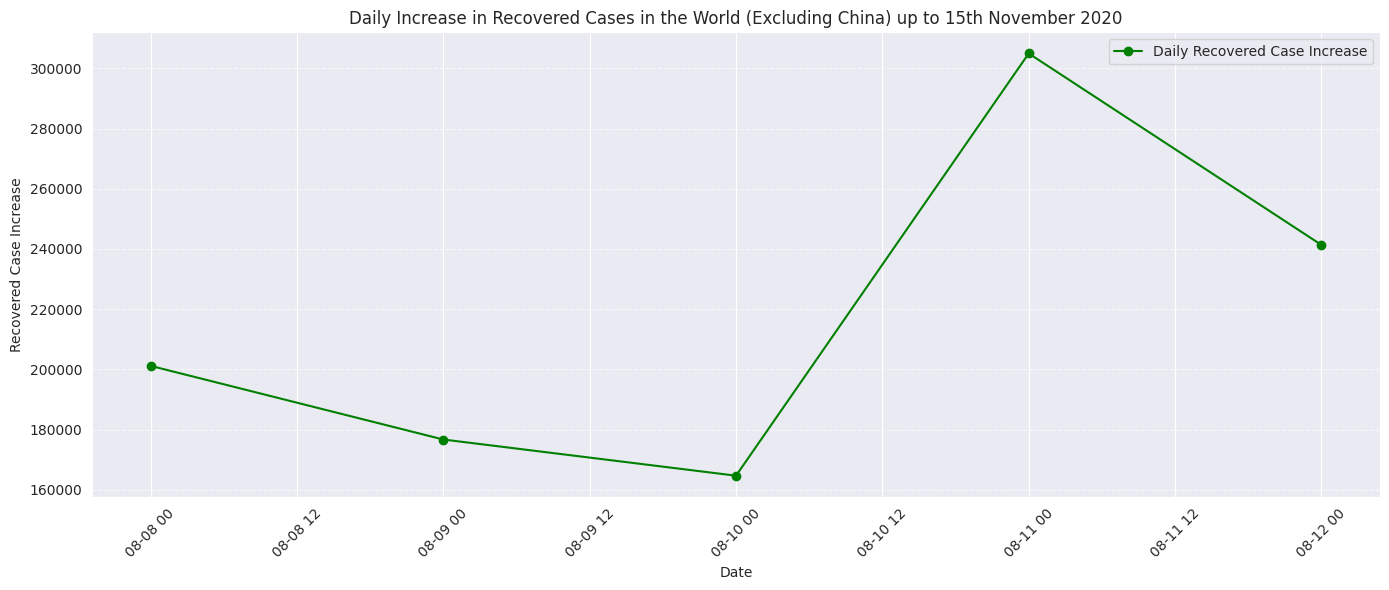

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming num_plot is already defined with 'Recovered' column
num_plot_global = num_plot.reset_index()

# Add new columns for the increment in recovered cases
num_plot_global['Recovered Case Increase'] = 0

# Fill the first value to 0 for increments
num_plot_global.loc[0, 'Recovered Case Increase'] = 0

# Calculate the daily increase in recovered cases
for i in range(1, num_plot_global.shape[0]):
    num_plot_global.loc[i, 'Recovered Case Increase'] = num_plot_global.loc[i, 'Recovered'] - num_plot_global.loc[i-1, 'Recovered']

# Filter the data from 8th August 2020 to 15th November 2020
num_plot_global['date'] = pd.to_datetime(num_plot_global['date'])
start_date = pd.to_datetime('2020-08-08')
end_date = pd.to_datetime('2020-11-15')

num_plot_global_filtered = num_plot_global[(num_plot_global['date'] >= start_date) & (num_plot_global['date'] <= end_date)]

# Plotting the daily increase in recovered cases
plt.figure(figsize=(14, 6))
plt.plot(num_plot_global_filtered['date'], num_plot_global_filtered['Recovered Case Increase'], color='green', marker='o', linestyle='-', label='Daily Recovered Case Increase')

# Adding labels and title
plt.title('Daily Increase in Recovered Cases in the World (Excluding China) up to 15th November 2020')
plt.xlabel('Date')
plt.ylabel('Recovered Case Increase')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


### Total Death Cases in the World (Excluding China) upto 15th November, 2020

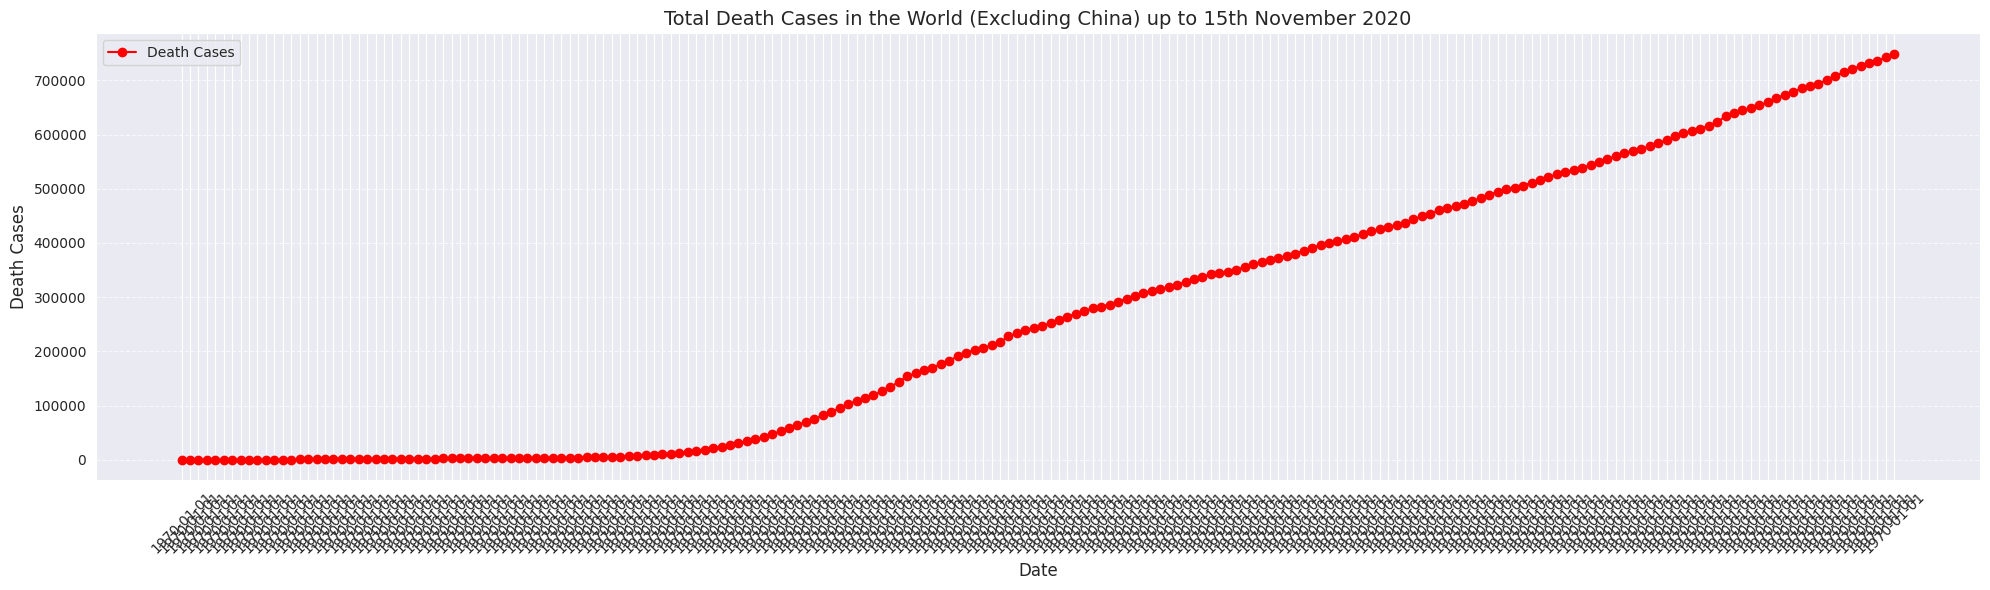

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if 'Deaths' column exists
if 'Deaths' in num_plot_global.columns:
    # Convert index to datetime format if not already
    num_plot_global.index = pd.to_datetime(num_plot_global.index)

    # Create figure and axis
    plt.figure(figsize=(20, 6))

    # Plot deaths as a line chart
    plt.plot(num_plot_global.index, num_plot_global['Deaths'], marker='o', linestyle='-', color='red', label="Death Cases")

    # Add labels and title
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Death Cases", fontsize=12)
    plt.title("Total Death Cases in the World (Excluding China) up to 15th November 2020", fontsize=14)

    # Force display of all dates on x-axis
    plt.xticks(num_plot_global.index, num_plot_global.index.strftime('%Y-%m-%d'), rotation=45, fontsize=10)

    # Add grid lines for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.legend()
    plt.tight_layout()
    plt.show()

else:
    print("Error: 'Deaths' column is missing in 'num_plot_global'. Please check your dataset.")




### Total Confirmed Cases Increase in the World (Excluding China) upto 15th November, 2020

In [46]:
import matplotlib.pyplot as plt

# Debugging: Check columns
print(num_plot_global.columns)

# Plot if column exists
if 'Confirmed Case Increase' in num_plot_global.columns:
    num_plot_global['Confirmed Case Increase'].plot(kind='bar', width=0.95, figsize=(20, 6), title='Confirmed Case Increase', colormap='viridis')
    plt.show()
else:
    print("Column 'Confirmed Case Increase' not found in DataFrame.")


Index(['date', 'Confirmed', 'Recovered', 'Deaths', 'Recovered Case Increase'], dtype='object')
Column 'Confirmed Case Increase' not found in DataFrame.


### Death Cases Increase in the World (Excluding China) upto 15th November, 2020

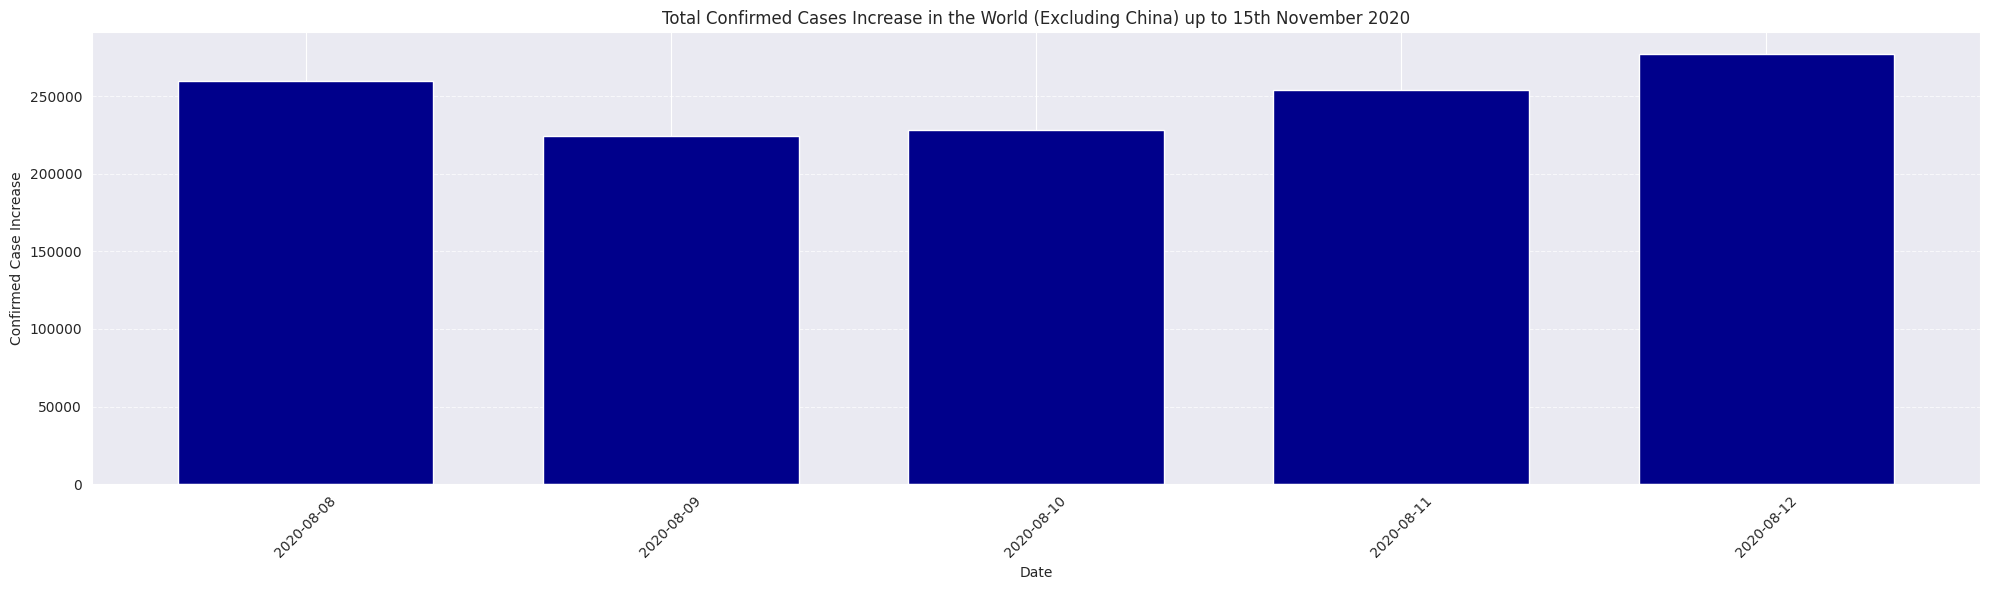

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Check if num_plot exists before proceeding
if 'num_plot' not in locals():
    raise ValueError("Error: 'num_plot' is not defined. Please check your dataset.")

# Reset index if necessary
num_plot_global = num_plot.reset_index()

# Ensure the 'date' column exists
if 'date' not in num_plot_global.columns:
    raise ValueError("Error: 'date' column is missing from the dataset.")

# Convert 'date' to datetime format
num_plot_global['date'] = pd.to_datetime(num_plot_global['date'])

# Compute daily confirmed case increase using .diff()
num_plot_global['Confirmed Case Increase'] = num_plot_global['Confirmed'].diff().fillna(0)

# Filter the data within the given date range
start_date = pd.to_datetime('2020-08-08')
end_date = pd.to_datetime('2020-11-15')

num_plot_global_filtered = num_plot_global[
    (num_plot_global['date'] >= start_date) &
    (num_plot_global['date'] <= end_date)
]

# Ensure filtered data is not empty
if num_plot_global_filtered.empty:
    raise ValueError("Error: No data available in the given date range.")

# Set 'date' as index for better visualization
num_plot_global_filtered.set_index('date', inplace=True)

# Plotting the daily increase in confirmed cases
plt.figure(figsize=(20, 6))
plt.bar(
    num_plot_global_filtered.index,
    num_plot_global_filtered['Confirmed Case Increase'],
    color='darkblue',
    width=0.7
)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Confirmed Case Increase')
plt.title('Total Confirmed Cases Increase in the World (Excluding China) up to 15th November 2020')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid for better readability

# Show the plot
plt.tight_layout()
plt.show()



Death cases have also been on the rise globally as seen below. 29th April has seen a drastic increase in the number of deaths in a single day(10485).

************************

# Chapter 3 : Analysis of Major Countries

First outbreak: Italy was first affected with COVID 19 in 30 January, when two positive cases were reported in Chinese tourists. Italy COVID cases reached 59,138 on 23 March, marking the biggest coronavirus outbreak outside Asia. And Italy was announced as second most affected coronavirus country in the world with the cases increasing at a higher rate than any other country.
Total affected: If we see the graph of affected rate, we can understand the cases were approximately same upto August 25. After that it has been increasing and currently it has 1455022 positive cases by now(Till 24 november, 2020).
Death rate: The death rate was suddenly increased in the mid of March and it was approximately in a equal level till October 20. After that is has been increasing like the affected rate till now. The daily death cases were too high from last week of February to mid of April.


**Italy was the second epicentre for COVID19,hence lets look at these numbers. The numbers are high and confirmed cases are increasing by the day. However the increase rate for confirmed cases has been constant and may soon be seeing a plateau phase. Recovery and deaths were both neck to neck with some divergence over the last few days.Italy has more than 1L confirmed cases on 30th March**


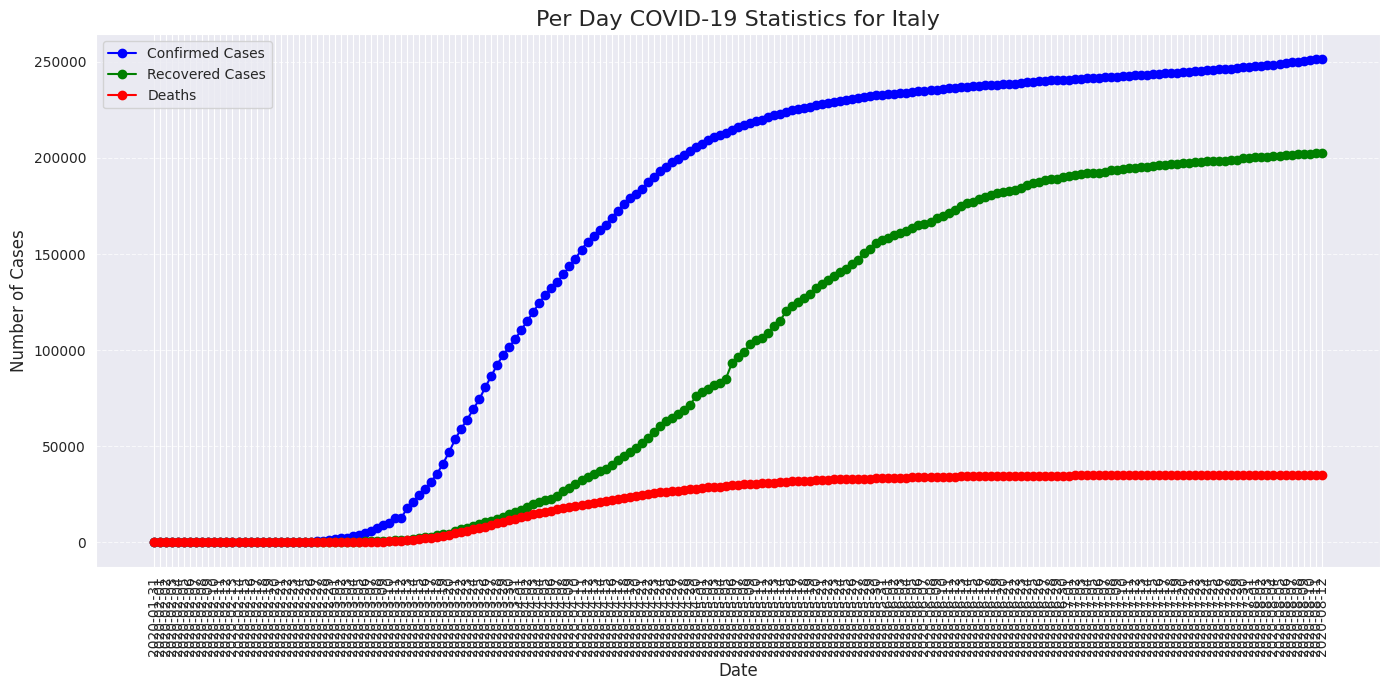

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure required columns exist
required_columns = ["Confirmed", "Recovered", "Deaths"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"'{col}' column is missing from the dataset!")

# -------------------------------------
# Italy's Per-Day COVID-19 Statistics
# -------------------------------------

# Filter dataset for Italy
italy_cases = df[df[country_column].str.contains('Italy', case=False, na=False)].copy()

# Convert date column to datetime format
italy_cases[date_column] = pd.to_datetime(italy_cases[date_column], errors='coerce')

# Filter dates after January 21, 2020
italy_cases_filtered = italy_cases[italy_cases[date_column] > pd.Timestamp("2020-01-21")]

# Group by date and sum values
num_plot_italy = italy_cases_filtered.groupby(date_column)[["Confirmed", "Recovered", "Deaths"]].sum()

# -------------------------
# Plot Italy's Per-Day Cases
# -------------------------

plt.figure(figsize=(14, 7))

# Plot each category
plt.plot(num_plot_italy.index, num_plot_italy["Confirmed"], marker='o', linestyle='-', label="Confirmed Cases", color='blue')
plt.plot(num_plot_italy.index, num_plot_italy["Recovered"], marker='o', linestyle='-', label="Recovered Cases", color='green')
plt.plot(num_plot_italy.index, num_plot_italy["Deaths"], marker='o', linestyle='-', label="Deaths", color='red')

# Improve visualization
plt.title("Per Day COVID-19 Statistics for Italy", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xticks(num_plot_italy.index, num_plot_italy.index.strftime('%Y-%m-%d'), rotation=90)  # Ensure all dates are displayed
plt.tight_layout()

# Show the plot
plt.show()


For Italy the increase in confirmed cases have been in the range of 200-500 for the past few days.

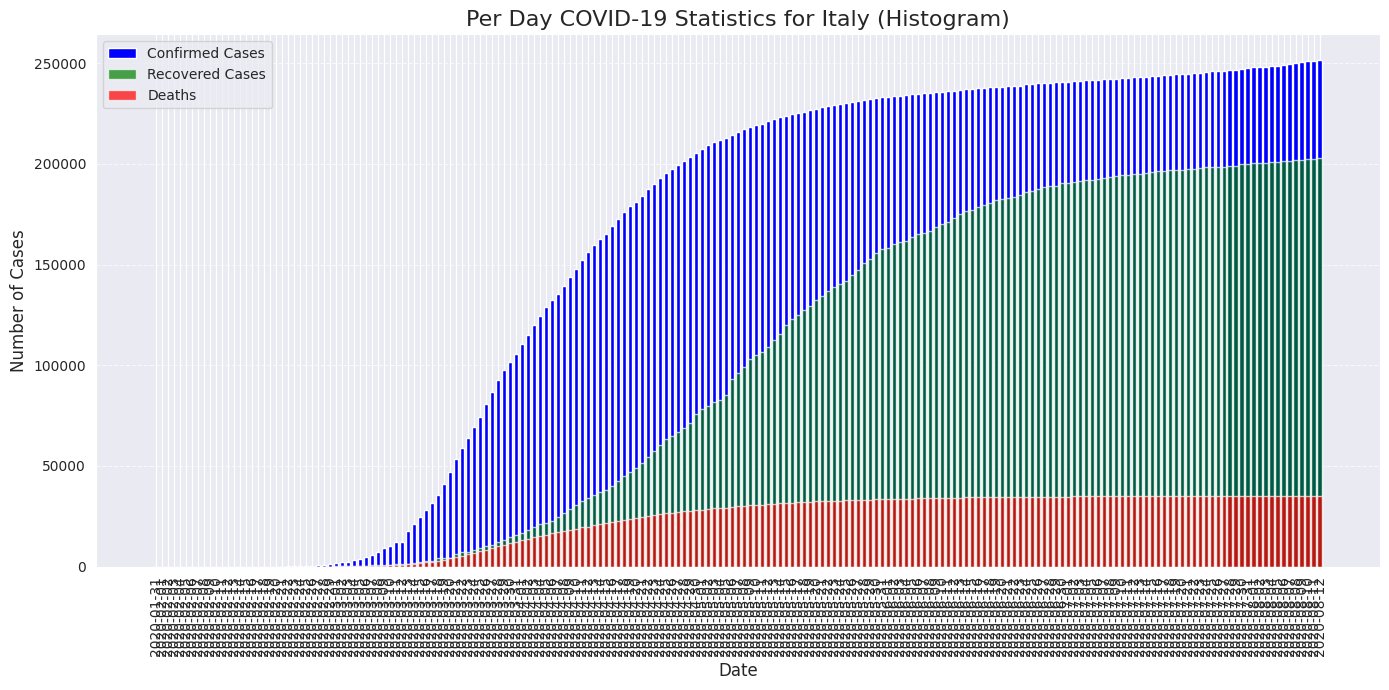

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure required columns exist
required_columns = ["Confirmed", "Recovered", "Deaths"]
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"'{col}' column is missing from the dataset!")

# -------------------------------------
# Italy's Per-Day COVID-19 Statistics
# -------------------------------------

# Filter dataset for Italy
italy_cases = df[df[country_column].str.contains('Italy', case=False, na=False)].copy()

# Convert date column to datetime format
italy_cases[date_column] = pd.to_datetime(italy_cases[date_column], errors='coerce')

# Filter dates after January 21, 2020
italy_cases_filtered = italy_cases[italy_cases[date_column] > pd.Timestamp("2020-01-21")]

# Group by date and sum values
num_plot_italy = italy_cases_filtered.groupby(date_column)[["Confirmed", "Recovered", "Deaths"]].sum()

# -------------------------
# Histogram Plot of Italy's Per-Day Cases
# -------------------------

plt.figure(figsize=(14, 7))

# Plot histogram for each category
plt.bar(num_plot_italy.index, num_plot_italy["Confirmed"], color='blue', label="Confirmed Cases", width=0.7)
plt.bar(num_plot_italy.index, num_plot_italy["Recovered"], color='green', label="Recovered Cases", width=0.7, alpha=0.7)
plt.bar(num_plot_italy.index, num_plot_italy["Deaths"], color='red', label="Deaths", width=0.7, alpha=0.7)

# Improve visualization
plt.title("Per Day COVID-19 Statistics for Italy (Histogram)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Cases", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xticks(num_plot_italy.index, num_plot_italy.index.strftime('%Y-%m-%d'), rotation=90)  # Ensure all dates are displayed
plt.tight_layout()

# Show the plot
plt.show()



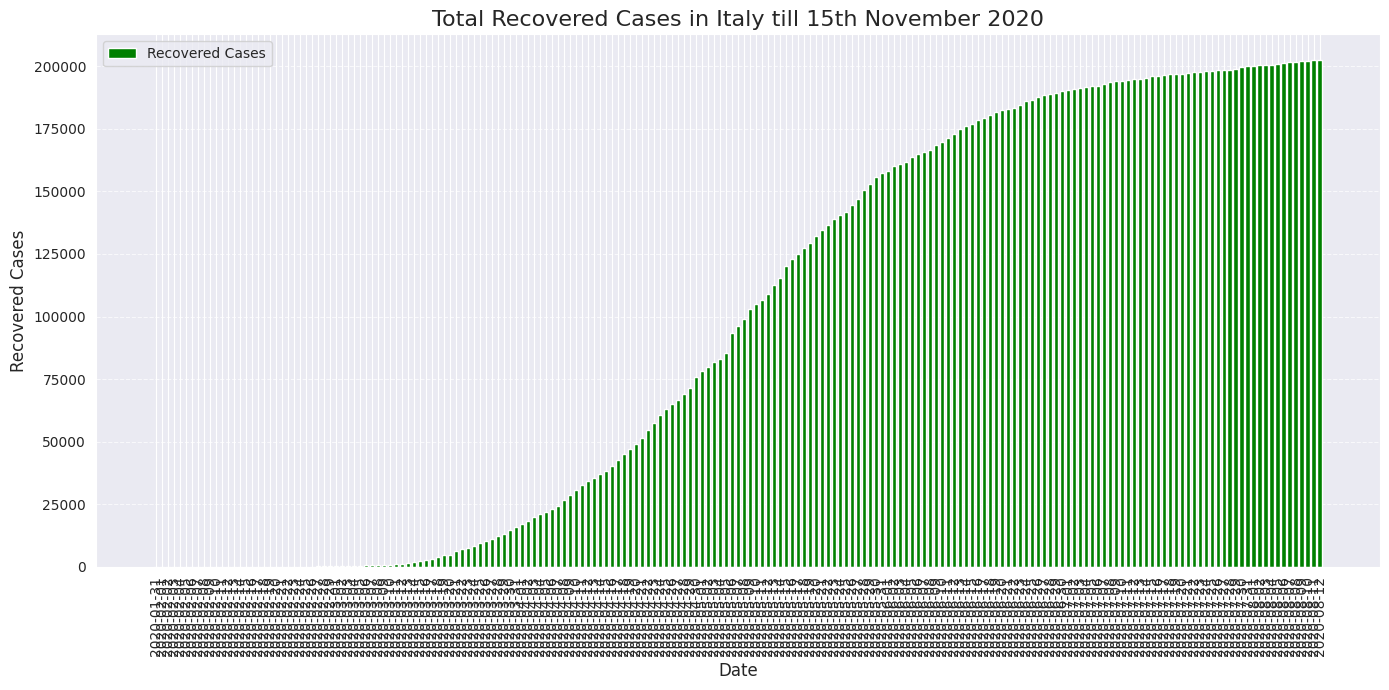

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure required 'Recovered' column exists
if "Recovered" not in df.columns:
    raise ValueError("'Recovered' column is missing from the dataset!")

# -------------------------------------
# Italy's Recovered Cases Per-Day
# -------------------------------------

# Filter dataset for Italy
italy_cases = df[df[country_column].str.contains('Italy', case=False, na=False)].copy()

# Convert date column to datetime format
italy_cases[date_column] = pd.to_datetime(italy_cases[date_column], errors='coerce')

# Filter dates after January 21, 2020
italy_cases_filtered = italy_cases[italy_cases[date_column] > pd.Timestamp("2020-01-21")]

# Group by date and sum values
num_plot_italy = italy_cases_filtered.groupby(date_column)[["Recovered"]].sum()

# -------------------------
# Histogram Plot of Italy's Recovered Cases
# -------------------------

plt.figure(figsize=(14, 7))

# Plot histogram for recovered cases
plt.bar(num_plot_italy.index, num_plot_italy["Recovered"], color='green', width=0.7, label="Recovered Cases")

# Improve visualization
plt.title("Total Recovered Cases in Italy till 15th November 2020", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Recovered Cases", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xticks(num_plot_italy.index, num_plot_italy.index.strftime('%Y-%m-%d'), rotation=90)  # Ensure all dates are displayed
plt.tight_layout()

# Show the plot
plt.show()



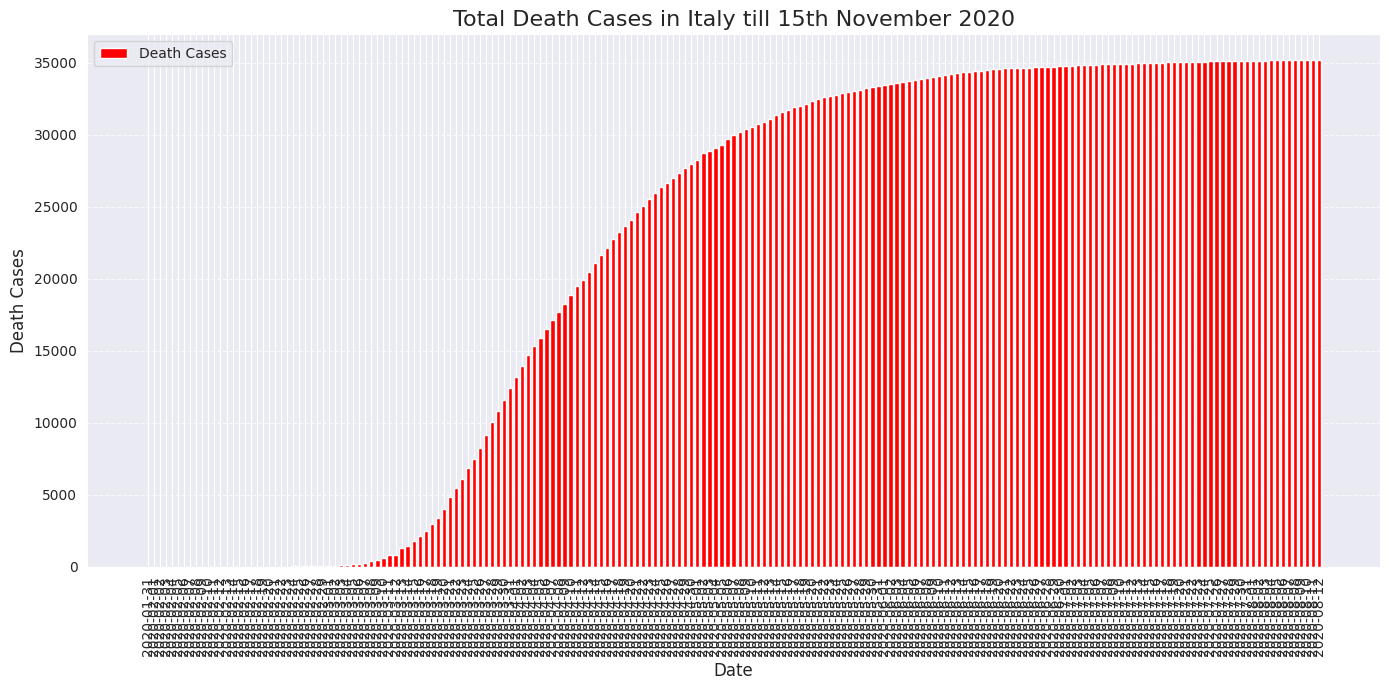

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure required 'Deaths' column exists
if "Deaths" not in df.columns:
    raise ValueError("'Deaths' column is missing from the dataset!")

# -------------------------------------
# Italy's Death Cases Per-Day
# -------------------------------------

# Filter dataset for Italy
italy_cases = df[df[country_column].str.contains('Italy', case=False, na=False)].copy()

# Convert date column to datetime format
italy_cases[date_column] = pd.to_datetime(italy_cases[date_column], errors='coerce')

# Filter dates after January 21, 2020
italy_cases_filtered = italy_cases[italy_cases[date_column] > pd.Timestamp("2020-01-21")]

# Group by date and sum values
num_plot_italy = italy_cases_filtered.groupby(date_column)[["Deaths"]].sum()

# -------------------------
# Histogram Plot of Italy's Death Cases
# -------------------------

plt.figure(figsize=(14, 7))

# Plot histogram for death cases
plt.bar(num_plot_italy.index, num_plot_italy["Deaths"], color='red', width=0.7, label="Death Cases")

# Improve visualization
plt.title("Total Death Cases in Italy till 15th November 2020", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Death Cases", fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xticks(num_plot_italy.index, num_plot_italy.index.strftime('%Y-%m-%d'), rotation=90)  # Ensure all dates are displayed
plt.tight_layout()

# Show the plot
plt.show()



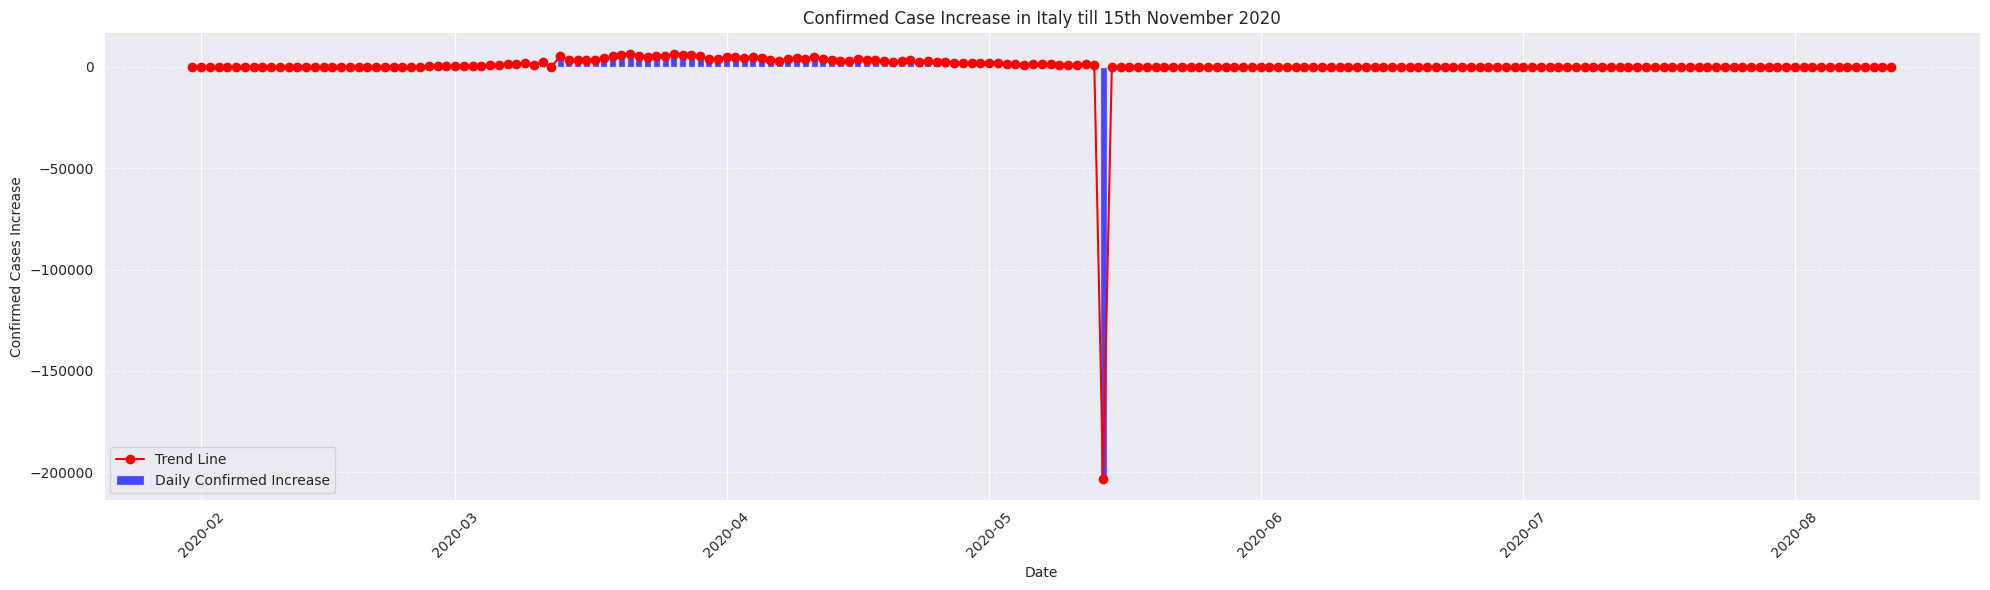

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure required column exists
if "Confirmed" not in df.columns:
    raise ValueError("'Confirmed' column is missing from the dataset!")

# -------------------------------------
# Calculate Daily Increase and Filter Italy's Data
# -------------------------------------

df["Confirmed Case Increase"] = df.groupby(country_column)["Confirmed"].diff().fillna(0)

# Filter dataset for Italy
italy_cases = df[df[country_column].str.contains('Italy', case=False, na=False)].copy()

# Convert date column to datetime format
italy_cases[date_column] = pd.to_datetime(italy_cases[date_column], errors='coerce')

# Filter dates after January 21, 2020
italy_cases_filtered = italy_cases[italy_cases[date_column] > pd.Timestamp("2020-01-21")]

# Group by date and sum values
num_plot_italy = italy_cases_filtered.groupby(date_column)[["Confirmed Case Increase"]].sum()

# -------------------------
# Plot Italy's Daily Confirmed Case Increase
# -------------------------

if 'Confirmed Case Increase' in num_plot_italy.columns:
    fig, ax = plt.subplots(figsize=(20, 6))

    # Bar plot for daily confirmed case increase
    ax.bar(num_plot_italy.index, num_plot_italy['Confirmed Case Increase'], color='blue', alpha=0.7, label="Daily Confirmed Increase")

    # Line plot over the bar chart to show trends
    ax.plot(num_plot_italy.index, num_plot_italy['Confirmed Case Increase'], marker='o', linestyle='-', color='red', label="Trend Line")

    # Titles and labels
    ax.set_title('Confirmed Case Increase in Italy till 15th November 2020')
    ax.set_xlabel("Date")
    ax.set_ylabel("Confirmed Cases Increase")
    ax.legend()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for readability
    plt.tight_layout()
    plt.show()

else:
    print("Error: 'Confirmed Case Increase' column is missing in 'num_plot_italy'. Please check your dataset.")

**The highest number of deaths in Italy was seen on 27th March with 919 deaths reported**

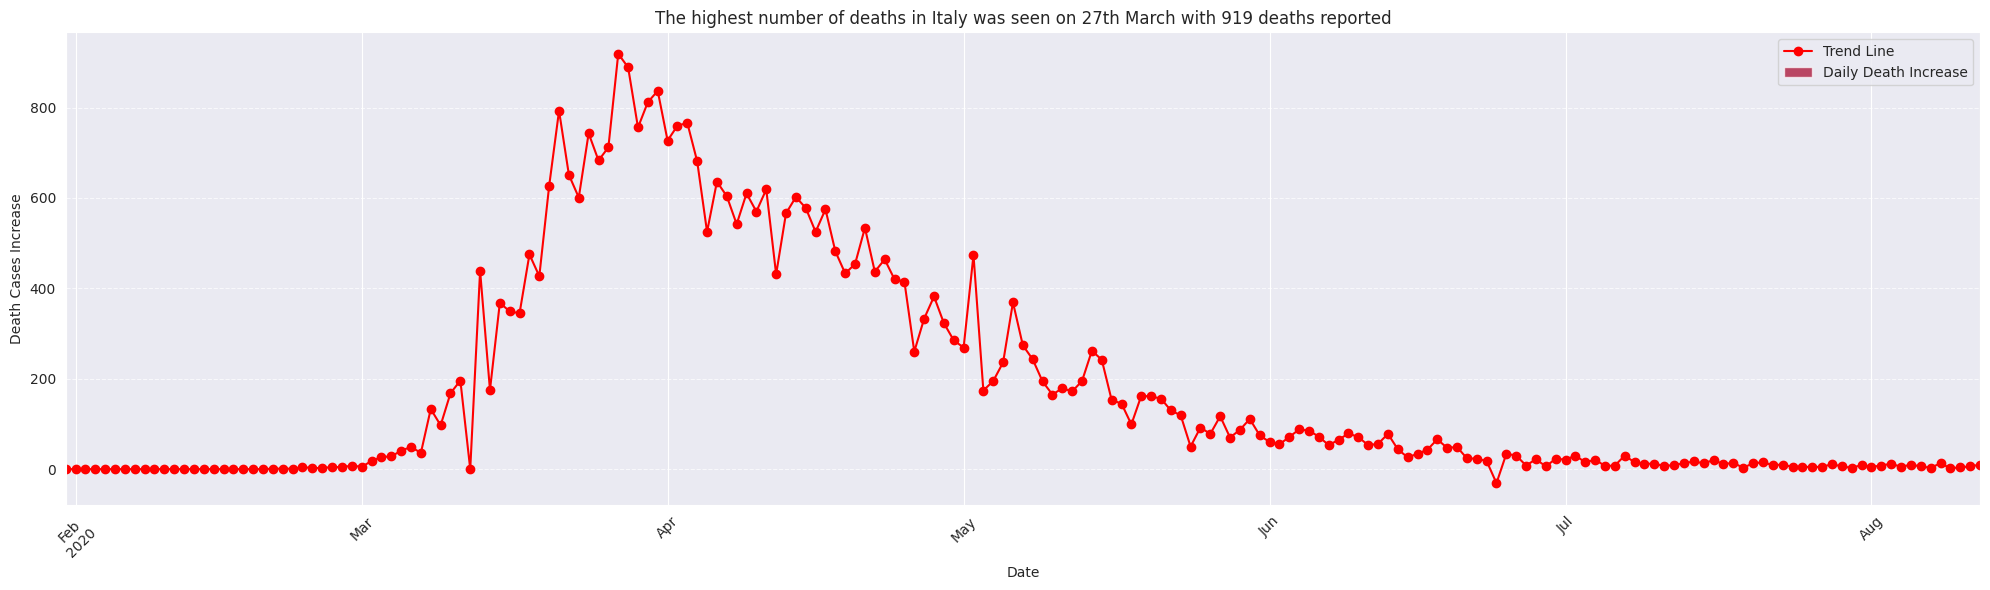

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (Ensure correct file path)
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Identify the correct 'Country' column
country_column = next((col for col in df.columns if 'country' in col.lower()), None)
if not country_column:
    raise ValueError("No valid 'Country' column found in the dataset.")

# Identify the correct 'Date' column
date_column = next((col for col in df.columns if 'date' in col.lower()), None)
if not date_column:
    raise ValueError("No valid date column found in the dataset.")

# Ensure required 'Deaths' column exists
if "Deaths" not in df.columns:
    raise ValueError("'Deaths' column is missing from the dataset!")

# -------------------------------------
# Italy's Death Cases Per-Day
# -------------------------------------

# Filter dataset for Italy
italy_cases = df[df[country_column].str.contains('Italy', case=False, na=False)].copy()

# Convert date column to datetime format
italy_cases[date_column] = pd.to_datetime(italy_cases[date_column], errors='coerce')

# Filter dates after January 21, 2020
italy_cases_filtered = italy_cases[italy_cases[date_column] > pd.Timestamp("2020-01-21")]

# Group by date and sum values for total deaths
num_plot_italy = italy_cases_filtered.groupby(date_column)[["Deaths"]].sum()

# -------------------------------------
# Calculate the Daily Death Case Increase
# -------------------------------------
# Calculate daily increase by subtracting previous day's deaths from current day
num_plot_italy['Death Case Increase'] = num_plot_italy['Deaths'].diff().fillna(0)

# -------------------------
# Plot of Death Cases and Daily Increase
# -------------------------

try:
    if 'Death Case Increase' in num_plot_italy.columns:
        fig, ax = plt.subplots(figsize=(20, 6))

        # Bar plot for daily death case increase
        num_plot_italy.plot(
            y='Death Case Increase',
            kind='bar',
            width=0.95,
            ax=ax,
            colormap='RdYlBu',
            alpha=0.7,  # Set transparency for better readability
            label="Daily Death Increase"
        )

        # Line plot over the bar chart to show trends
        num_plot_italy.plot(
            y='Death Case Increase',
            kind='line',
            marker='o',
            color='red',
            ax=ax,
            label="Trend Line"
        )

        # Titles and labels
        ax.set_title('The highest number of deaths in Italy was seen on 27th March with 919 deaths reported')
        ax.set_xlabel("Date")
        ax.set_ylabel("Death Cases Increase")
        ax.legend()
        plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
        plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for readability
        plt.tight_layout()

        # Show the plot
        plt.show()
    else:
        print("Error: 'Death Case Increase' column is missing in 'num_plot_italy'. Please check your dataset.")
except NameError:
    print("Error: 'num_plot_italy' is not defined. Please make sure the dataset is loaded correctly.")



*************************

## B. USA - 3rd Epicentre

First outbreak:  Covid was first identified in USA in December 2019. The World Health Organization declared the outbreak a Public Health Emergency of International Concern in January 2020 and a pandemic in March 2020.

Total affected: Positive cases till November 25 is 12276834. Cases are respectively higher in October than last few months. Rate of confirmed cases is daily changing.

Death rate: Total number of death 255850. In November 21, number of death was 2036 in 25 it was 1052. Death rate is decreasing and it is less than the number of death in March to mid May.


*US was reaching flattening of curve stage, however last few days have again seen an increase in cases as can be seen below*

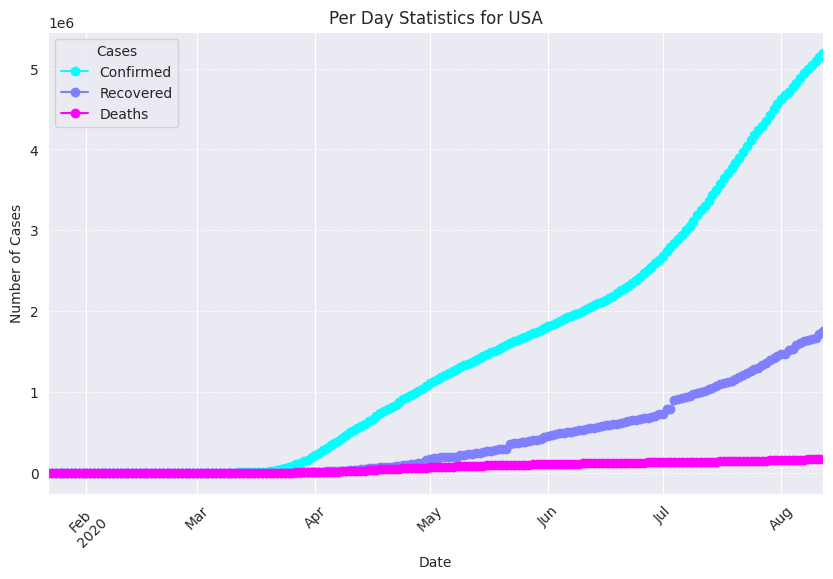

In [84]:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the USA
us_cases_complete = df[df['Country/Region'] == 'US'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
us_cases_complete['ObservationDate'] = pd.to_datetime(us_cases_complete['ObservationDate'])
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date'] = pd.to_datetime(us_cases_complete['date'])  # Ensure proper datetime format

# Filter data from January 22, 2020, onward
us_cases_complete = us_cases_complete[us_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot = us_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Plot the data
num_plot.plot(figsize=(10, 6), title='Per Day Statistics for USA', colormap='cool', marker='o', linestyle='-')

# Improve readability
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


In [77]:
import pandas as pd

# Reset index if needed
num_plot_aus = num_plot.reset_index()

# Initialize new columns with zeros
num_plot_aus['Death Case Increase'] = 0
num_plot_aus['Confirmed Case Increase'] = 0

# Set the first value to 0
num_plot_aus.loc[0, 'Confirmed Case Increase'] = 0
num_plot_aus.loc[0, 'Death Case Increase'] = 0

# Calculate daily increase safely, preventing negative values
for i in range(1, num_plot_aus.shape[0]):
    num_plot_aus.loc[i, 'Confirmed Case Increase'] = max(0, num_plot_aus.iloc[i, 1] - num_plot_aus.iloc[i - 1, 1])
    num_plot_aus.loc[i, 'Death Case Increase'] = max(0, num_plot_aus.iloc[i, 3] - num_plot_aus.iloc[i - 1, 3])

# Display last few rows
num_plot_aus.tail()


date  Confirmed  Recovered    Deaths  Death Case Increase  \
199 2020-08-08  4997929.0  1643118.0  162423.0                 1076   
200 2020-08-09  5044864.0  1656864.0  162938.0                  515   
201 2020-08-10  5094400.0  1670755.0  163463.0                  525   
202 2020-08-11  5141208.0  1714960.0  164527.0                 1064   
203 2020-08-12  5197118.0  1753760.0  166026.0                 1499   

     Confirmed Case Increase  
199                    56174  
200                    46935  
201                    49536  
202                    46808  
203                    55910

**On 16th July the confirmed case increase reached a peak of 78k in a day. Every 7 days we noticed a peak in the numbers previously however the peak nowadays occurs in 4-5 days.**

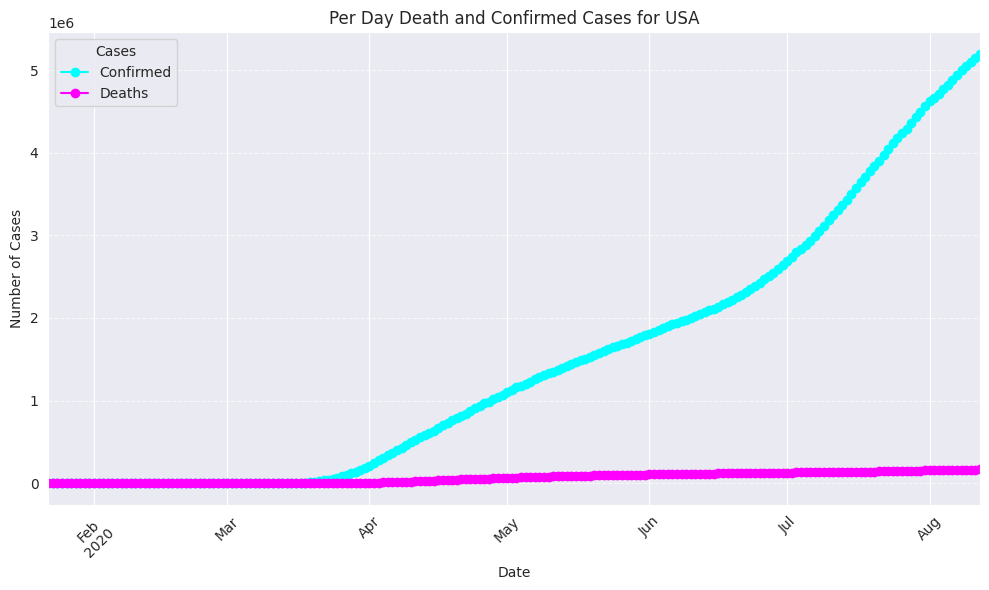

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Filter data for the USA
us_cases_complete = df[df['Country/Region'] == 'US'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
us_cases_complete['ObservationDate'] = pd.to_datetime(us_cases_complete['ObservationDate'])
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date'] = pd.to_datetime(us_cases_complete['date'])  # Ensure proper datetime format

# Filter data from January 22, 2020, onward
us_cases_complete = us_cases_complete[us_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot_us = us_cases_complete.groupby('date')[["Confirmed", "Deaths"]].sum()

# Plot the data
num_plot_us.plot(figsize=(10, 6), title='Per Day Death and Confirmed Cases for USA', colormap='cool', marker='o', linestyle='-')

# Improve readability
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()

# Show the plot
plt.show()


This graph shows a certain flatness in the mid of June, 2020, But after that it is in the upswing mode with a steep slope upwards

Columns in the dataset: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


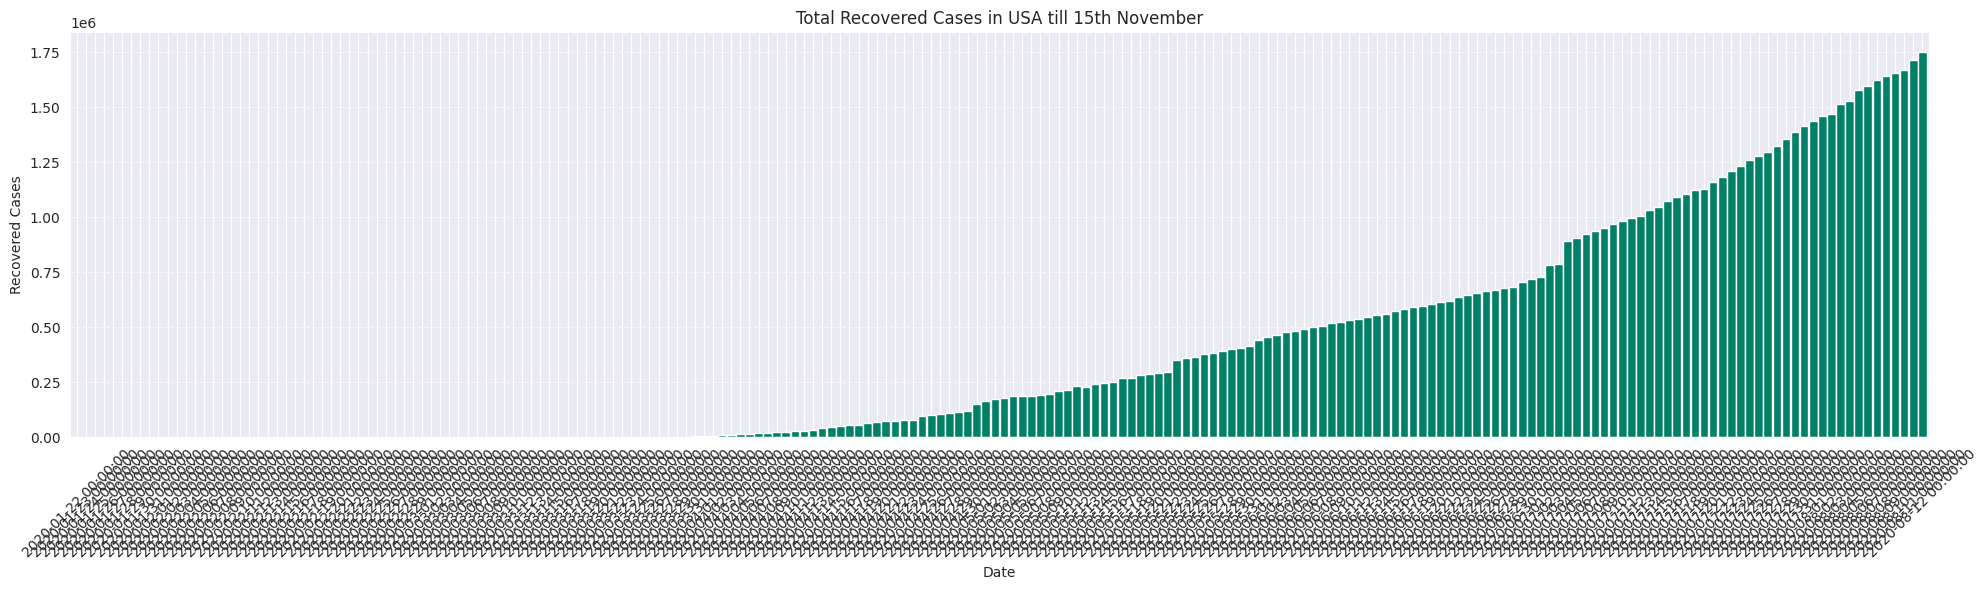

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Check the column names to verify if 'Recovered' exists
print("Columns in the dataset:", df.columns)

# Filter data for the USA
us_cases_complete = df[df['Country/Region'] == 'US'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
us_cases_complete['ObservationDate'] = pd.to_datetime(us_cases_complete['ObservationDate'])
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date'] = pd.to_datetime(us_cases_complete['date'])  # Ensure proper datetime format

# Filter data from January 22, 2020, onward
us_cases_complete = us_cases_complete[us_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot_us = us_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Check if 'Recovered' column exists
if 'Recovered' not in num_plot_us.columns:
    raise ValueError("'Recovered' column is missing from the dataset!")

# Plot the data
num_plot_us['Recovered'].plot(
    kind='bar',
    width=0.95,
    figsize=(20, 6),
    colormap='summer',
    title='Total Recovered Cases in USA till 15th November'
)

# Improve readability
plt.xlabel("Date")
plt.ylabel("Recovered Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()

# Show the plot
plt.show()


The Death toll in United States is not flatten any more rather it is increasing day by day in a exponential manner with a steep slope upwards. It does not have any kind of peak till now so that it can flatten after a particular peak.

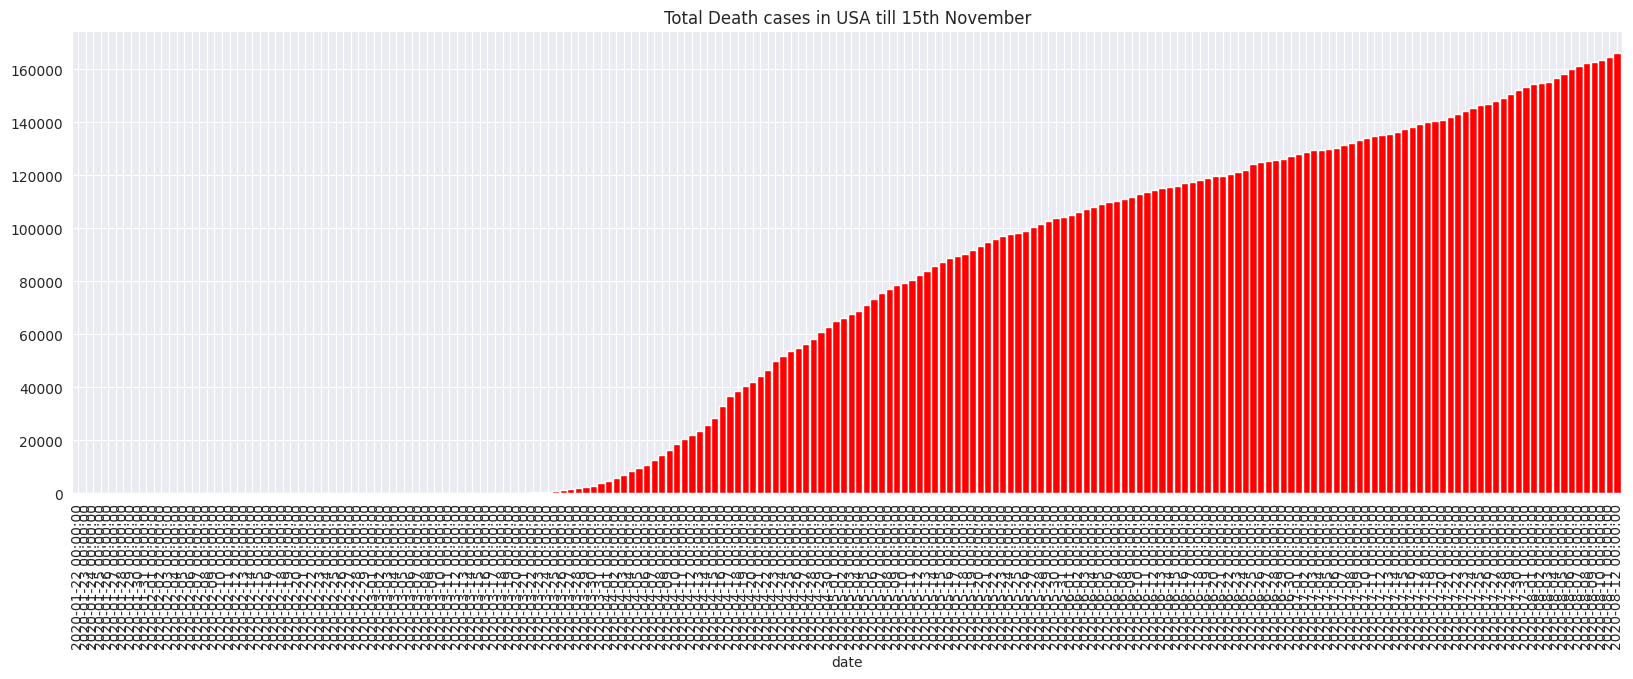

In [88]:
num_plot_us['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in USA till 15th November')
plt.show()

Columns in the dataset: Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')


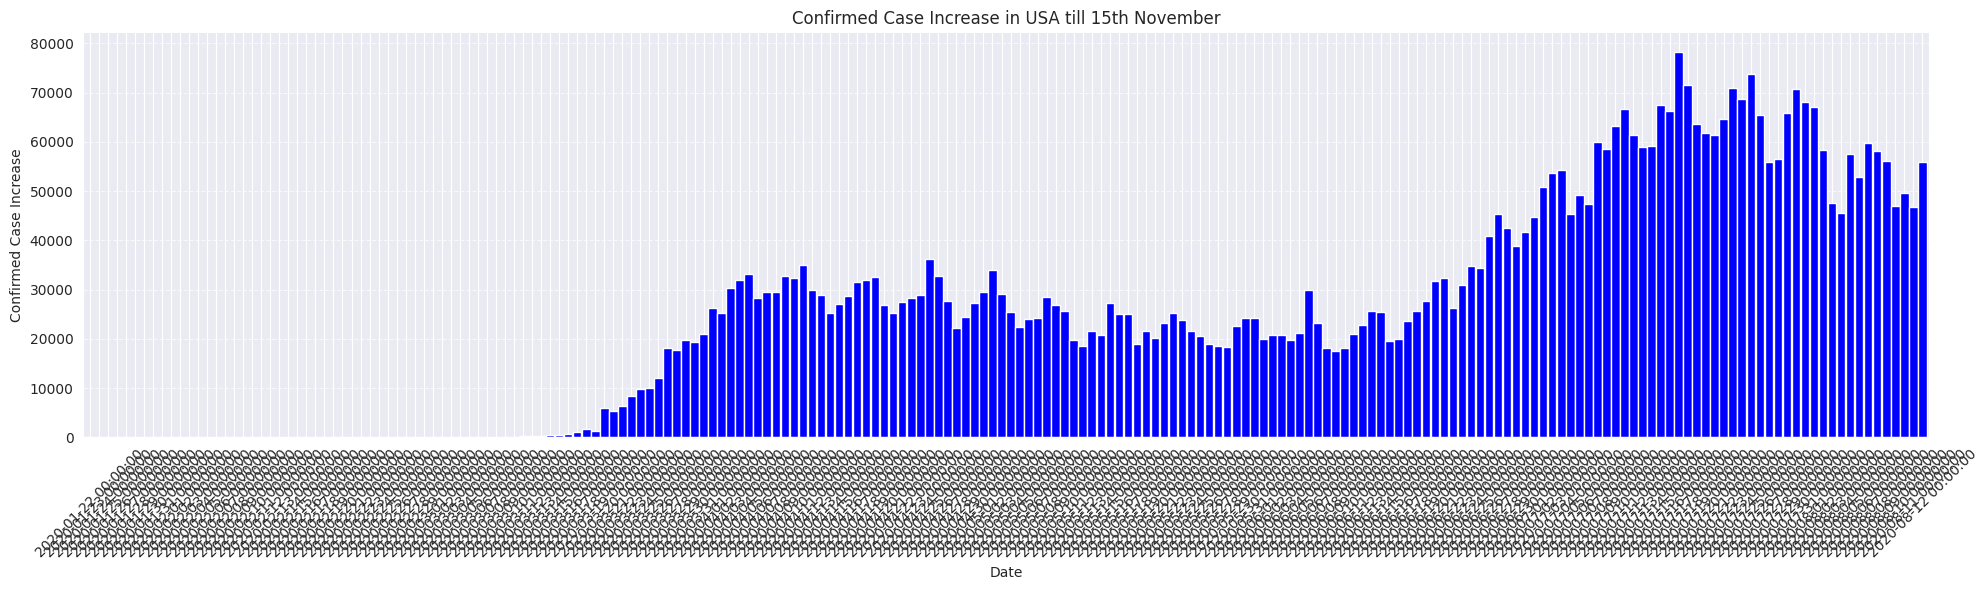

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Check the column names to verify if 'Confirmed' exists
print("Columns in the dataset:", df.columns)

# Filter data for the USA
us_cases_complete = df[df['Country/Region'] == 'US'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
us_cases_complete['ObservationDate'] = pd.to_datetime(us_cases_complete['ObservationDate'])
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date'] = pd.to_datetime(us_cases_complete['date'])  # Ensure proper datetime format

# Filter data from January 22, 2020, onward
us_cases_complete = us_cases_complete[us_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot_us = us_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Calculate the daily confirmed case increase (difference between consecutive days)
num_plot_us['Confirmed Case Increase'] = num_plot_us['Confirmed'].diff().fillna(0)

# Plot the 'Confirmed Case Increase' data
num_plot_us['Confirmed Case Increase'].plot(
    kind='bar',
    width=0.95,
    figsize=(20, 6),
    colormap='winter',
    title='Confirmed Case Increase in USA till 15th November'
)

# Improve readability
plt.xlabel("Date")
plt.ylabel("Confirmed Case Increase")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()

# Show the plot
plt.show()


**In the mid of June the confirmed cases are decreased and the incrementation is flattened by a certain moment. But unfortunately in the last week July the incrementation in the confirmed cases are increased suddenly with a steep slope. After a week of steep slope in the increment of the confirmed cases there is a decrement in the confirmed cases in a daily basis manner. As we can see in the graph, that after a week of high rise the peaks are coming lower and lower day by day. Which shows that the confirmed cases and decrementing day by day slowly. It's really a big sign of improvement for United States**

**Similar increase has been seen in the deaths reported by US with highest number of deaths(4591) recorded on 16th April**

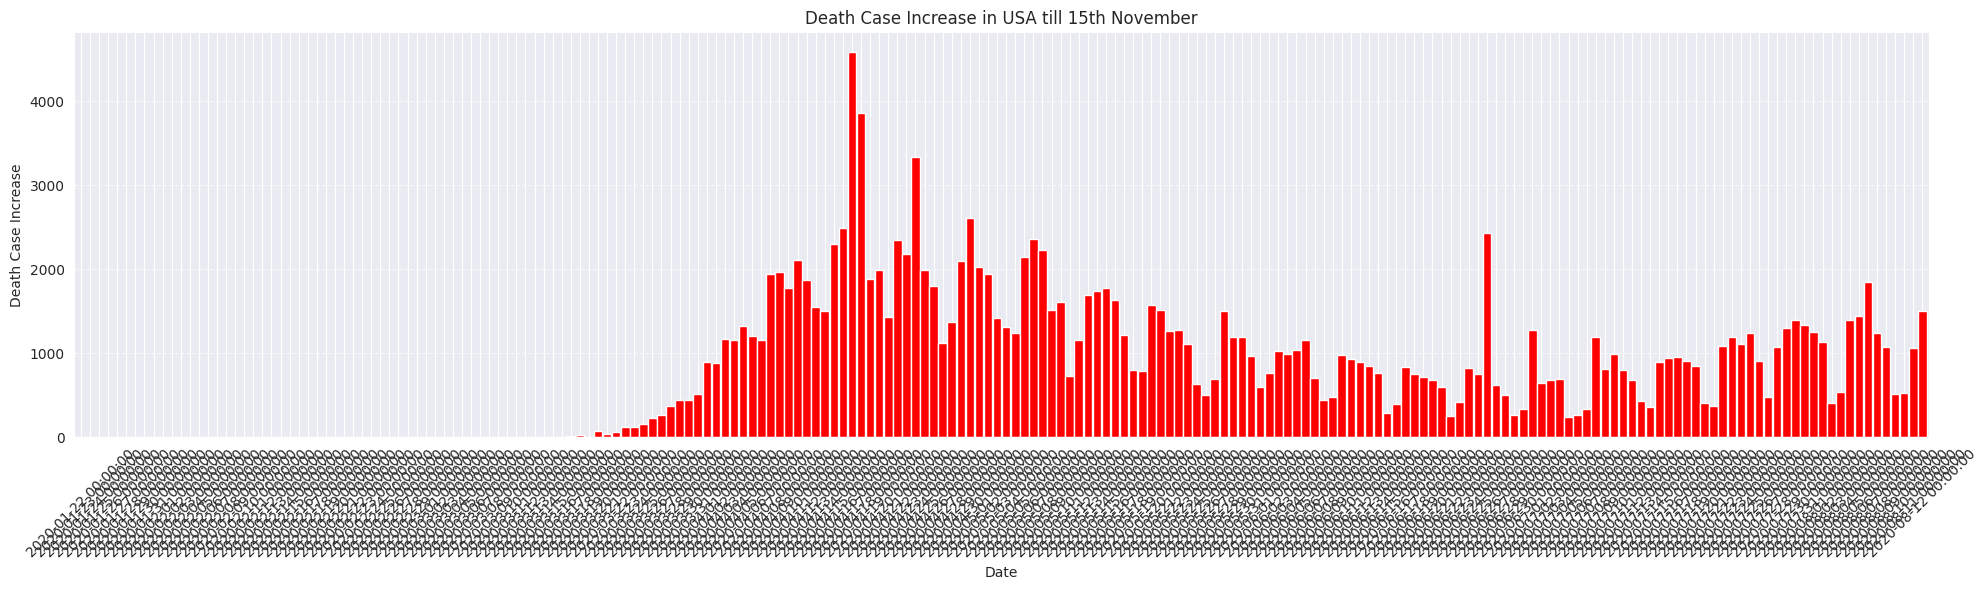

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/covid_19_data1.csv"
df = pd.read_csv(file_path)

# Filter data for the USA
us_cases_complete = df[df['Country/Region'] == 'US'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
us_cases_complete['ObservationDate'] = pd.to_datetime(us_cases_complete['ObservationDate'])
us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date
us_cases_complete['date'] = pd.to_datetime(us_cases_complete['date'])  # Ensure proper datetime format

# Filter data from January 22, 2020, onward
us_cases_complete = us_cases_complete[us_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot_us = us_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Calculate the daily increase in deaths (difference between consecutive days)
num_plot_us['Death Case Increase'] = num_plot_us['Deaths'].diff().fillna(0)

# Plot the 'Death Case Increase' data
num_plot_us['Death Case Increase'].plot(
    kind='bar',
    width=0.95,
    figsize=(20, 6),
    colormap='autumn',
    title='Death Case Increase in USA till 15th November'
)

# Improve readability
plt.xlabel("Date")
plt.ylabel("Death Case Increase")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.tight_layout()

# Show the plot
plt.show()


**As the graph shows that on the particular day of 16th April 2020 USA reported a highest no. of death cases. After that the death cases are slowly coming down to a certain limit but suddenly in the recent times the Death cases are increasing day by day which is very much annoying for USA**

***************************

## C. South Korea - The Most successful country to fight against Covid - 19

First outbreak: First conferm case was founded in south koria on 20 January 2020. The number of confermed cases increased after 10 February.

Total affected: In present situation the total cases is 31735.Cases are increasing after February in a linear scale. Daily number of new cases was too high in February then it was reduced, after August 16 to September mid it was extremely high.

Death rate: Number of death cases are increasing from February but daily death was in the top level in mid of March. Total number of death is 513 till November 25, and recovery number is 26825.


### Per Day Statistics for South Korea till 15th November, 2020

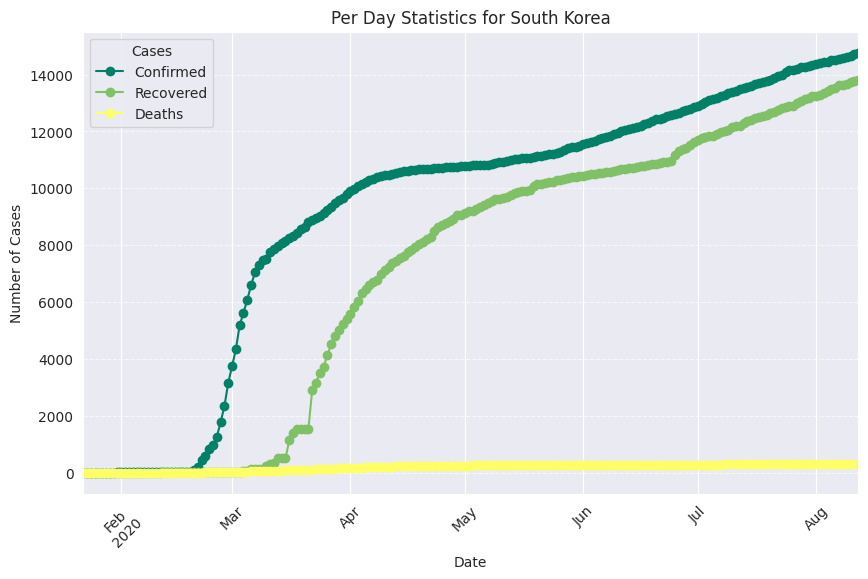

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for South Korea
skorea_cases_complete = df[df['Country/Region'] == 'South Korea'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
skorea_cases_complete['ObservationDate'] = pd.to_datetime(skorea_cases_complete['ObservationDate'])
skorea_cases_complete['date'] = skorea_cases_complete['ObservationDate'].dt.date
skorea_cases_complete['date'] = pd.to_datetime(skorea_cases_complete['date'])  # Ensure proper datetime format

# Filter data from January 22, 2020, onward
skorea_cases_complete = skorea_cases_complete[skorea_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot = skorea_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Plot the data
num_plot.plot(figsize=(10, 6), title='Per Day Statistics for South Korea', colormap='summer', marker='o', linestyle='-')

# Improve readability
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


### No. of Informed cases in the recent times

In [94]:
import pandas as pd

# Reset index if needed
num_plot_skorea = num_plot.reset_index()

# Initialize new columns
num_plot_skorea['Death Case Increase'] = 0
num_plot_skorea['Confirmed Case Increase'] = 0

# Avoid SettingWithCopyWarning using .loc[]
num_plot_skorea.loc[0, 'Confirmed Case Increase'] = 0
num_plot_skorea.loc[0, 'Death Case Increase'] = 0

# Ensure correct column indexing and calculations
for i in range(1, num_plot_skorea.shape[0]):
    num_plot_skorea.loc[i, 'Confirmed Case Increase'] = max(0, num_plot_skorea.iloc[i, 1] - num_plot_skorea.iloc[i - 1, 1])
    num_plot_skorea.loc[i, 'Death Case Increase'] = max(0, num_plot_skorea.iloc[i, 3] - num_plot_skorea.iloc[i - 1, 3])

# Display last few rows
num_plot_skorea.tail()


date  Confirmed  Recovered  Deaths  Death Case Increase  \
199 2020-08-08    14598.0    13642.0   305.0                    1   
200 2020-08-09    14626.0    13658.0   305.0                    0   
201 2020-08-10    14660.0    13729.0   305.0                    0   
202 2020-08-11    14714.0    13786.0   305.0                    0   
203 2020-08-12    14770.0    13817.0   305.0                    0   

     Confirmed Case Increase  
199                       36  
200                       28  
201                       34  
202                       54  
203                       56

**In the recent times if we check out the no. of Confirmed case Increase, we can find that the cases are bearly minor as compared to the whole world. And the Death Case Increment is now down to 0 in the recent times. Which shows that SOUTH KOREA is able to fought against the virus with minimum casualties of 494 till 15th November, 2020**

### Total no. of Confirmed cases in South Korea till 15th November, 2020

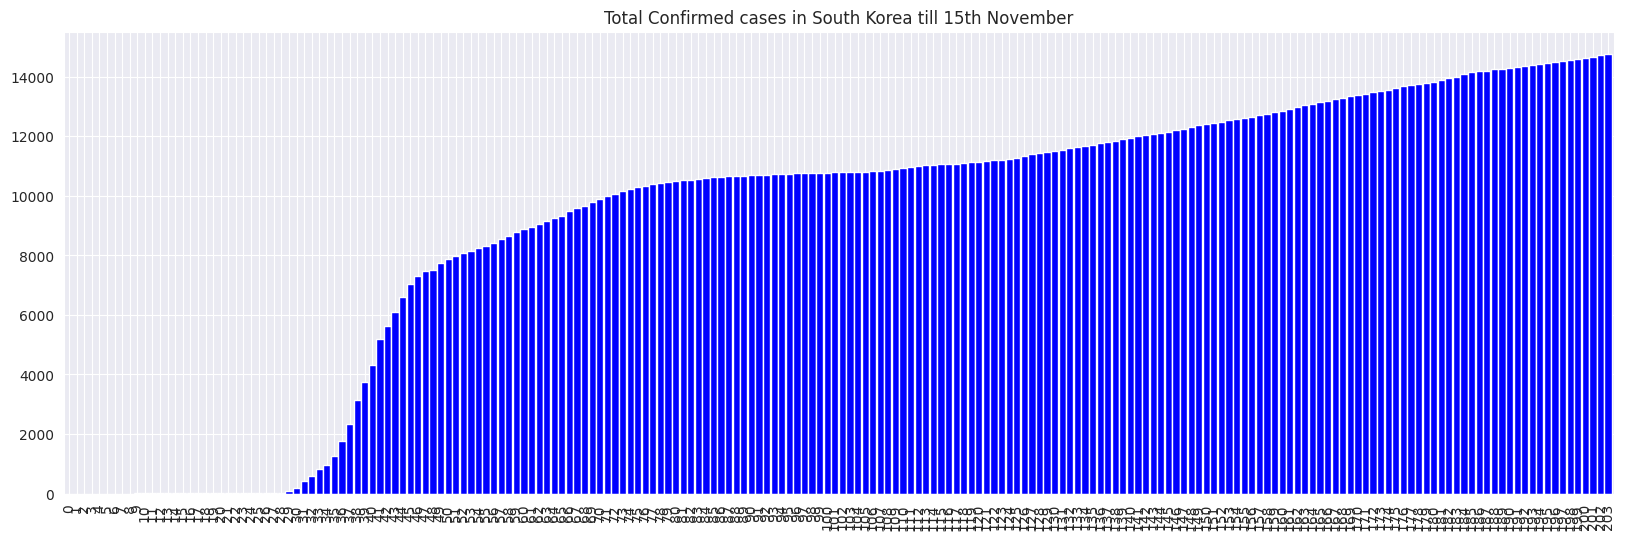

In [95]:
num_plot_skorea['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in South Korea till 15th November')
plt.show()

### Total no. of Recovered cases in South Korea till 15th November, 2020

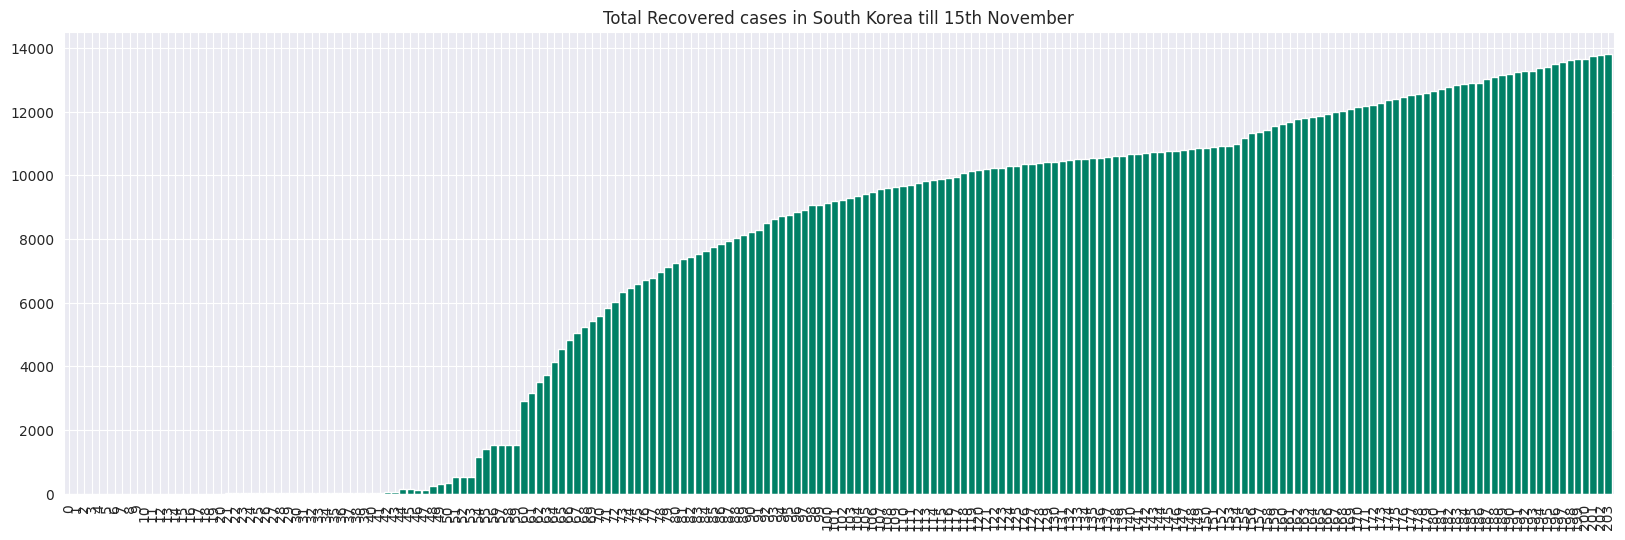

In [96]:
num_plot_skorea['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in South Korea till 15th November')
plt.show()

### Total no. Death Cases in South Korea till 15th November, 2020

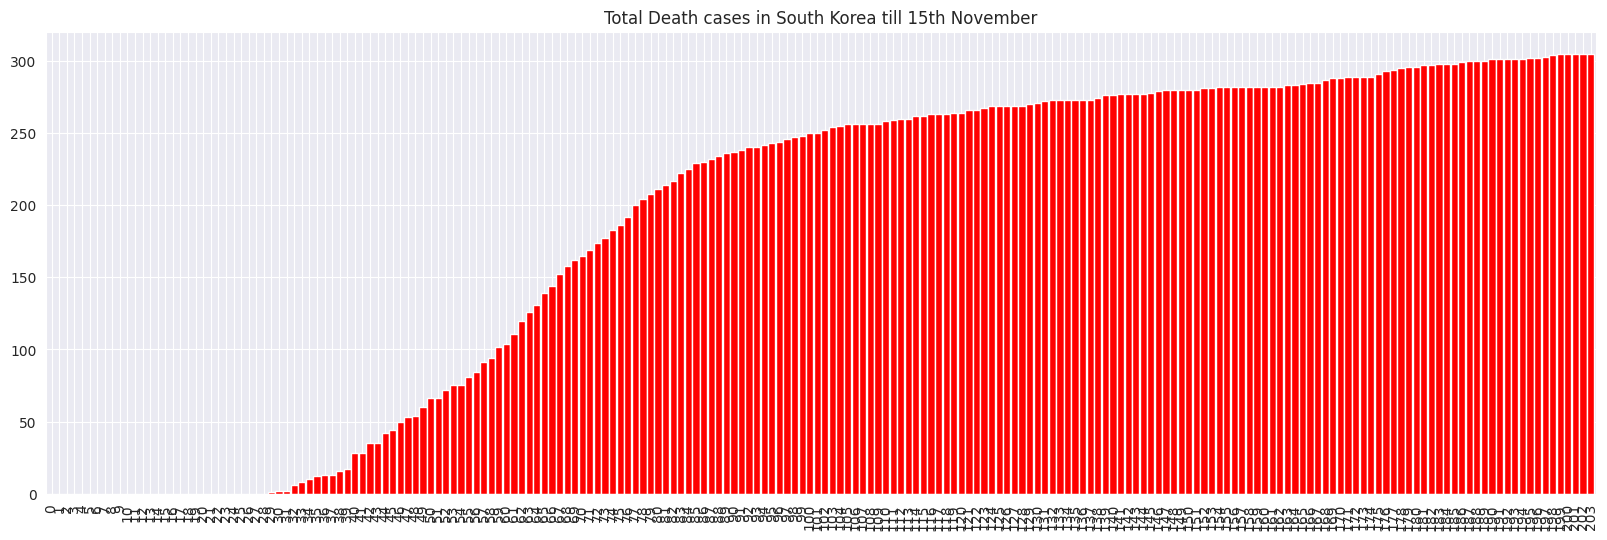

In [97]:
num_plot_skorea['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in South Korea till 15th November')
plt.show()

**From the above three graphs we can have a clear look that how the graph flattens and as a result the exponential growth has been stopped. Which clearly indicates that South Korea has fought against the virus quite brilliantly**

### Confirm case increment in South Korea till 15th November, 2020

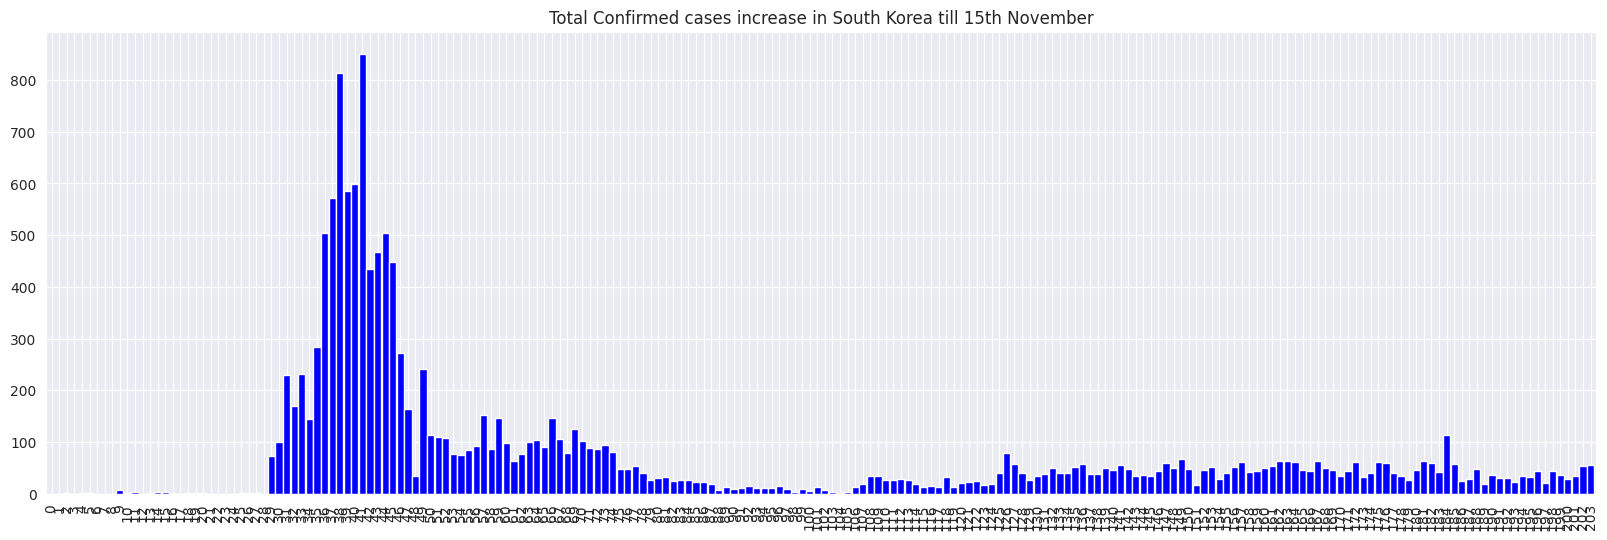

In [98]:
num_plot_skorea['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='bwr',title='Total Confirmed cases increase in South Korea till 15th November')
plt.show()

As we can see that the confirm cases are lowered to merely 100 per day which signifies the great work of South Korea to fought against the virus

### Death case increment in South Korea till 15th November, 2020

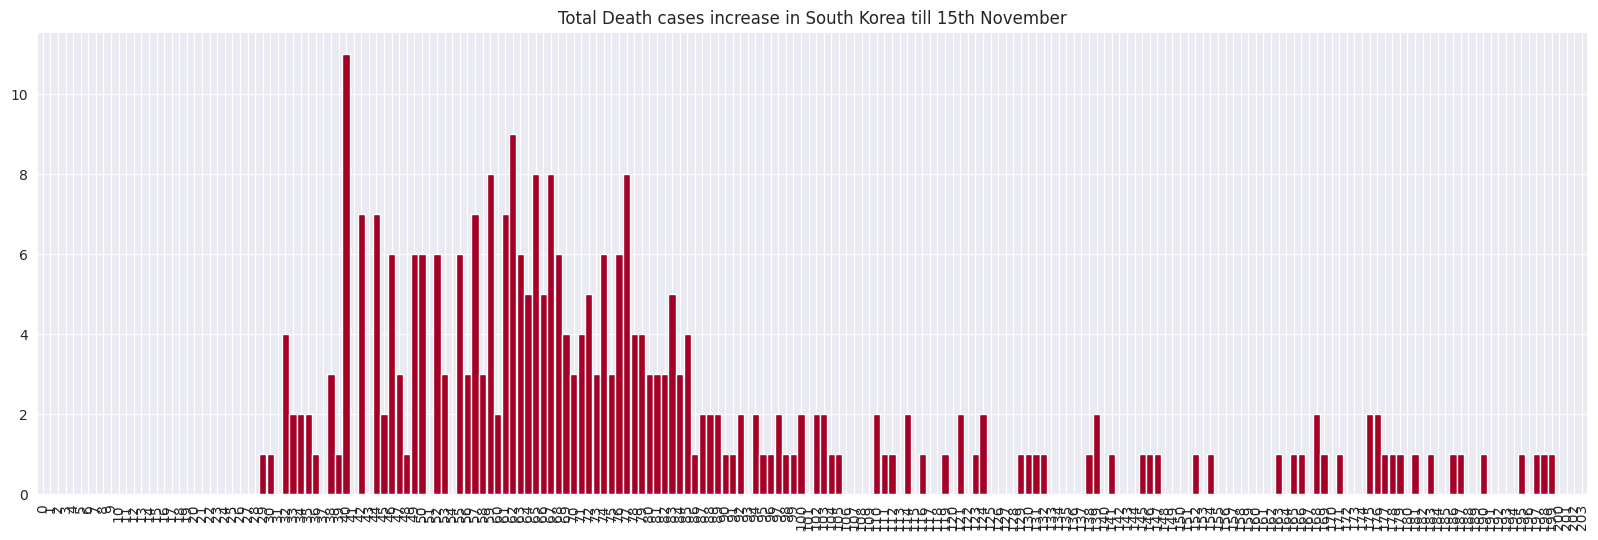

In [99]:
num_plot_skorea['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Total Death cases increase in South Korea till 15th November')
plt.show()

Also the Death Cases are lowered to 2 to 4 and from the recent few days it turns out to be 0

****************************

## D. United Kingdom - Recovered from Covid-19 or not?

First outbreak: The virus reached the country in late January 2020. The world's eighth-highest death rate per hundred thousand populations and the highest number overall in Europe.

Total affected: As of 2 November 2020 there have been 1,256,725 confirmed cases.Number of cases is highly increasing after September 6(2020). Number of daily affected cases is much higher than mid july-August.

Death rate: After March death rate was suddenly increased. Total death case is 56533 till 25 November. In November 21 new death was 341 in 22 it was 398. Only in 25 November number of death was 696.


### Per Day Statistics for United Kingdom till 15th November, 2020

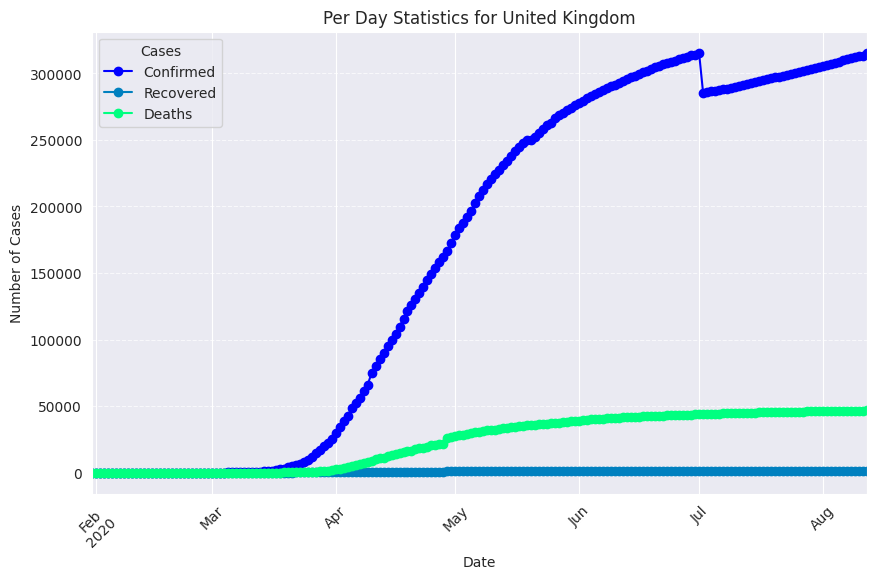

In [100]:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter data for the United Kingdom
uk_cases_complete = df[df['Country/Region'] == 'UK'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
uk_cases_complete['ObservationDate'] = pd.to_datetime(uk_cases_complete['ObservationDate'])
uk_cases_complete['date'] = uk_cases_complete['ObservationDate'].dt.date
uk_cases_complete['date'] = pd.to_datetime(uk_cases_complete['date'])  # Convert to proper datetime format

# Filter data from January 22, 2020, onward
uk_cases_complete = uk_cases_complete[uk_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot = uk_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Plot the data
num_plot.plot(figsize=(10, 6), title='Per Day Statistics for United Kingdom', colormap='winter', marker='o', linestyle='-')

# Improve readability
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


### Cases reported in last few days in UK

In [101]:
import pandas as pd

# Reset index if needed
num_plot_uk = num_plot.reset_index()

# Initialize new columns
num_plot_uk['Death Case Increase'] = 0
num_plot_uk['Confirmed Case Increase'] = 0

# Using `.loc[]` to avoid SettingWithCopyWarning
num_plot_uk.loc[0, 'Confirmed Case Increase'] = 0
num_plot_uk.loc[0, 'Death Case Increase'] = 0

# Ensure correct column indexing
for i in range(1, num_plot_uk.shape[0]):
    num_plot_uk.loc[i, 'Confirmed Case Increase'] = max(0, num_plot_uk.iloc[i, 1] - num_plot_uk.iloc[i - 1, 1])
    num_plot_uk.loc[i, 'Death Case Increase'] = max(0, num_plot_uk.iloc[i, 3] - num_plot_uk.iloc[i - 1, 3])

# Display last few rows
num_plot_uk.tail()


date  Confirmed  Recovered   Deaths  Death Case Increase  \
190 2020-08-08   311461.0     1449.0  46651.0                   55   
191 2020-08-09   312574.0     1451.0  46659.0                    8   
192 2020-08-10   313392.0     1463.0  46611.0                    0   
193 2020-08-11   313394.0     1464.0  46611.0                    0   
194 2020-08-12   315581.0     1472.0  46791.0                  180   

     Confirmed Case Increase  
190                      765  
191                     1113  
192                      818  
193                        2  
194                     2187

### Total Confirmed Cases in UK till 15th November, 2020

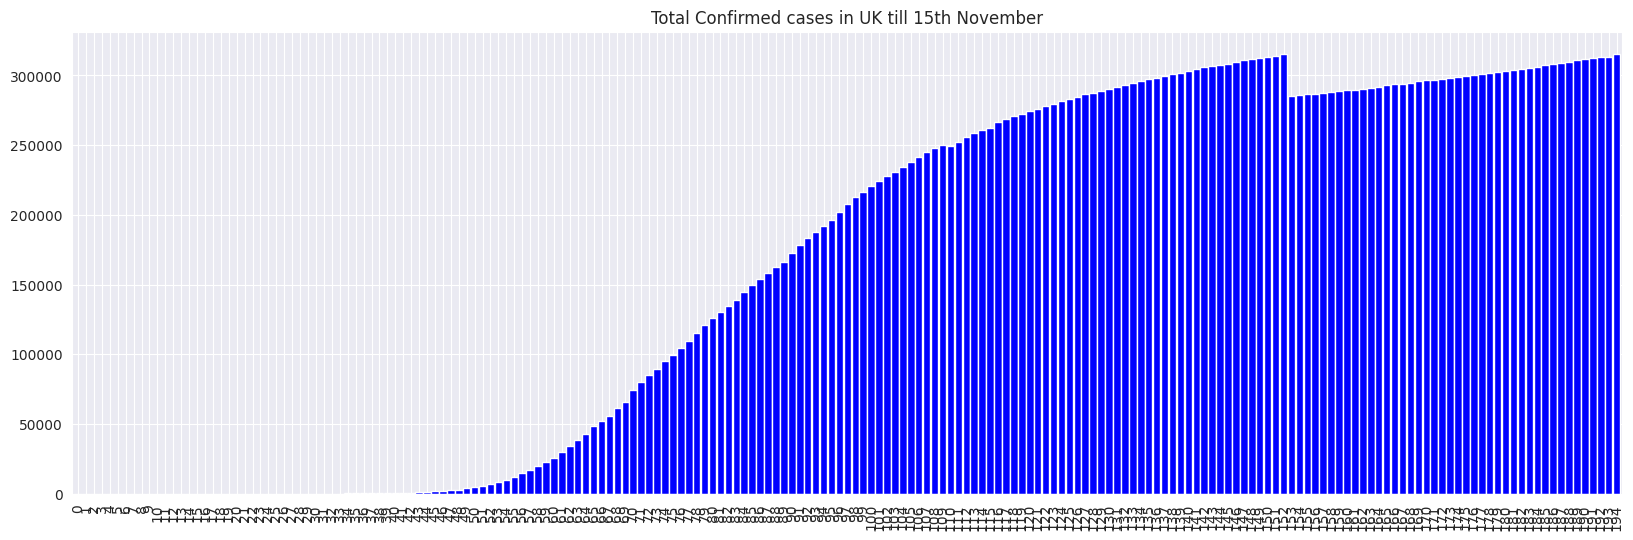

In [102]:
num_plot_uk['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in UK till 15th November')
plt.show()

### Total Recovered cases in UK till 15th November, 2020

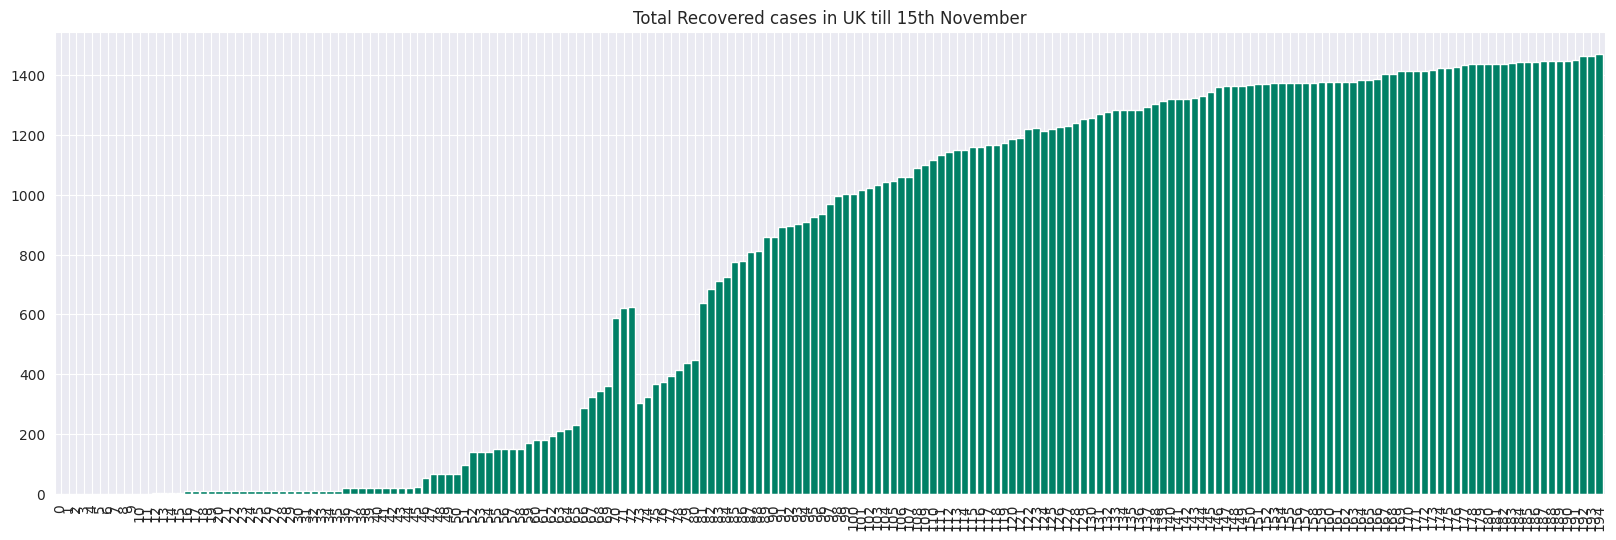

In [103]:
num_plot_uk['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in UK till 15th November')
plt.show()

### Total Casualties in UK till 15th November, 2020

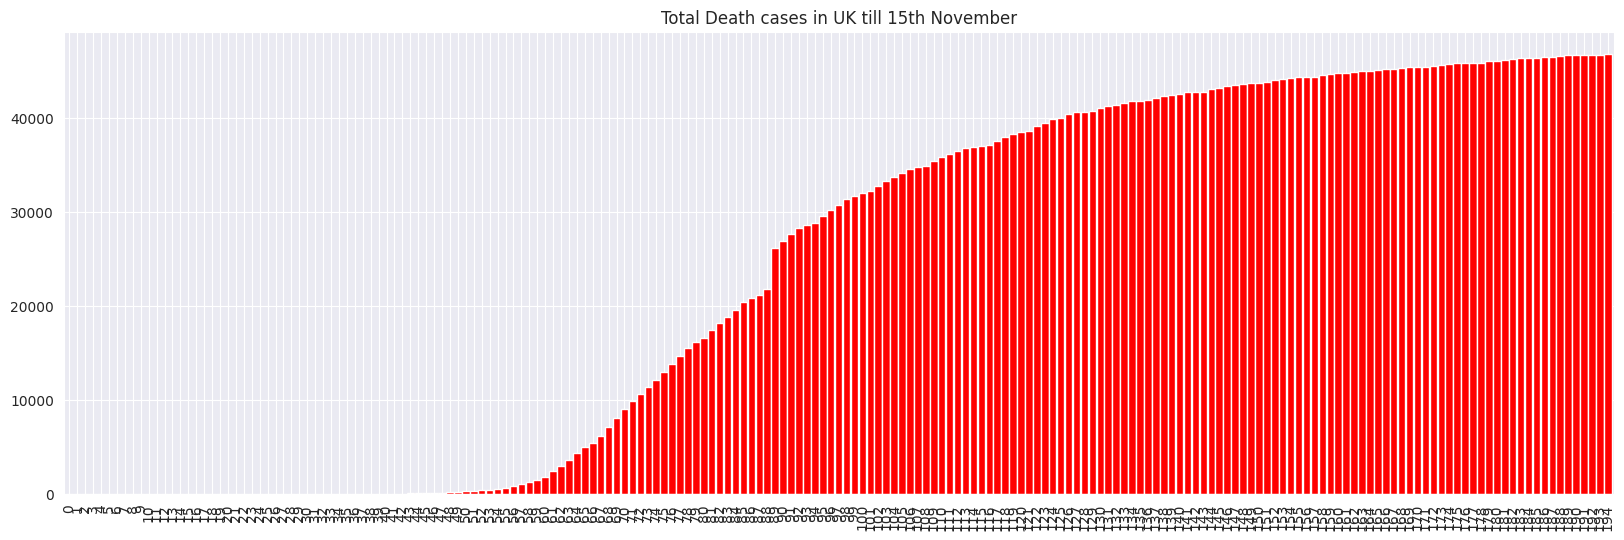

In [104]:
num_plot_uk['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in UK till 15th November')
plt.show()

**From the Plottings we can clearly observe that the confirmed, recovered and death tolls are flattened pretty much. Which signifies that UK is pretty much controlled the situation**

### Death Cases increased in UK till 15th November, 2020

**From the analysis we can observe that after the certain stage of the pandemic situation the number of confirmed cases are decreased and level up at a certain range. In the recent days the cases are reported near about 100**

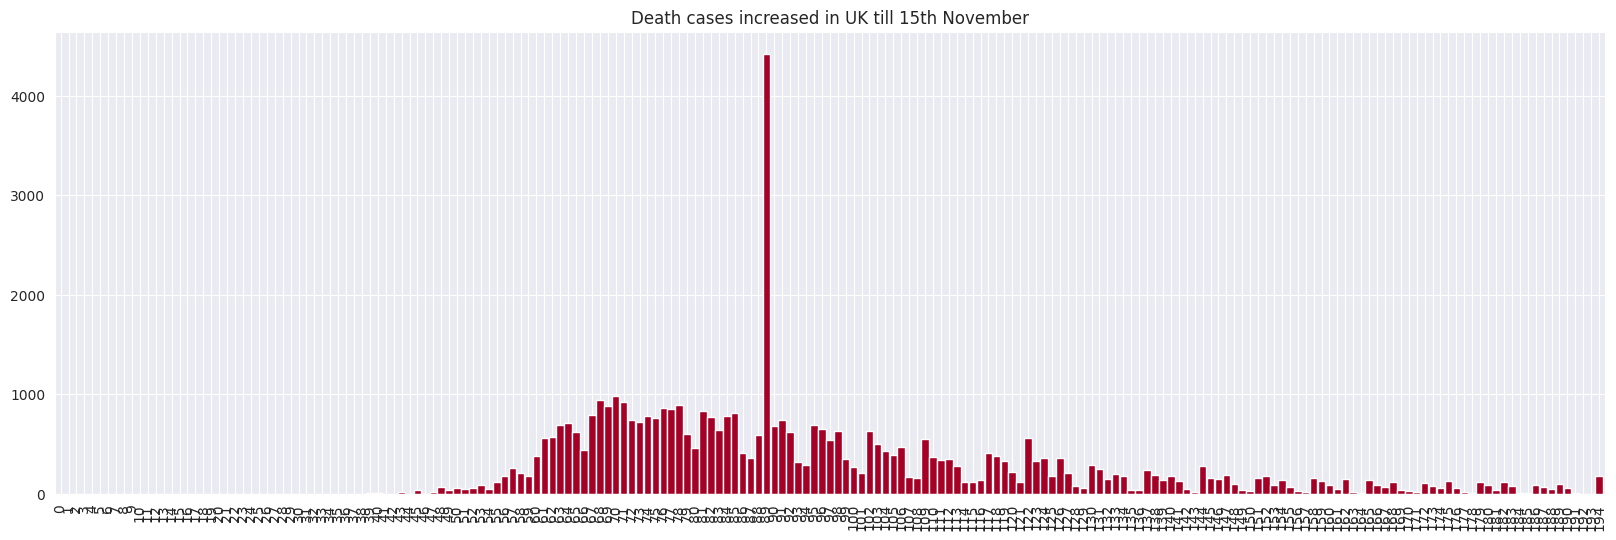

In [105]:
num_plot_uk['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in UK till 15th November')
plt.show()

**From the above observation we can also find out that the death cases are not reported in a huge manner in the recent times. The reported death cases are like under 10 per day, some days it is being reported as 0. From the above analysis it is clearly visible to us that the United Kingdom is fought against the pandemic situation quite brilliantly!**

### Conclusion : United Kingdom has fought well against the Covid-19!

*************************

## E. Does Germany defeat Covid-19 like UK did?

First outbreak:  On 27 January 2020, the first case in Germany was confirmed near Munich, Bavaria. By mid February, the arising cluster of cases had been fully contained. On 25 and 26 February, multiple cases related to the Italian outbreak were detected in Baden-Württemberg.

Total affected: Total positive cases are 983731 till now. Daily number of new cases is highly increasing after September 26.

Death rate: Death rate is very high after April 3. Total death till 25 November is 15381. But in Germany recovery rate is also high, till now total recovered number is 656400.


### Per Day Statistics for Germany till 15th November, 2020

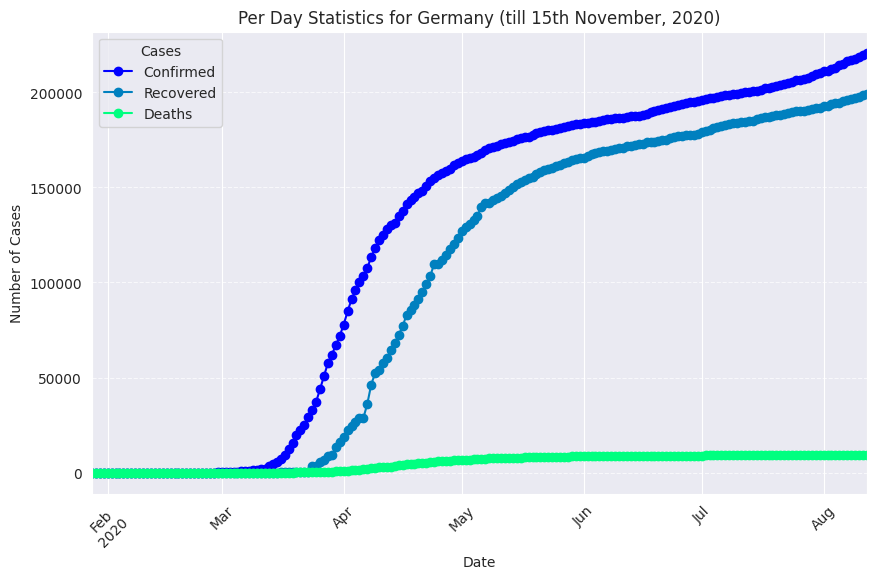

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Germany
germany_cases_complete = df[df['Country/Region'] == 'Germany'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
germany_cases_complete['ObservationDate'] = pd.to_datetime(germany_cases_complete['ObservationDate'])
germany_cases_complete['date'] = germany_cases_complete['ObservationDate'].dt.date
germany_cases_complete['date'] = pd.to_datetime(germany_cases_complete['date'])  # Convert to proper datetime format

# Filter data from January 22, 2020, onward
germany_cases_complete = germany_cases_complete[germany_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot = germany_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Plot the data
num_plot.plot(figsize=(10, 6), title='Per Day Statistics for Germany (till 15th November, 2020)', colormap='winter', marker='o', linestyle='-')

# Improve readability
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


### Cases reported in the last few days in Germany

In [107]:
import pandas as pd

# Reset index if needed
num_plot_germany = num_plot.reset_index()

# Initialize new columns with zeros
num_plot_germany['Death Case Increase'] = 0
num_plot_germany['Confirmed Case Increase'] = 0

# Avoid SettingWithCopyWarning using .loc[]
num_plot_germany.loc[0, 'Confirmed Case Increase'] = 0
num_plot_germany.loc[0, 'Death Case Increase'] = 0

# Ensure correct column indexing and calculations
for i in range(1, num_plot_germany.shape[0]):
    num_plot_germany.loc[i, 'Confirmed Case Increase'] = max(0, num_plot_germany.iloc[i, 1] - num_plot_germany.iloc[i - 1, 1])
    num_plot_germany.loc[i, 'Death Case Increase'] = max(0, num_plot_germany.iloc[i, 3] - num_plot_germany.iloc[i - 1, 3])

# Display last few rows
num_plot_germany.tail()


date  Confirmed  Recovered  Deaths  Death Case Increase  \
193 2020-08-08   216903.0   196550.0  9201.0                    6   
194 2020-08-09   217288.0   196783.0  9202.0                    1   
195 2020-08-10   218508.0   197382.0  9203.0                    1   
196 2020-08-11   219540.0   198347.0  9208.0                    5   
197 2020-08-12   220859.0   198991.0  9213.0                    5   

     Confirmed Case Increase  
193                      707  
194                      385  
195                     1220  
196                     1032  
197                     1319

### Total confirmed cases in Germany till 15th November, 2020

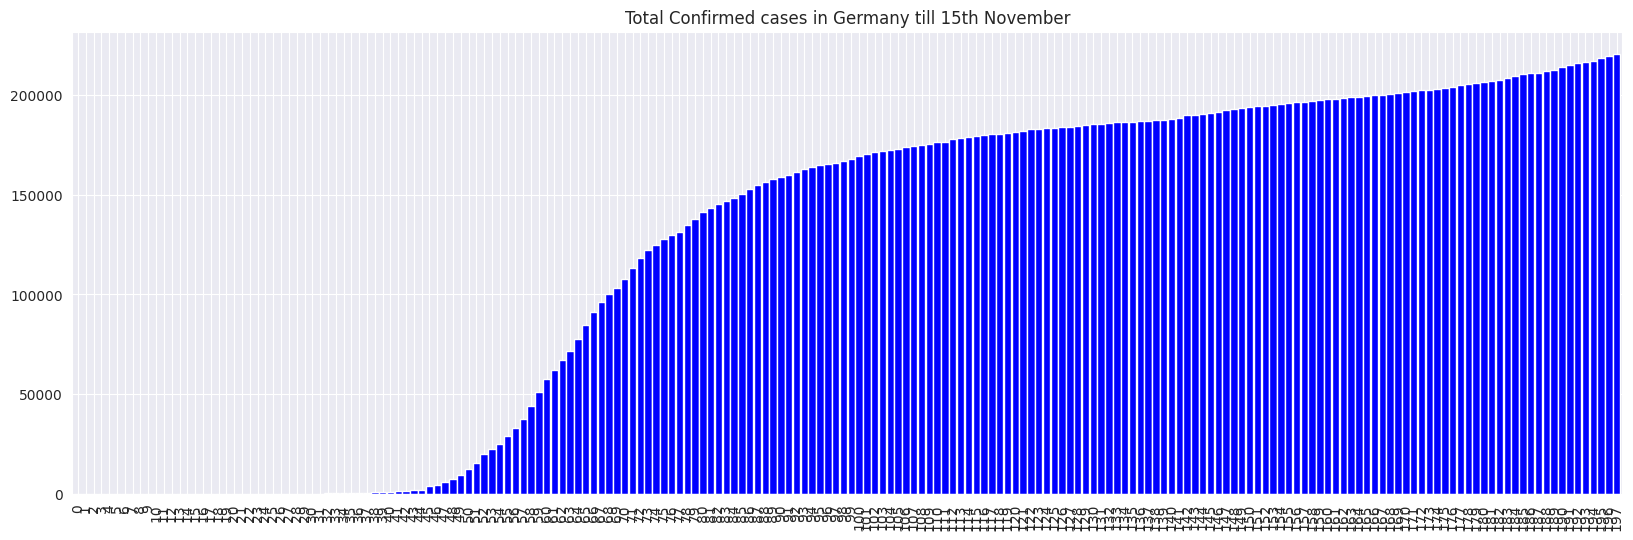

In [108]:
num_plot_germany['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Germany till 15th November')
plt.show()

### Total Recovered cases in Germany till 15th November, 2020

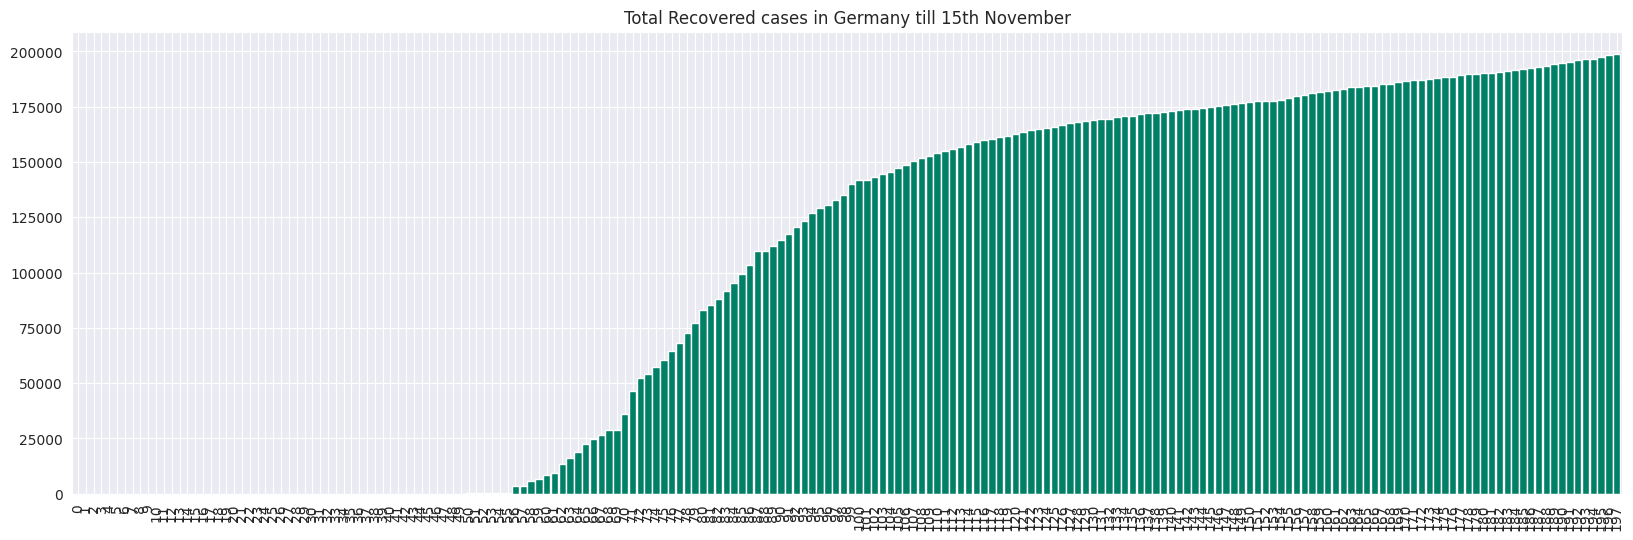

In [109]:
num_plot_germany['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Germany till 15th November')
plt.show()

### Total Death Cases in Germany till 15th November, 2020

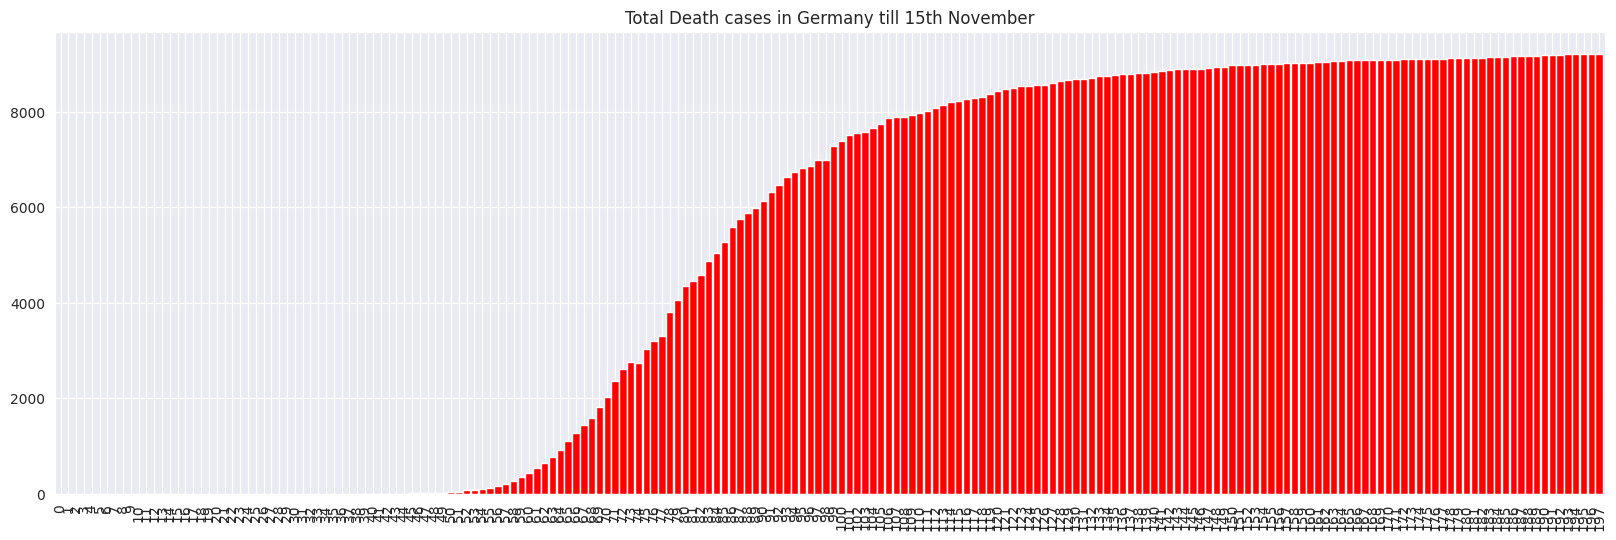

In [110]:
num_plot_germany['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Germany till 15th November')
plt.show()

**From the graphical analysis of the Total Confirmed cases, Recovered cases and death cases we have seen that the graph is flattened after the peak occured. Which shows that the country is doing quite great job to fight against the virus**

### Confirmed cases increased in Germany till 15th November, 2020

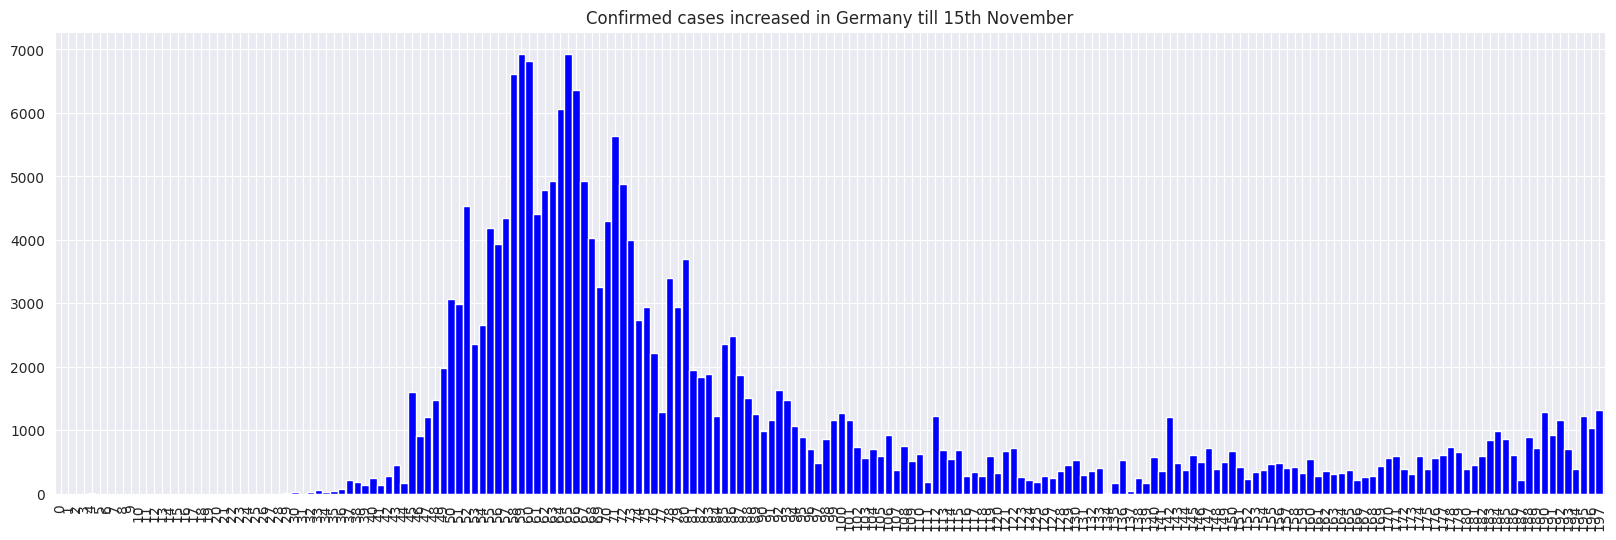

In [111]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Germany till 15th November')
plt.show()

**From the graph analysis we have got that the confirmed cases are now lowered to 1000 whereas the peak was at the 7000 mark a few months back. Which seems that the country is healing! But in the recent times unfortunately the condition is getting worser for the country as it saw per day 30000 rise suddenly**

### Death Cases Increased in Germany till 15th November, 2020

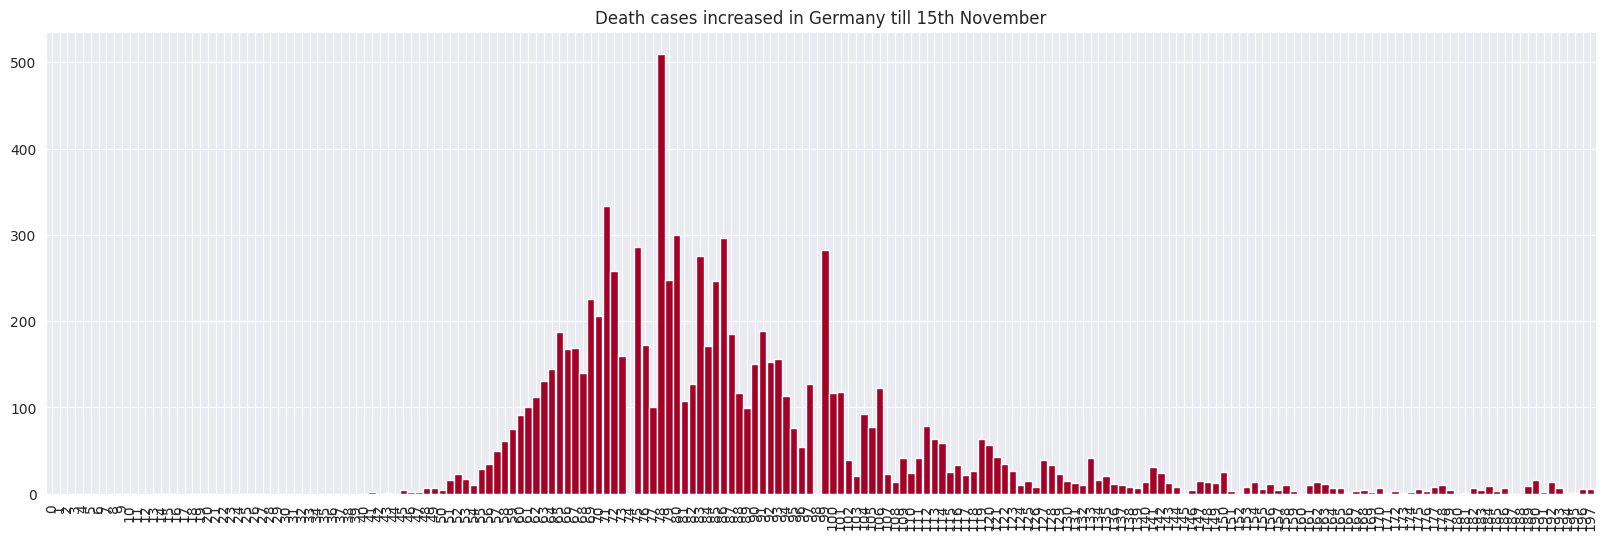

In [112]:
num_plot_germany['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Germany till 15th November')
plt.show()

**As per the analysis the Death tolls decreased to minimal numbers and it is clearly shows that Germany has fought against the virus pretty much**

### From the analysis we can say that, Germany has overcome the pandemic situation positively!

*********************

## F. Does the Tech-country, Japan overcome the situation?

First outbreak: On 15 January 2020, the Ministry of Health, Labour and Welfare, Japan (MHLW) reported an imported case of laboratory-confirmed 2019-novel coronavirus (2019-nCoV) from Wuhan, Hubei Province, China.
Total affected: Cases increasing rate is very high from February 15. Total affected is 31735. Number of daily new cases is lesser than number of cases in mid February but it was in level from September 12 to November 7.
Death Rate: Number of death rate is creasing but daily death cases are reduced from February-March time. Number of death is 2001 till 25 November.


### Per day statistics for Japan, till 15th November, 2020

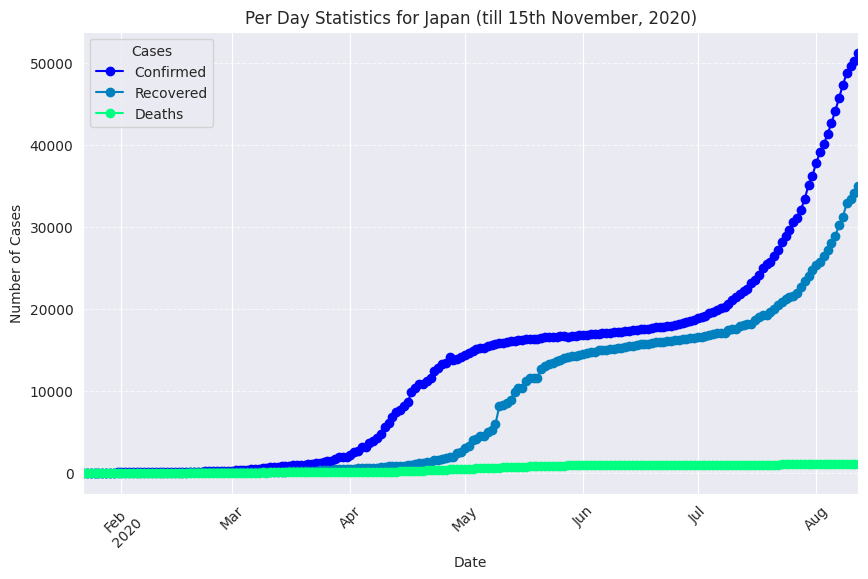

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Japan
japan_cases_complete = df[df['Country/Region'] == 'Japan'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
japan_cases_complete['ObservationDate'] = pd.to_datetime(japan_cases_complete['ObservationDate'])
japan_cases_complete['date'] = japan_cases_complete['ObservationDate'].dt.date
japan_cases_complete['date'] = pd.to_datetime(japan_cases_complete['date'])  # Convert to proper datetime format

# Filter data from January 22, 2020, onward
japan_cases_complete = japan_cases_complete[japan_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot = japan_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Plot the data
num_plot.plot(figsize=(10, 6), title='Per Day Statistics for Japan (till 15th November, 2020)', colormap='winter', marker='o', linestyle='-')

# Improve readability
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


### Cases reported in recent times in Japan

In [114]:
import pandas as pd

# Reset index if needed
num_plot_japan = num_plot.reset_index()

# Initialize new columns with zeros
num_plot_japan['Death Case Increase'] = 0
num_plot_japan['Confirmed Case Increase'] = 0

# Avoid SettingWithCopyWarning using .loc[]
num_plot_japan.loc[0, 'Confirmed Case Increase'] = 0
num_plot_japan.loc[0, 'Death Case Increase'] = 0

# Calculate daily increase safely, preventing negative values
for i in range(1, num_plot_japan.shape[0]):
    num_plot_japan.loc[i, 'Confirmed Case Increase'] = max(0, num_plot_japan.iloc[i, 1] - num_plot_japan.iloc[i - 1, 1])
    num_plot_japan.loc[i, 'Death Case Increase'] = max(0, num_plot_japan.iloc[i, 3] - num_plot_japan.iloc[i - 1, 3])

# Display last few rows
num_plot_japan.tail()


date  Confirmed  Recovered  Deaths  Death Case Increase  \
199 2020-08-08    47342.0    31248.0  1042.0                    0   
200 2020-08-09    48782.0    32867.0  1047.0                    5   
201 2020-08-10    49617.0    33450.0  1052.0                    5   
202 2020-08-11    50302.0    34136.0  1058.0                    6   
203 2020-08-12    51288.0    34969.0  1066.0                    8   

     Confirmed Case Increase  
199                     1578  
200                     1440  
201                      835  
202                      685  
203                      986

**In the recent times the number of confirmed cases are increasing suddenly, and also it increases the death toll in the recent 5days as of 12th August, 2020**

### Total no. of Confirmed cases in Japan till 15th November, 2020

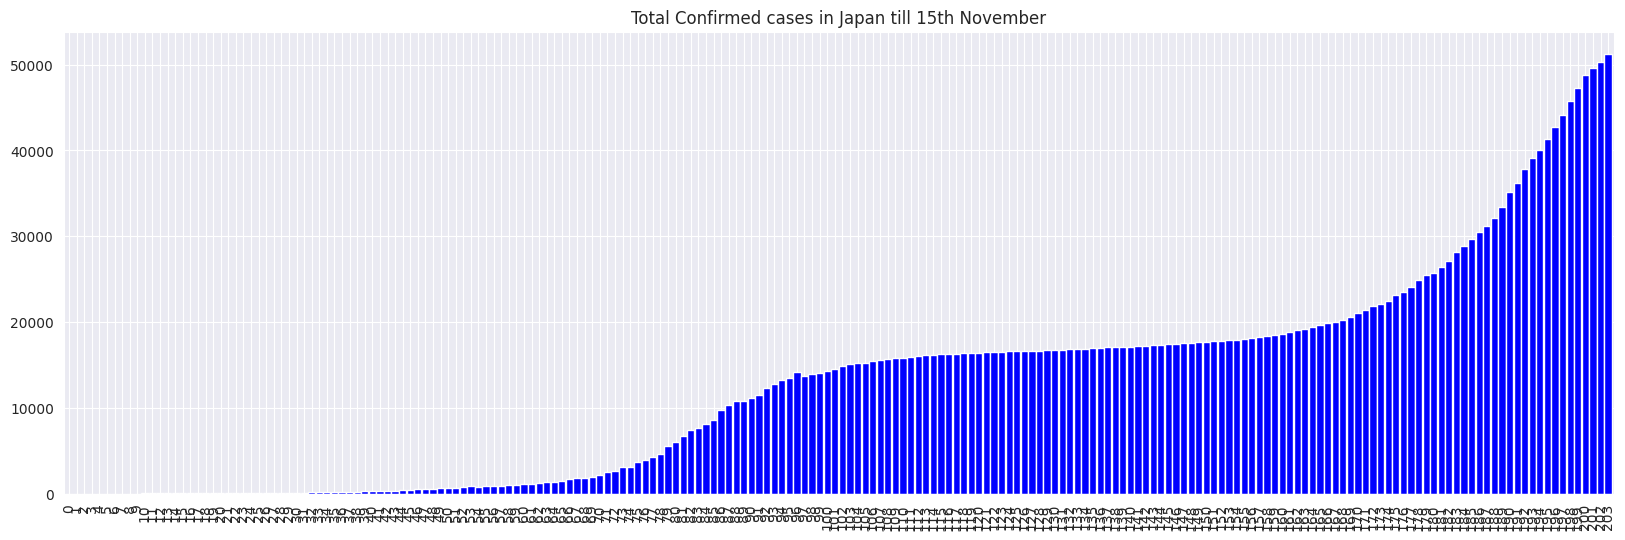

In [115]:
num_plot_japan['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Japan till 15th November')
plt.show()

**As per the graphical analysis of the data we can observe that the confirmed cases are flattened at the 20000 mark and at that period we all thought that Japan has fought against the virus very well. But unfortunately in the last 2 weeks there is suddenly an upswing with steep slope upwards has been shown in the curve. This cost Japan an increment in the Total no. of Confirmed cases from merely 20000 to a rapid 50000 in just two weeks. But the main part of the tension is the new slope in the curve is very much steep and it's upswinging day by day. It does not provide any kind of flatness in the curve which may cost Japan at a very high risk**

### Total no. of Recovered cases in Japan, till 15th November, 2020

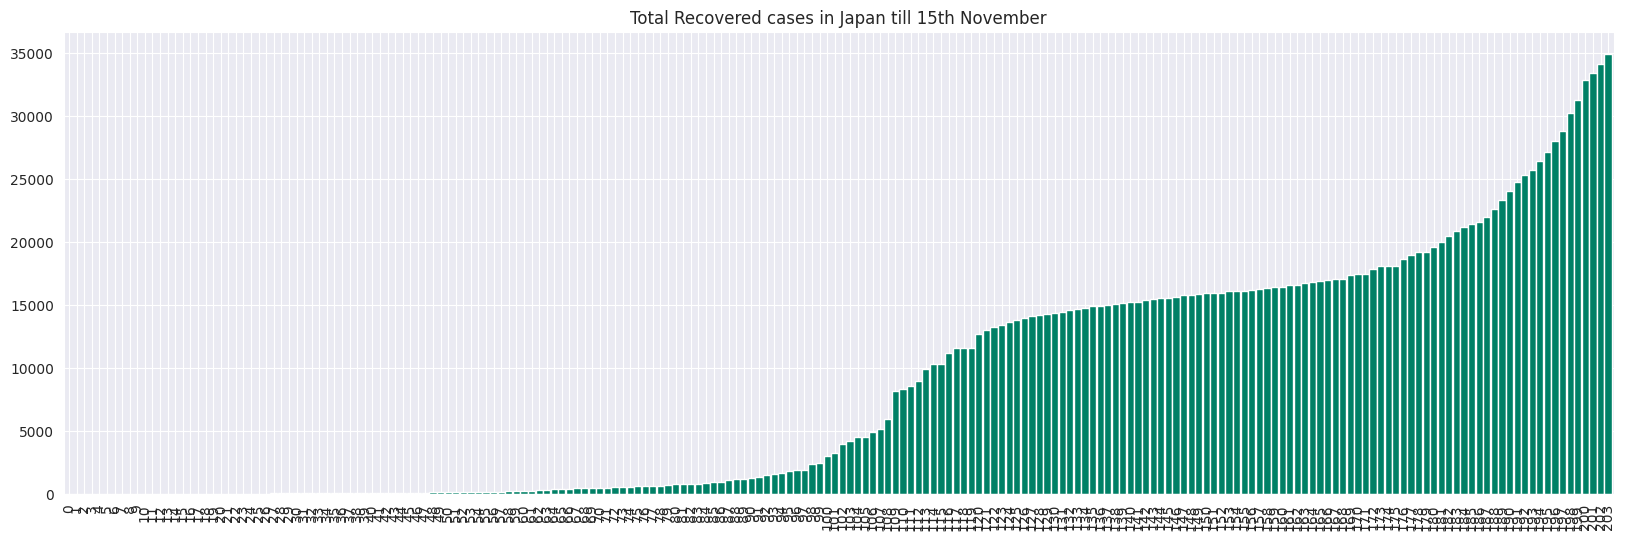

In [116]:
num_plot_japan['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Japan till 15th November')
plt.show()

**If we think about the curve of the confirmed cases the recovery rate is also upswinging manner. That will help Japan to get rid of this high situation**

### Total no. of Death cases in Japan till 15th November, 2020

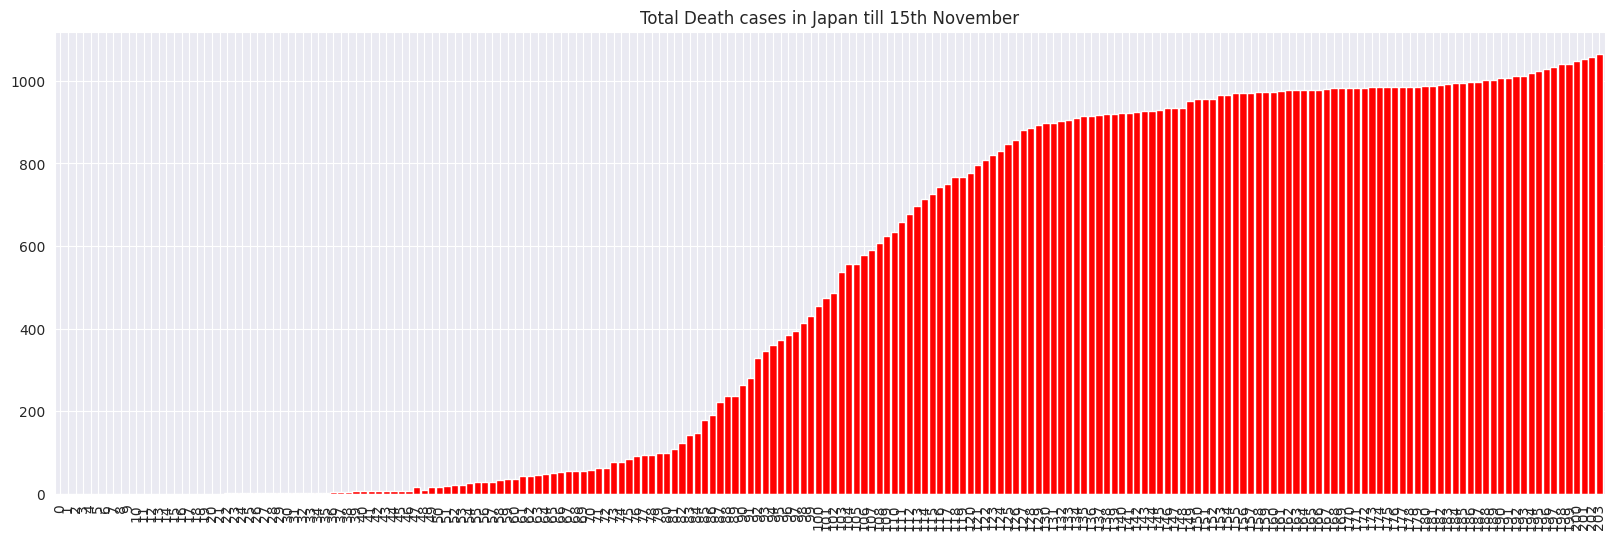

In [117]:
num_plot_japan['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Japan till 15th November')
plt.show()

**As per the curve of the Total confirmed cases and total recovered cases we can easily said that, Japan made a huge impact in the in earlier days as a result they saw a flattened curve for 1-2 months. But whwnever they thought that this could end the spread of the virus and re-opened everything, at the very moment thay have seen the upswinging curve suddenly. But a blessing for Japan is that they have controlled the Death cases, as we can see in the curve that it is flattened from last 3 months and there is no sudden increment in the curve. Which shows a good sign for the Japan Government. But still Japan have to be cautious about the upswinging curve of the confirmed cases though the Death toll is under control right now**

### Confirmed cases increased in Japan till 15th November, 2020

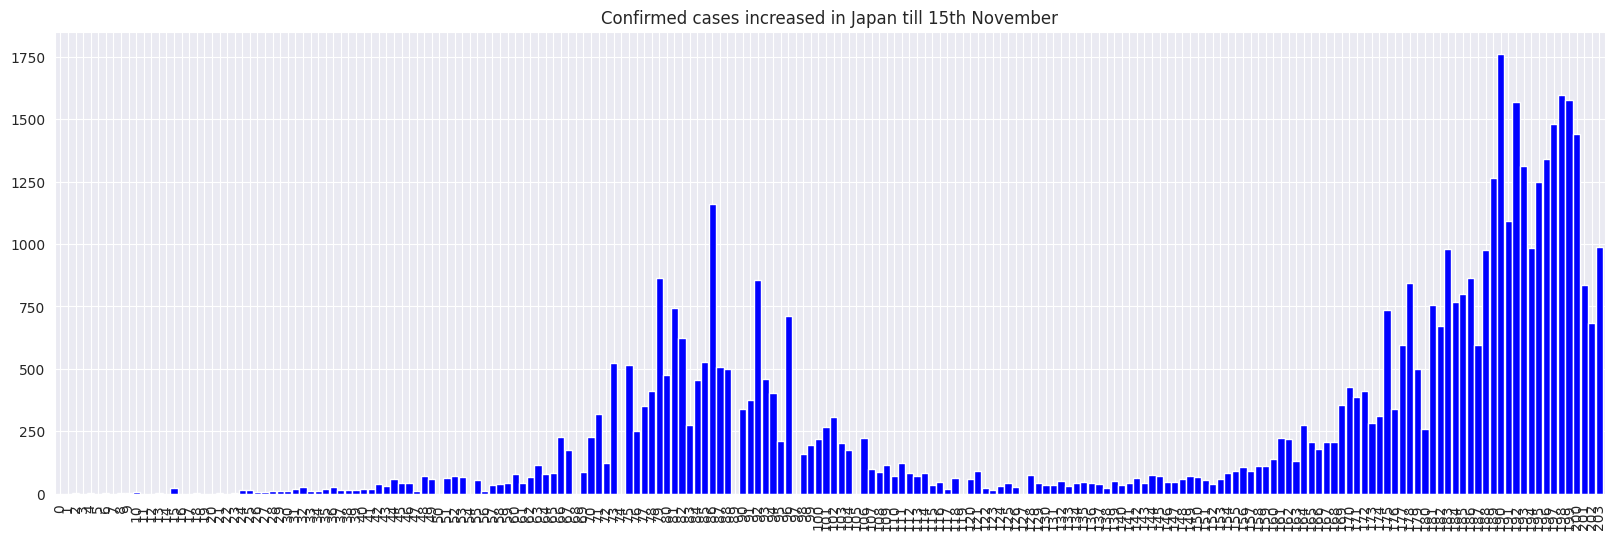

In [118]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Japan till 15th November')
plt.show()

**As you can clearly observe that the peaks are coming in the recent times though they are not coming in between of the two peaks in a gap of 2 - 3 months. In the month of May, Japan have shown a massive increment day to day confirmed cases and after that they have managed to bring the manhattans down. but unfortunately the day to day confirmed cases are increasing in a drastic manner from the previous one. The upswing is much more steeper than the previous manhattans. Which may cost Japan!**

### Death Cases increase in Japan till 15th November, 2020

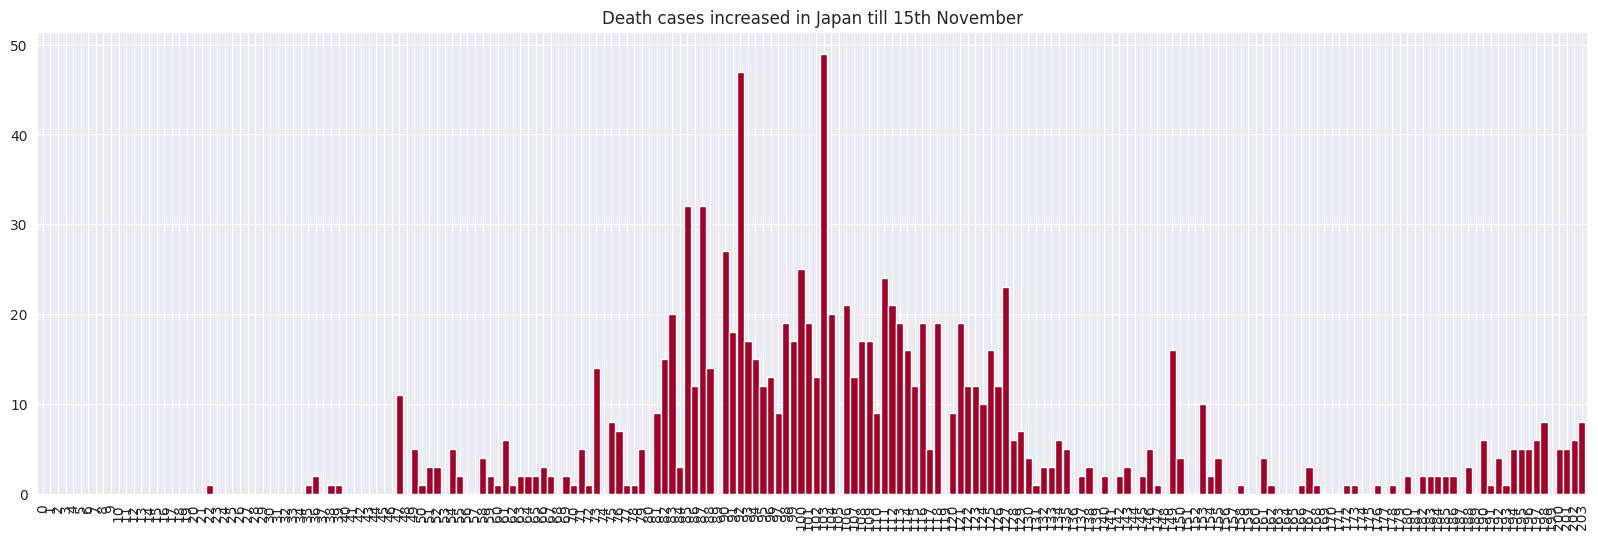

In [119]:
num_plot_japan['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Japan till 15th November')
plt.show()

**But it is really strange that in the recent times the day to day confirmed cases are increasing in an exponential manner but the death toll is flattened in the past 3 months. Which shows the dedications of the doctors and the management of Japan Government to prevent the death toll in this high time of spreading. Which is a great news and achievement for Japan**

### In the last 2-3 months Japan have flattened the curve of the confirmed cases, but unfortunately whenever they are all set to re-open everything at that very moment the confirmed cases are increasing drastically and higher than the previous upswings. Japan has controlled the situation but right now suddnly they are also facing the huge upswings and the steep slopes in the curve, though they have prevent the death tolls in the recent high time.

**********************

## G. Australia - Did they defeat Covid-19 ?

The first confirmed case in Australia was identified on 25 January 2020, in Victoria, when a man who had returned from Wuhan, China, tested positive for the virus. Australian borders were closed to all non-residents on 20 March. Social distancing rules were imposed on 21 March, and state governments started to close 'non-essential' services.The number of new cases initially grew sharply, then levelled out at about 350 per day around 22 March, and started falling at the beginning of April to under 20 cases per day by the end of the month. A second wave of infections emerged in Victoria during May and June, which was attributed to an outbreak at a Melbourne hotel used for quarantining international arrivals. The second wave was much more widespread and deadlier than the first; at its peak, the state had over 7,000 active cases. The wave ended with zero new cases being recorded on 26 October, As of 25 November 2020, Australia has reported 27,854 cases, 25,355 recoveries, and 907 deaths, with Victoria accounting for nearly 75 percent of cases and 90 percent of fatalities.Compared to other Western countries, notably the United States and European countries, Australia's handling has been praised for its effectiveness and fast-forward reactions.

### Per Day statistics for Australia till 15th November, 2020

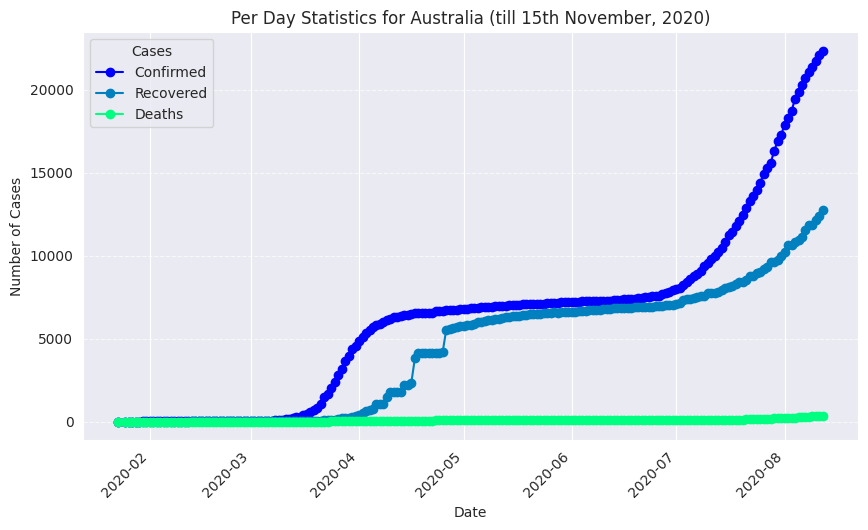

In [120]:
 import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Australia
aus_cases_complete = df[df['Country/Region'] == 'Australia'].copy()

# Ensure 'ObservationDate' is in datetime format before extracting the date
aus_cases_complete['ObservationDate'] = pd.to_datetime(aus_cases_complete['ObservationDate'])
aus_cases_complete['date'] = aus_cases_complete['ObservationDate'].dt.date
aus_cases_complete['date'] = pd.to_datetime(aus_cases_complete['date'])  # Convert to proper datetime format

# Filter data from January 22, 2020, onward
aus_cases_complete = aus_cases_complete[aus_cases_complete['date'] >= pd.Timestamp('2020-01-22')]

# Group data by date and sum confirmed, recovered, and deaths
num_plot = aus_cases_complete.groupby('date')[["Confirmed", "Recovered", "Deaths"]].sum()

# Plot the data
num_plot.plot(figsize=(10, 6), title='Per Day Statistics for Australia (till 15th November, 2020)', colormap='winter', marker='o', linestyle='-')

# Improve readability
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend(title="Cases")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


### Cases reported in the recent times in Australia

In [121]:
import pandas as pd

# Reset index if needed
num_plot_aus = num_plot.reset_index()

# Initialize new columns with zeros
num_plot_aus['Death Case Increase'] = 0
num_plot_aus['Confirmed Case Increase'] = 0

# Set the first value to 0
num_plot_aus.loc[0, 'Confirmed Case Increase'] = 0
num_plot_aus.loc[0, 'Death Case Increase'] = 0

# Calculate daily increase safely, preventing negative values
for i in range(1, num_plot_aus.shape[0]):
    num_plot_aus.loc[i, 'Confirmed Case Increase'] = max(0, num_plot_aus.iloc[i, 1] - num_plot_aus.iloc[i - 1, 1])
    num_plot_aus.loc[i, 'Death Case Increase'] = max(0, num_plot_aus.iloc[i, 3] - num_plot_aus.iloc[i - 1, 3])

# Display last few rows
num_plot_aus.tail()


date  Confirmed  Recovered  Deaths  Death Case Increase  \
197 2020-08-08    21084.0    11874.0   295.0                   17   
198 2020-08-09    21397.0    11876.0   313.0                   18   
199 2020-08-10    21713.0    12144.0   331.0                   18   
200 2020-08-11    22127.0    12395.0   352.0                   21   
201 2020-08-12    22358.0    12779.0   361.0                    9   

     Confirmed Case Increase  
197                      386  
198                      313  
199                      316  
200                      414  
201                      231

### Total no. of confirmed cases in Australia till 15th November, 2020

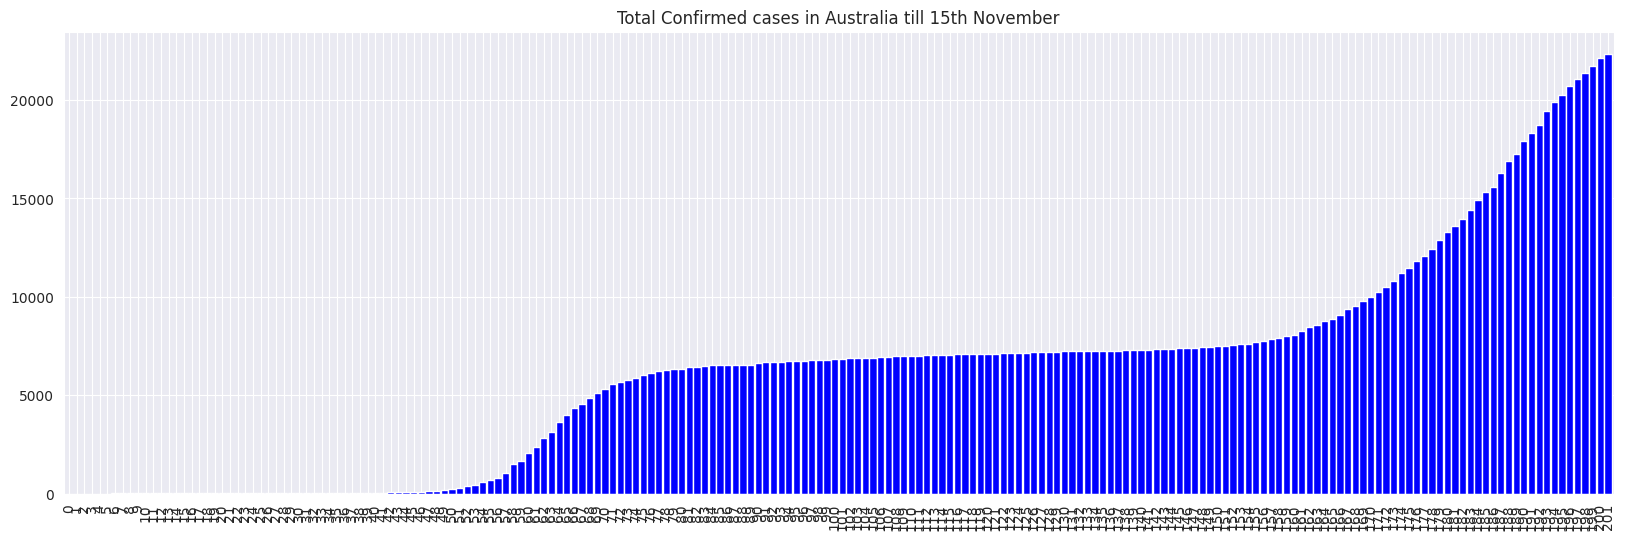

In [122]:
num_plot_aus['Confirmed'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Total Confirmed cases in Australia till 15th November')
plt.show()

**As we can see that the flattened curve is upswinging nowadays, which may cause some serious issues for the country in the recent times. The upswinging curve of total confirmed cases show that the no. of confirmed cases are increased in the recent times and it's happening suddenly like Japan is facing**

### Total no. of Recovered cases in Australia till 15th November, 2020

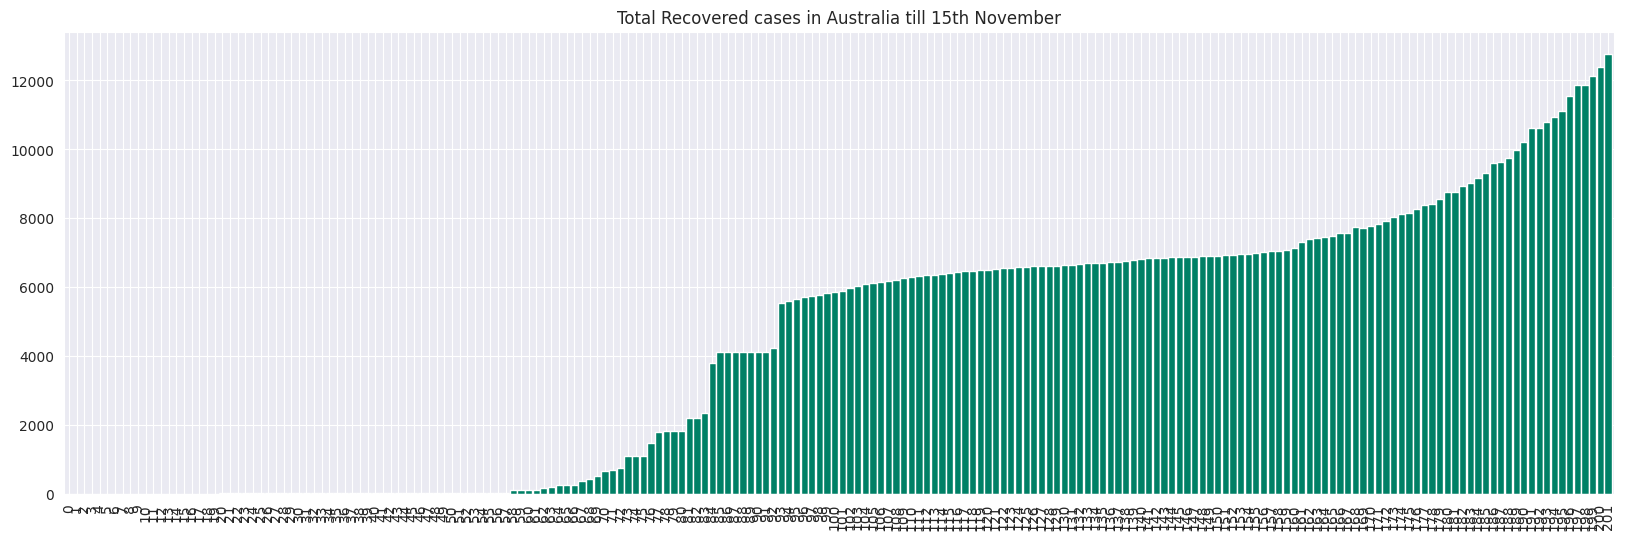

In [123]:
num_plot_aus['Recovered'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='summer',title='Total Recovered cases in Australia till 15th November')
plt.show()

**As we can observe that the curve of the confirmed cases are increasing day by day and beside that the recovered cases are also increasing which shows a pretty positive sign for the country**

### Total no. of Death Cases in Australia till 15th November, 2020

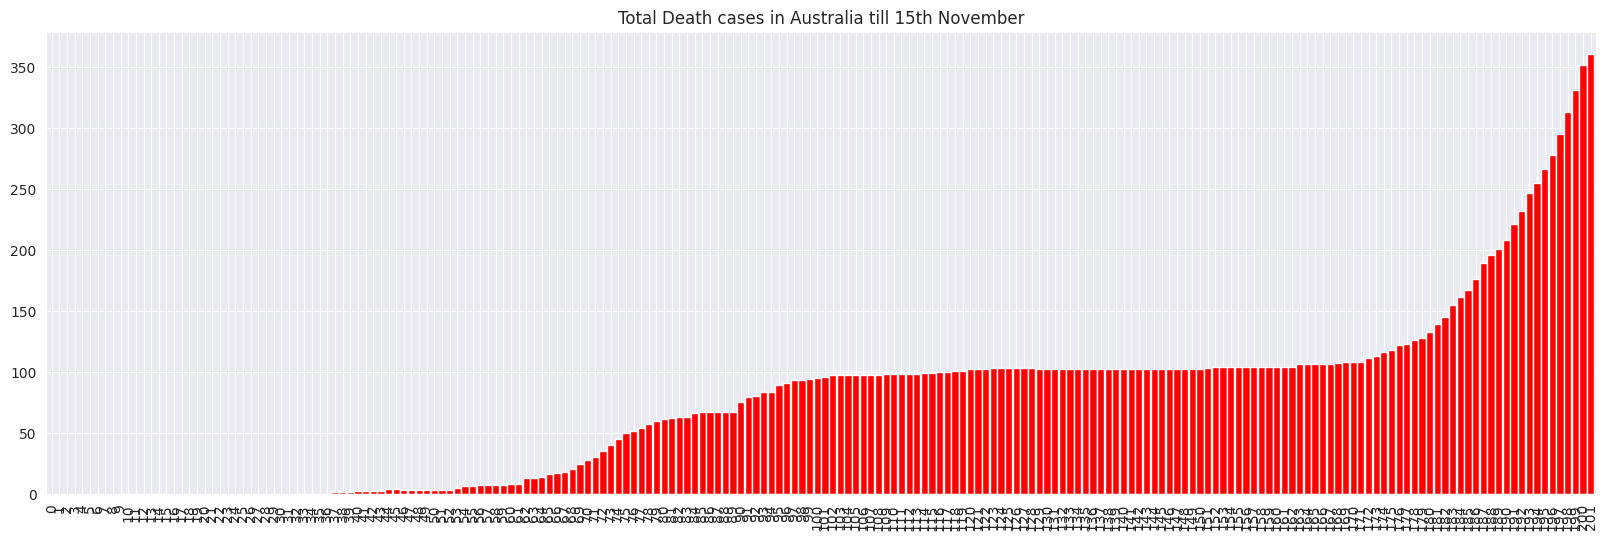

In [124]:
num_plot_aus['Deaths'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='autumn',title='Total Death cases in Australia till 15th November')
plt.show()

**The Death toll is also increasing with the increment of the total confirmed cases. Which may cost the country after a certain relaxation period of flattened curve**

### Confirmed cases increased in Australia till 15th November, 2020

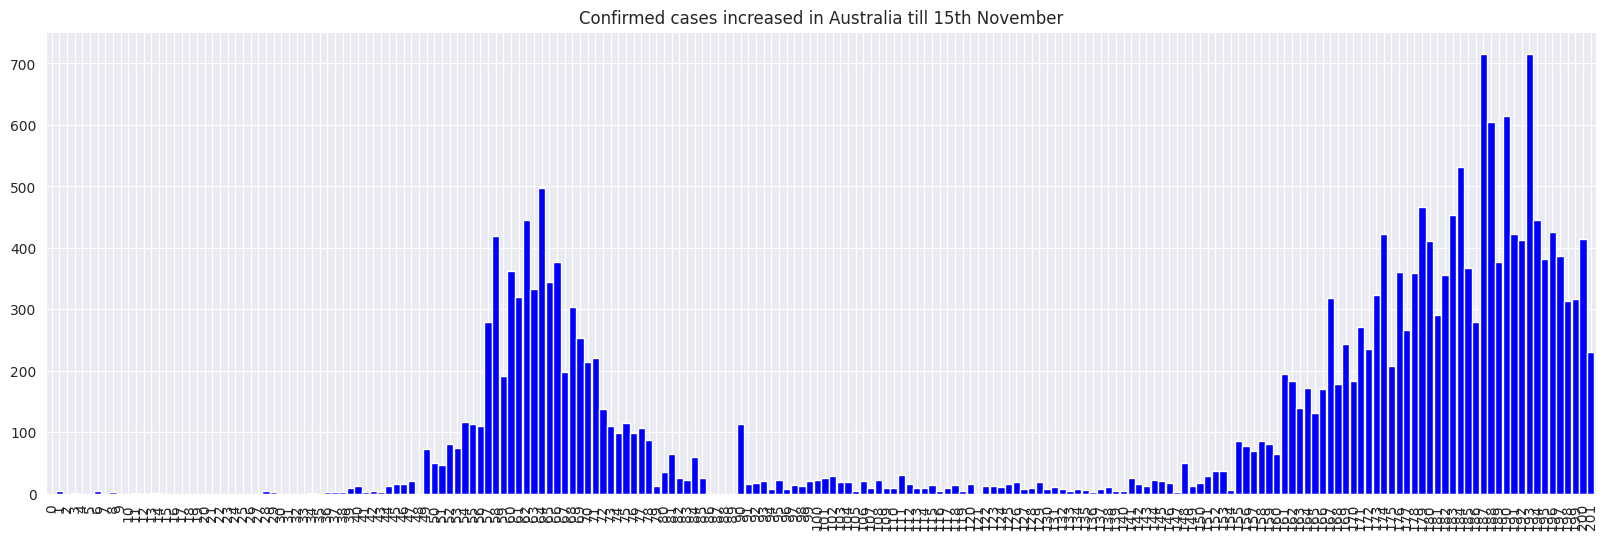

In [125]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Confirmed cases increased in Australia till 15th November')
plt.show()

**As the confirmed cases are increasing day by day in a huge manner it is very difficult to show composure for the Government of Australia. The confirmed cases were came down to 50 in the past 2-3 months after the drastic situation. But unfortuanately it's growing higher than the previous manhattans and showing a peak of 700 per day. But the good thing is that, in the recent times the confirmed cases per day are come down to 400 mark, which shows a good sign for Australia**

### Death cases increased in Australia till 15th November, 2020

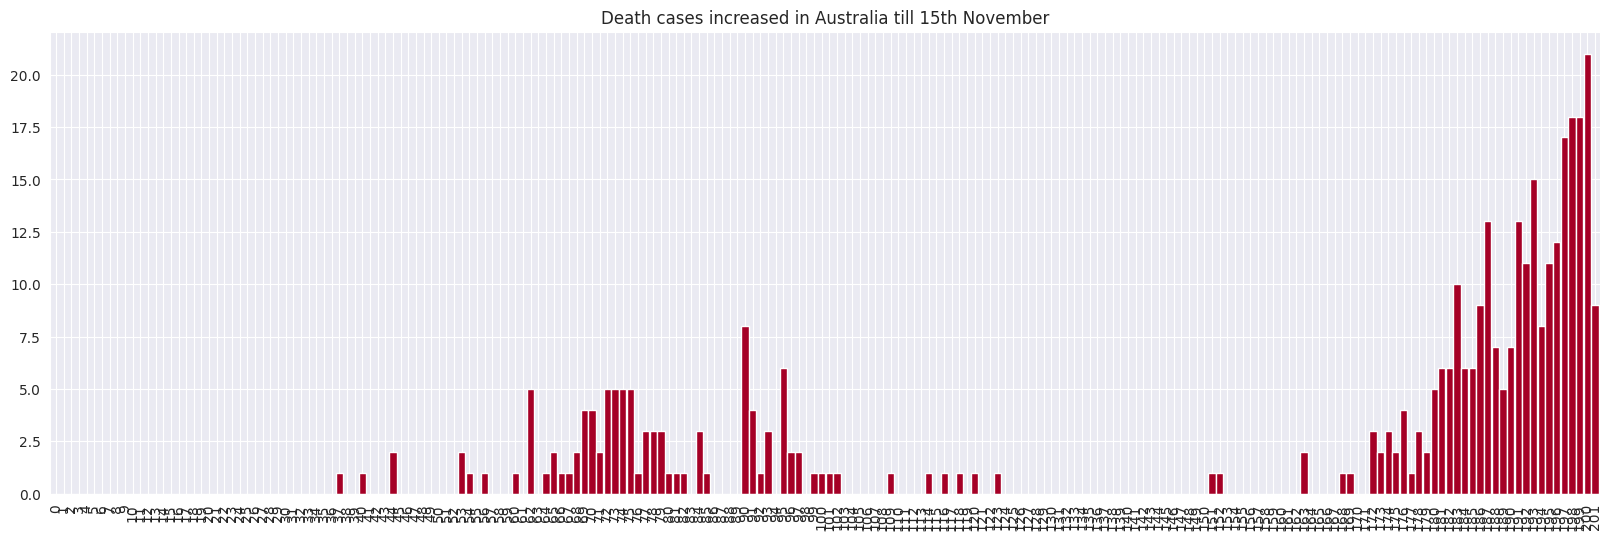

In [126]:
num_plot_aus['Death Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='RdYlBu',title='Death cases increased in Australia till 15th November')
plt.show()

**In the recent times the death toll is increasing in the day to day basis in a huge quantity, which may cost the Government of Australia in this pandemic situation. The death toll is increasing day by day very much in Australia. The highest death toll is shown in the day of 11th August, 2020 where the death toll rises to 21, the highest in the whole pandemic  situation**

### Australia had prevented the spreading of the virus but recently the country has shown the unconditional increase in the confirmed and death cases day to day

****************************
************************

# Chapter 4 :  LOCKDOWN - The Saviour or not ?

On March 24, Mr. Modi said: “I fold my hands to say — please stay where you are,” adding that “all leading experts say 21 days is the minimum we require to break the coronavirus transmission cycle. If we are not able to handle these 21 days, the country and your family will go back 21years and many families will be destroyed. I am saying this not as the Prime Minister but as your family member.” The night of his address, India recorded 536 cases — a six-fold jump in less than two weeks; there were 10 deaths. Government and health officials feel that a complete lockdown and cessation of travel will keep those who are infected isolated and restrict infections to contained clusters. This would avoid community transmission when it becomes impossible to trace the source of infections and quarantining is of no use

The four months of lockdown delayed the peaking of cases, which significantly benefited us in the following ways
Improved health infrastructure
The lockdown gave the governments, both central and states, time to ramp up health infrastructure.
Innovations in treatment
Since the development of specific anti-viral medicine for COVID-19 will take possibly years, the lockdown allowed doctors to come up with quick innovations in treatments by repurposing existing medicines for other diseases that have shown effectiveness against COVID-19.
Lowering the mortality rate
India has about 1.75 million total cases of COVID-19 currently. Imagine this happening in April, instead of July, when there was a shortage of beds, ventilators, basic PPE kits and absence of any treatment.

Lockdown delayed the peaking of cases allowing breathing time for other innovations also like no-touch treatment, using technology (mobile, video telephony, robots etc) to provide critically needed but scarce healthcare workers safe environment to treat patients.


#### RED LINE shows the date of IMPOSING LOCKDOWN

#### GREEN LINE shows the date of REVOKING LOCKDOWN

## A. China's Lockdown Period - SUCCESSFUL

**China impossed lockdown on 23rd January, 2020**

**China revoked lockdown on 8th April, 2020**

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# Check the first few rows of your dataset to confirm the structure
print(df.head())  # Verify the column names and data

# Filter the data for China
china_cases_complete = df[df['Country/Region'] == 'China']

# Check if any data was found for China
if china_cases_complete.empty:
    print("No data available for China.")
else:
    print(f"Data available for China: {china_cases_complete.shape[0]} rows")

    # Convert 'ObservationDate' to datetime (if not already in datetime format)
    china_cases_complete['ObservationDate'] = pd.to_datetime(china_cases_complete['ObservationDate'], errors='coerce')

    # Check if there are any issues with date conversion
    if china_cases_complete['ObservationDate'].isnull().sum() > 0:
        print(f"Some 'ObservationDate' values could not be converted to datetime: {china_cases_complete['ObservationDate'].isnull().sum()} rows")

    # Extract the date portion from the datetime
    china_cases_complete['date'] = china_cases_complete['ObservationDate'].dt.date

    # Filter the data from 21st January 2020 onward
    china_cases_complete = china_cases_complete[china_cases_complete['date'] > pd.Timestamp(date(2020, 1, 21))]

    # Check if data remains after filtering by date
    if china_cases_complete.empty:
        print("No data available after filtering for dates after January 21, 2020.")
    else:
        # Group by date and sum up the 'Confirmed' cases
        num_plot_china = china_cases_complete.groupby('date')["Confirmed"].sum()

        # Calculate the daily increase in confirmed cases (case increase)
        num_plot_china = num_plot_china.diff().fillna(0)

        # Check if num_plot_china has data
        if num_plot_china.empty:
            print("No data to plot after calculating the daily increase.")
        else:
            # Plot the confirmed case increase with vertical lines indicating the lockdown period
            num_plot_china.plot(
                kind='bar',
                width=0.95,
                figsize=(20, 6),
                title='Lockdown Period in China',
                colormap='rainbow'
            )

            # Add vertical lines to mark the lockdown periods (use actual date positions for lockdown)
            lockdown_start_date = pd.Timestamp('2020-01-23')  # Lockdown Start
            lockdown_end_date = pd.Timestamp('2020-04-08')    # Lockdown End

            # Convert date indices to integer indices
            lockdown_start_index = num_plot_china.index.get_loc(lockdown_start_date)
            lockdown_end_index = num_plot_china.index.get_loc(lockdown_end_date)

            # Add the vertical lines to mark the lockdown start and end dates
            plt.axvline(x=lockdown_start_index, color='r', linestyle='--', label='Lockdown Start (Red)')
            plt.axvline(x=lockdown_end_index, color='g', linestyle='--', label='Lockdown End (Green)')

            # Add labels and legend
            plt.xlabel('Days')
            plt.ylabel('Confirmed Case Increase')
            plt.legend(loc='upper left')

            # Show the plot
            plt.show()




   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
No data available for China.


**China's Lockdown : China imposed lockdown of all total 76 days and as a result the confirmed cases incrementation is nullified and turned out at a negligible rate. So definitely we can say that China imposed the lockdown in a correct manner as a result they had prevented the coronavirus spread**



-----------

   SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0  
Data available for Mainland China: 6322 rows


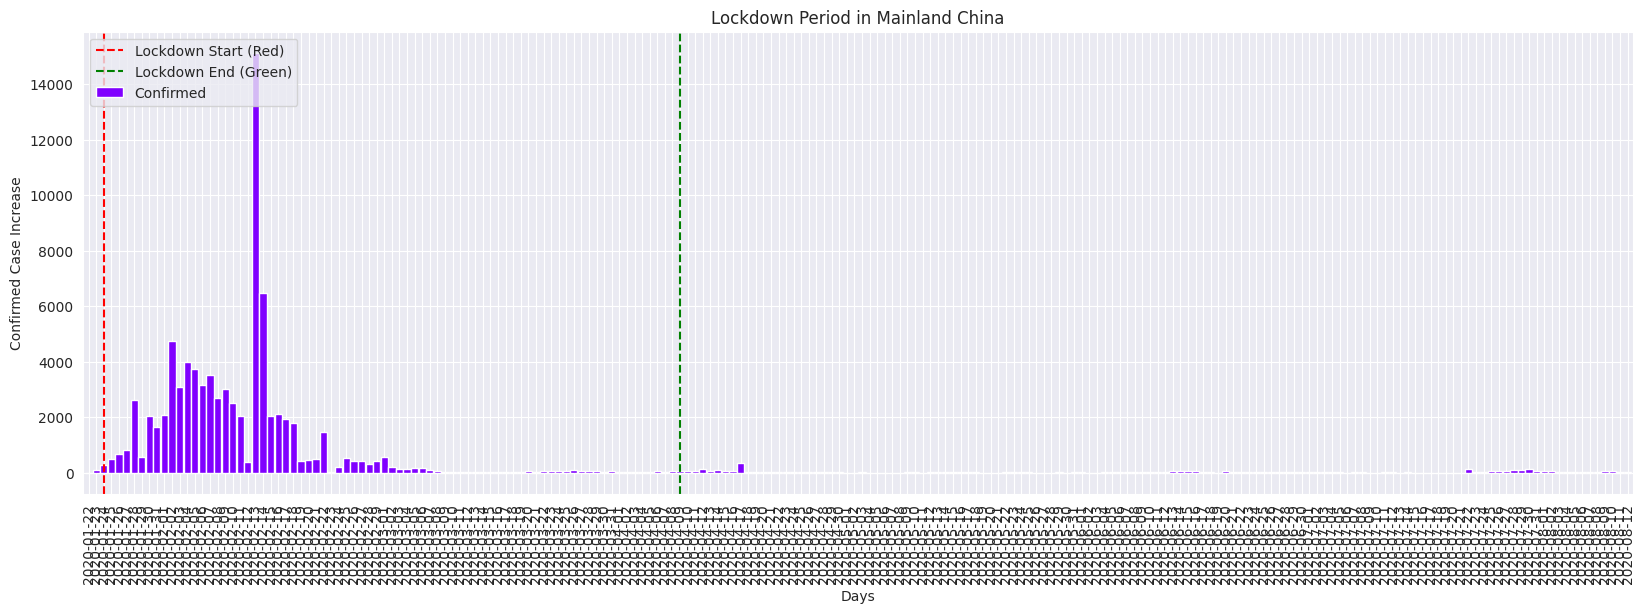

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# Check the first few rows of your dataset to confirm the structure
print(df.head())  # Verify the column names and data

# Filter the data for Mainland China (corrected the name)
china_cases_complete = df[df['Country/Region'] == 'Mainland China']

# Check if any data was found for Mainland China
if china_cases_complete.empty:
    print("No data available for Mainland China.")
else:
    print(f"Data available for Mainland China: {china_cases_complete.shape[0]} rows")

    # Convert 'ObservationDate' to datetime (adjusting for date format)
    china_cases_complete['ObservationDate'] = pd.to_datetime(china_cases_complete['ObservationDate'], format='%m/%d/%Y', errors='coerce')

    # Check if there are any issues with date conversion
    if china_cases_complete['ObservationDate'].isnull().sum() > 0:
        print(f"Some 'ObservationDate' values could not be converted to datetime: {china_cases_complete['ObservationDate'].isnull().sum()} rows")

    # Extract the date portion from the datetime
    china_cases_complete['date'] = china_cases_complete['ObservationDate'].dt.date

    # Filter the data from 21st January 2020 onward (compare both sides as Timestamps)
    china_cases_complete = china_cases_complete[china_cases_complete['ObservationDate'] > pd.Timestamp('2020-01-21')]

    # Check if data remains after filtering by date
    if china_cases_complete.empty:
        print("No data available after filtering for dates after January 21, 2020.")
    else:
        # Group by date and sum up the 'Confirmed' cases
        num_plot_china = china_cases_complete.groupby('date')["Confirmed"].sum()

        # Calculate the daily increase in confirmed cases (case increase)
        num_plot_china = num_plot_china.diff().fillna(0)

        # Check if num_plot_china has data
        if num_plot_china.empty:
            print("No data to plot after calculating the daily increase.")
        else:
            # Plot the confirmed case increase with vertical lines indicating the lockdown period
            num_plot_china.plot(
                kind='bar',
                width=0.95,
                figsize=(20, 6),
                title='Lockdown Period in Mainland China',
                colormap='rainbow'
            )

            # Add vertical lines to mark the lockdown periods (adjust indices as per your dataset)
            plt.axvline(x=2, color='r', linestyle='--', label='Lockdown Start (Red)')
            plt.axvline(x=78, color='g', linestyle='--', label='Lockdown End (Green)')

            # Add labels and legend
            plt.xlabel('Days')
            plt.ylabel('Confirmed Case Increase')
            plt.legend(loc='upper left')

            # Show the plot
            plt.show()



## B. Italy's lockdown Period - SUCCESSFUL

**Italy imposed lockdown on 9th March, 2020**

**Italy revoked lockdown on 18th May, 2020**

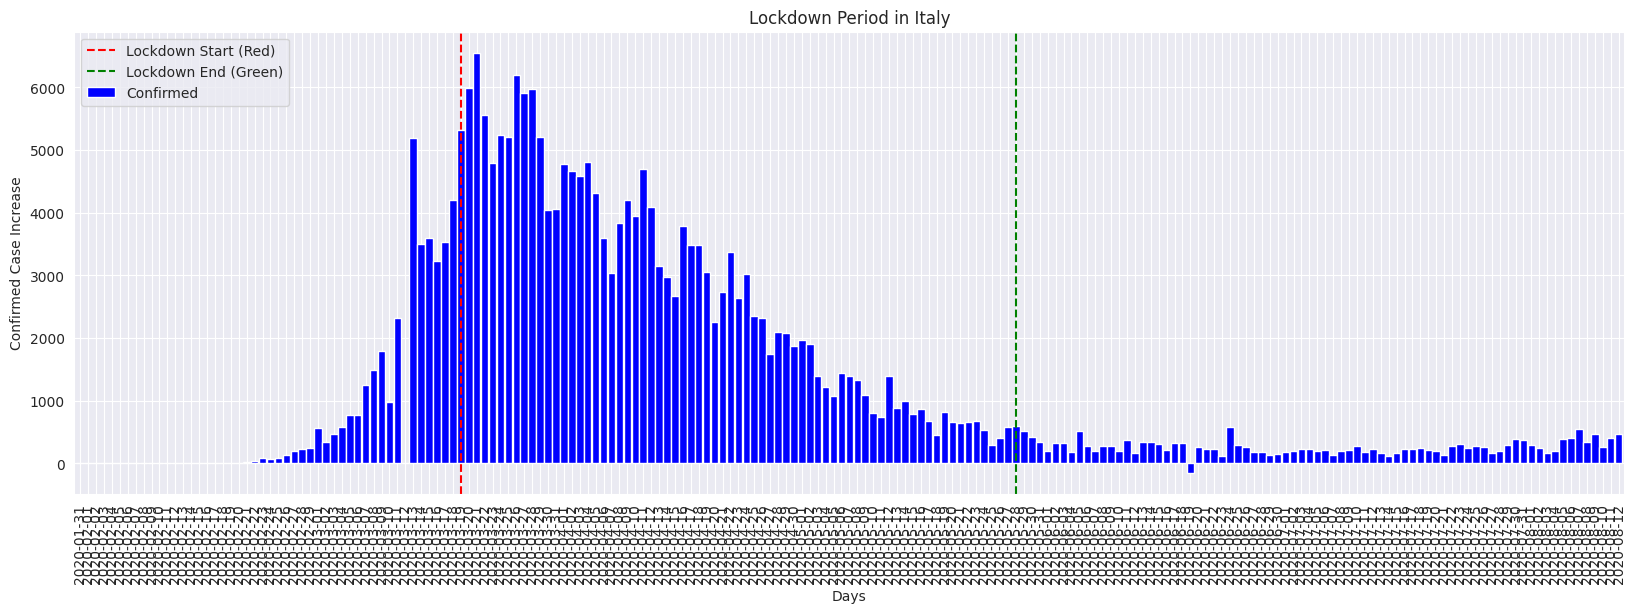

In [143]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the data for Italy
# Filter the data for Italy (adjust the 'Country/Region' column if necessary)
italy_cases_complete = df[df['Country/Region'] == 'Italy']

# Check if any data was found for Italy
if italy_cases_complete.empty:
    print("No data available for Italy.")
else:
    # Convert 'ObservationDate' to datetime (adjusting for date format)
    italy_cases_complete['ObservationDate'] = pd.to_datetime(italy_cases_complete['ObservationDate'], format='%m/%d/%Y', errors='coerce')

    # Check if there are any issues with date conversion
    if italy_cases_complete['ObservationDate'].isnull().sum() > 0:
        print(f"Some 'ObservationDate' values could not be converted to datetime: {italy_cases_complete['ObservationDate'].isnull().sum()} rows")

    # Extract the date portion from the datetime
    italy_cases_complete['date'] = italy_cases_complete['ObservationDate'].dt.date

    # Group by date and sum up the 'Confirmed' cases
    num_plot_italy = italy_cases_complete.groupby('date')["Confirmed"].sum()

    # Calculate the daily increase in confirmed cases (case increase)
    num_plot_italy = num_plot_italy.diff().fillna(0)

    # Now plot the confirmed case increase with vertical lines indicating the lockdown period
    num_plot_italy.plot(
        kind='bar',
        width=0.95,
        figsize=(20, 6),
        title='Lockdown Period in Italy',
        colormap='winter'
    )

    # Add vertical lines to mark the lockdown periods (adjust these indices as per your data)
    plt.axvline(x=48, color='r', linestyle='--', label='Lockdown Start (Red)')
    plt.axvline(x=118, color='g', linestyle='--', label='Lockdown End (Green)')

    # Add labels and legend
    plt.xlabel('Days')
    plt.ylabel('Confirmed Case Increase')
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()


**Italy's Lockdown : Due to rapid increase of corona virus spread in Italy, the government imposed lockdown on 9th March, 2020 and the lockdown elongated to 70 days as a result the increment in the confirmed cases were decreased from 6000 per day to 500 per day (approx.). Which signifies that Italy has prevented the spread out of the virus by imposing the lockdown, and we can clearly observe that the LOCKDOWN IS SUCCESSFUL FOR ITALY!**

------------

## C. United States of America Lockdown Period - UNSUCCESSFUL

**USA imposed lockdown on 19th March, 2020**

**USA revoked lockdown on 13th June, 2020**

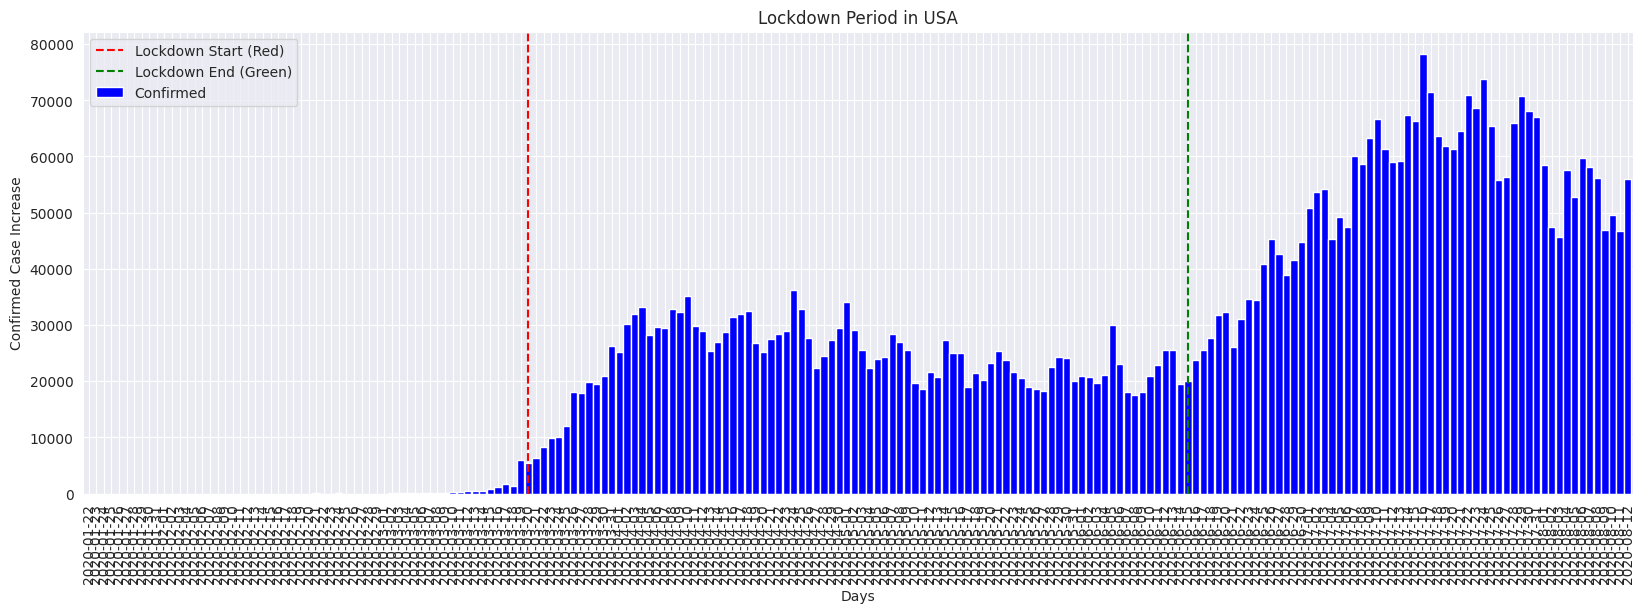

In [145]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already filtered the dataset for the USA (adjust column names as needed)
# Filter the data for the USA
us_cases_complete = df[df['Country/Region'] == 'US']

# Check if any data was found for the USA
if us_cases_complete.empty:
    print("No data available for the USA.")
else:
    # Convert 'ObservationDate' to datetime (adjusting for date format)
    us_cases_complete['ObservationDate'] = pd.to_datetime(us_cases_complete['ObservationDate'], format='%m/%d/%Y', errors='coerce')

    # Check if there are any issues with date conversion
    if us_cases_complete['ObservationDate'].isnull().sum() > 0:
        print(f"Some 'ObservationDate' values could not be converted to datetime: {us_cases_complete['ObservationDate'].isnull().sum()} rows")

    # Extract the date portion from the datetime
    us_cases_complete['date'] = us_cases_complete['ObservationDate'].dt.date

    # Group by date and sum up the 'Confirmed' cases
    num_plot_us = us_cases_complete.groupby('date')["Confirmed"].sum()

    # Calculate the daily increase in confirmed cases (case increase)
    num_plot_us = num_plot_us.diff().fillna(0)

    # Plot the confirmed case increase with vertical lines indicating the lockdown period
    num_plot_us.plot(
        kind='bar',
        width=0.95,
        figsize=(20, 6),
        title='Lockdown Period in USA',
        colormap='winter'
    )

    # Add vertical lines to mark the lockdown periods (adjust these indices as per your data)
    plt.axvline(x=58, color='r', linestyle='--', label='Lockdown Start (Red)')
    plt.axvline(x=145, color='g', linestyle='--', label='Lockdown End (Green)')

    # Add labels and legend
    plt.xlabel('Days')
    plt.ylabel('Confirmed Case Increase')
    plt.legend(loc='upper left')

    # Show the plot
    plt.show()


**USA's Lockdown : United States of America imposed lockdown on 19th March, 2020 when they were at the initial stage and the cases were 10000. After the lockdown implementation the cases were raised to 40000 daily and it was continued 87 days but the daily cases were not increased beyond 40000. At this moment Donald Trump decided to open USA and re-open the economy as they faced a decrement of 4.5% GDP, and this will cost the country hugely if the economy is not opened yet. As the lockdown revoked on 13th June, 2020, the cases are drastically increasing and creating a new record every day. As we can see that after the revokation of lockdown the condition became worser for USA. They have seen 80000 cases daily, and the tally is still increasing. Unfortunately, for USA the lockdown period is successful to some extent and to prevent the daily exponential increment but on the same side, it did not make the curve downward or even flattened. The lockdown in case of USA IS UNSUCCESSFUL!**

-------------

## D. Germany Lockdown Period - SUCCESSFUL

#### Germany imposed lockdown on 23rd March, 2020

#### Germany revoked lockdown on 10th May, 2020

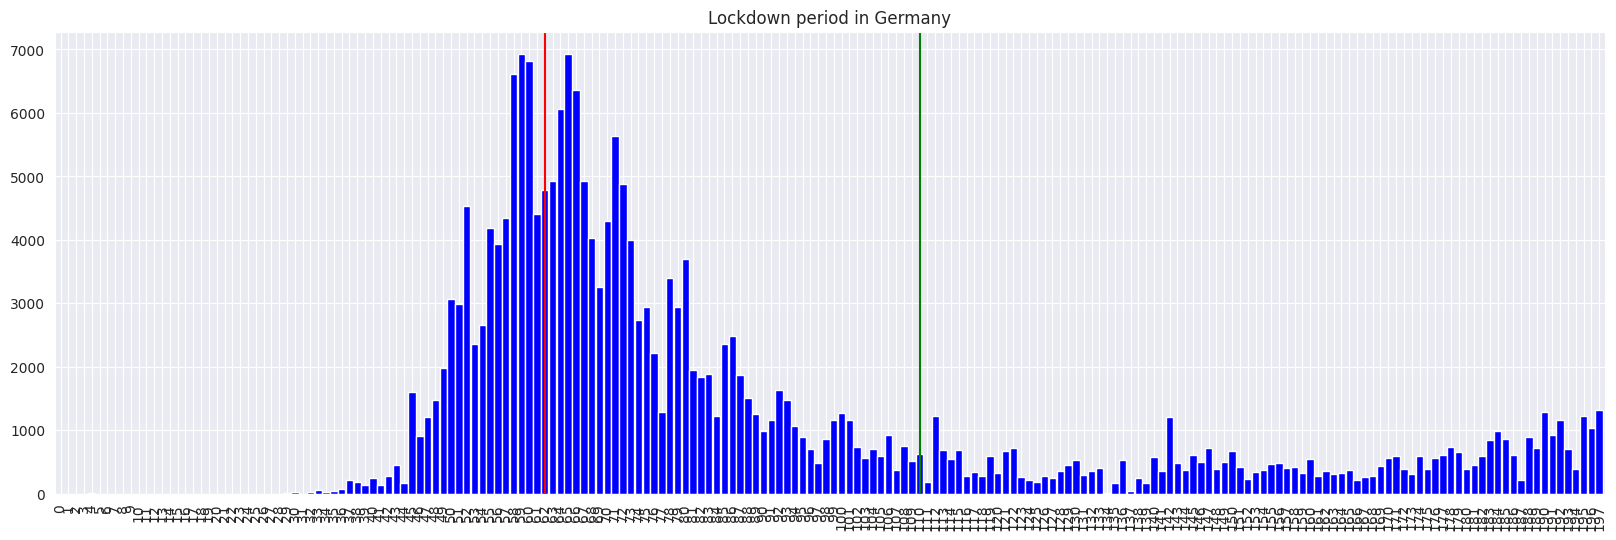

In [146]:
num_plot_germany['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period in Germany')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 110, color= 'g')
plt.show()

**Germany Lockdown : The government of Germany imposed lockdown from 23rd March, 2020 when the country is facing high rise in the per day confirmed case rate. They faced merely 7000 cases per day at the time of lockdown. After the lockdown was imposed, the daily new confirmed cases are slowly decreased within  a month to 2000 cases per day. Which shows that the lockdown action is successful for the country and the health sectors. At this on 10th May, 2020 they have revoked lockdown to re-open the country and economy. Still the cases are coming on a day to day basis but they are in a certain numbers around 1000. And also the death rate is also come down to 20 odd numbers. Which shows GERMANY SUCCESSFULLY IMPOSED LOCKDOWN AND PREVENTED THE BREAK THROUGH OF THE VIRUS**

---------------

## E. AUSTRALIA Lockdown - SUCCESSFUL to some extent

#### Australia imposed national lockdown on 23rd March, 2020

#### Australia eased the lockdown on 8th July, 2020

#### Australia again imposed the lockdown on 7th August, 2020 due to increment in the daily cases

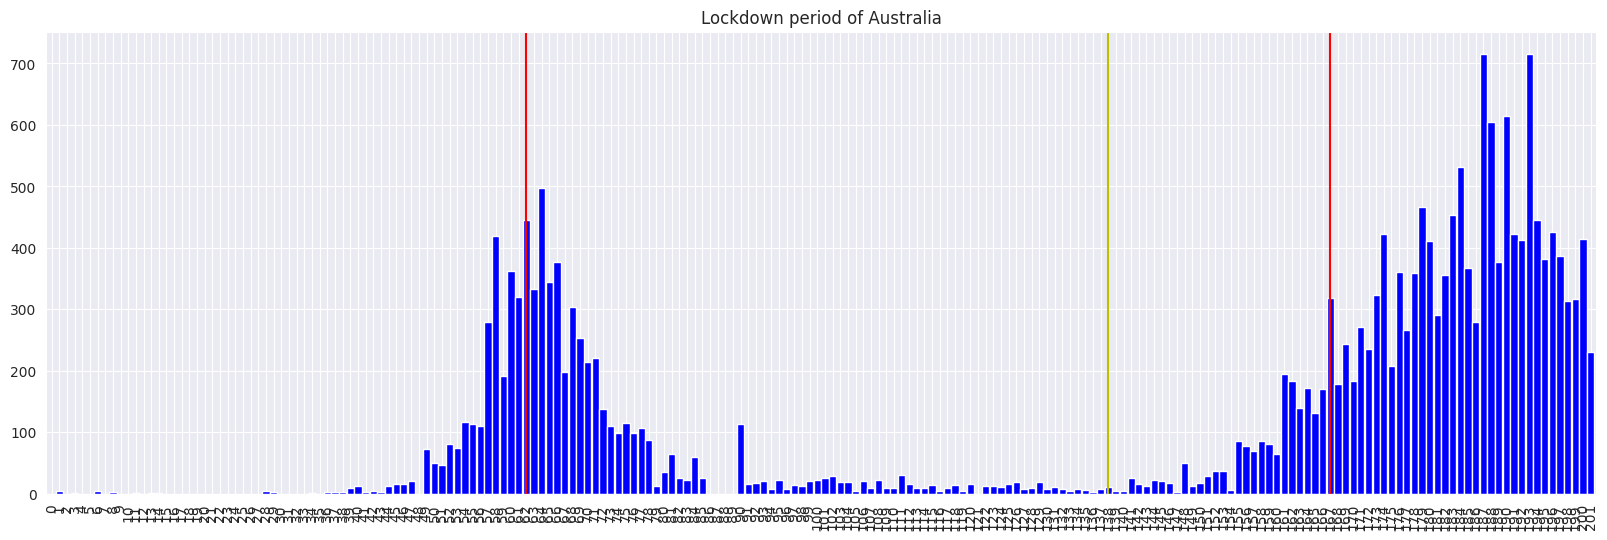

In [147]:
num_plot_aus['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Australia')
plt.axvline (x = 62, color = 'r')
plt.axvline (x = 138, color = 'y')
plt.axvline (x=167, color = 'r')
plt.axvline (x=227, color = 'g')
plt.show()

**Australia Lockdown : The government imposed lockdown on 23rd March, when the country was facing the high rise in the daily confirmed cases. After imposing the lockdown properly, the country stabilized the situation and the controlled the daily cases down to 100. At that moment the government declared that some areas will be eased from the lockdown and as a result they again saw the increment in the daily confirmed cases rapidly. At this the government imposed lockdown on 7th August, 2020 to prevent the cases. This time the cases were doubled up than the previous high rises. We can say that, AUSTRALIA SUCCESSFULLY CONTROLLED THE SPREAD OF THE VIRUS IN THE LOCKDOWN PERIOD, BUT WHENEVER THEY OPENED UP, IT BECAME WORSER FOR THEM**

---------------

## F. JAPAN Lockdown Period - SUCCESSFUL to some extent

#### Japan imposed lockdown on 7th April, 2020

#### Japan revoked lockdown on 31st May, 2020

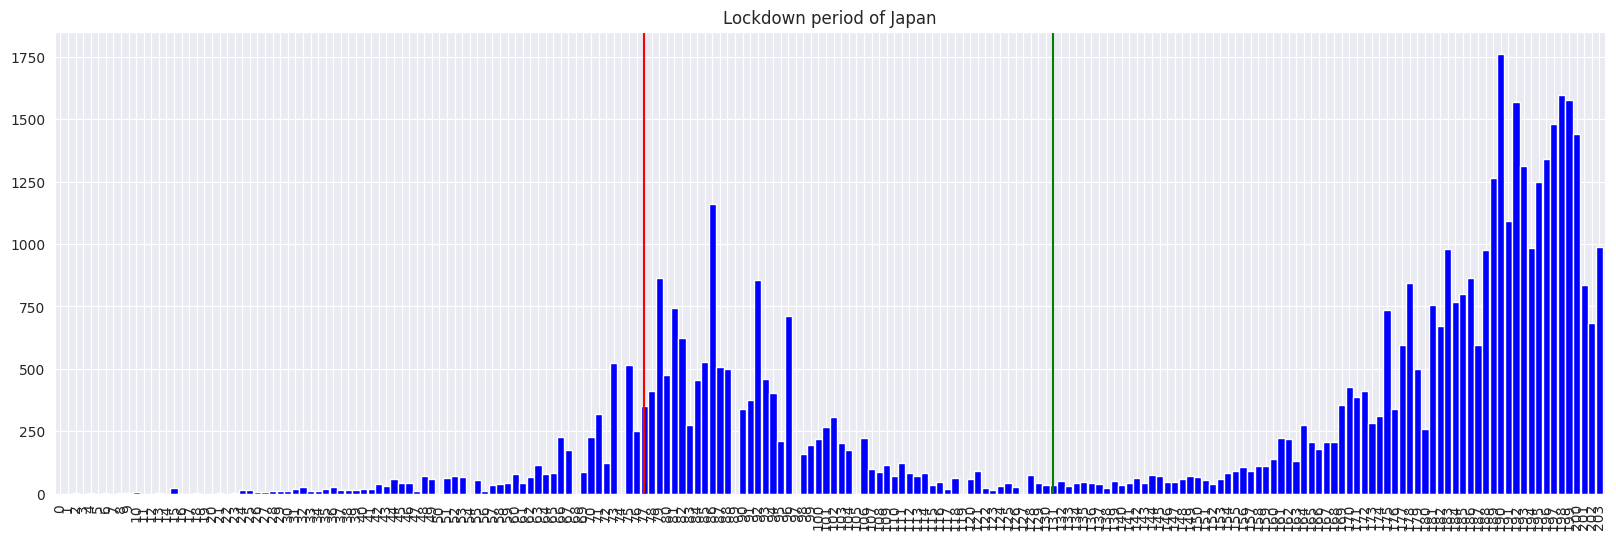

In [148]:
num_plot_japan['Confirmed Case Increase'].plot(kind='bar',width=0.95,figsize=(20,6),colormap='winter',title='Lockdown period of Japan')
plt.axvline (x = 77, color = 'r')
plt.axvline (x = 131, color = 'g')
plt.show()

**Japan Lockdown : On the situation of increasing confirmed cases the Japan government imposed lockdown on 7th April, and they successfully controlled the cases. But the worser days were yet to come for Japan. As the lockdown was revoked the cases were slowly increasing and in a few days the cases were increasing exponentially. The daily confirmed cases are raised to 1500. And the tally is still growing. But Japan was not imposing lockdown, rather they had started rigorous testing to prevent the virus. we can say that, JAPAN IS SUCCESSFUL IN THE EARLY LOCKDOWN PERIOD AND RIGHT NOW THEY HAVE INCREASED THE TESTING TO PREVENT THE VIRUS**  

*****************************


*************************

## BANGLADESH COVID 19 TOTAL RESULT

In [149]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')


# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Check if the file exists
if os.path.exists(file_path):
    print("File found! Loading data...\n")

    # Load the dataset
    df = pd.read_csv(file_path)

    # Display the first few rows of the dataset
    print("Dataset Preview:")
    print(df.head())

    # Display basic information about the dataset
    print("\nDataset Information:")
    print(df.info())

    # Display summary statistics
    print("\nSummary Statistics:")
    print(df.describe())

else:
    print("File not found! Please check the file path and try again.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File found! Loading data...

Dataset Preview:
             Date  Confirmed/Day  TotalConfirmed  Deaths/Day  DeathsTotal  \
0   March 8, 2020              3               3           0            0   
1   March 9, 2020              0               3           0            0   
2  March 10, 2020              0               3           0            0   
3  March 11, 2020              0               3           0            0   
4  March 12, 2020              0               3           0            0   

   Recovery/Day  TotalRecovered  Tests/Day  TotalTests  
0             0               0          9         120  
1             0               0          7         127  
2             0               0         10         137  
3             2               2         10         147  
4             0               2         16         163  

Dataset Information

BANGLADESH COVID 19 RESULT SHOW HERE

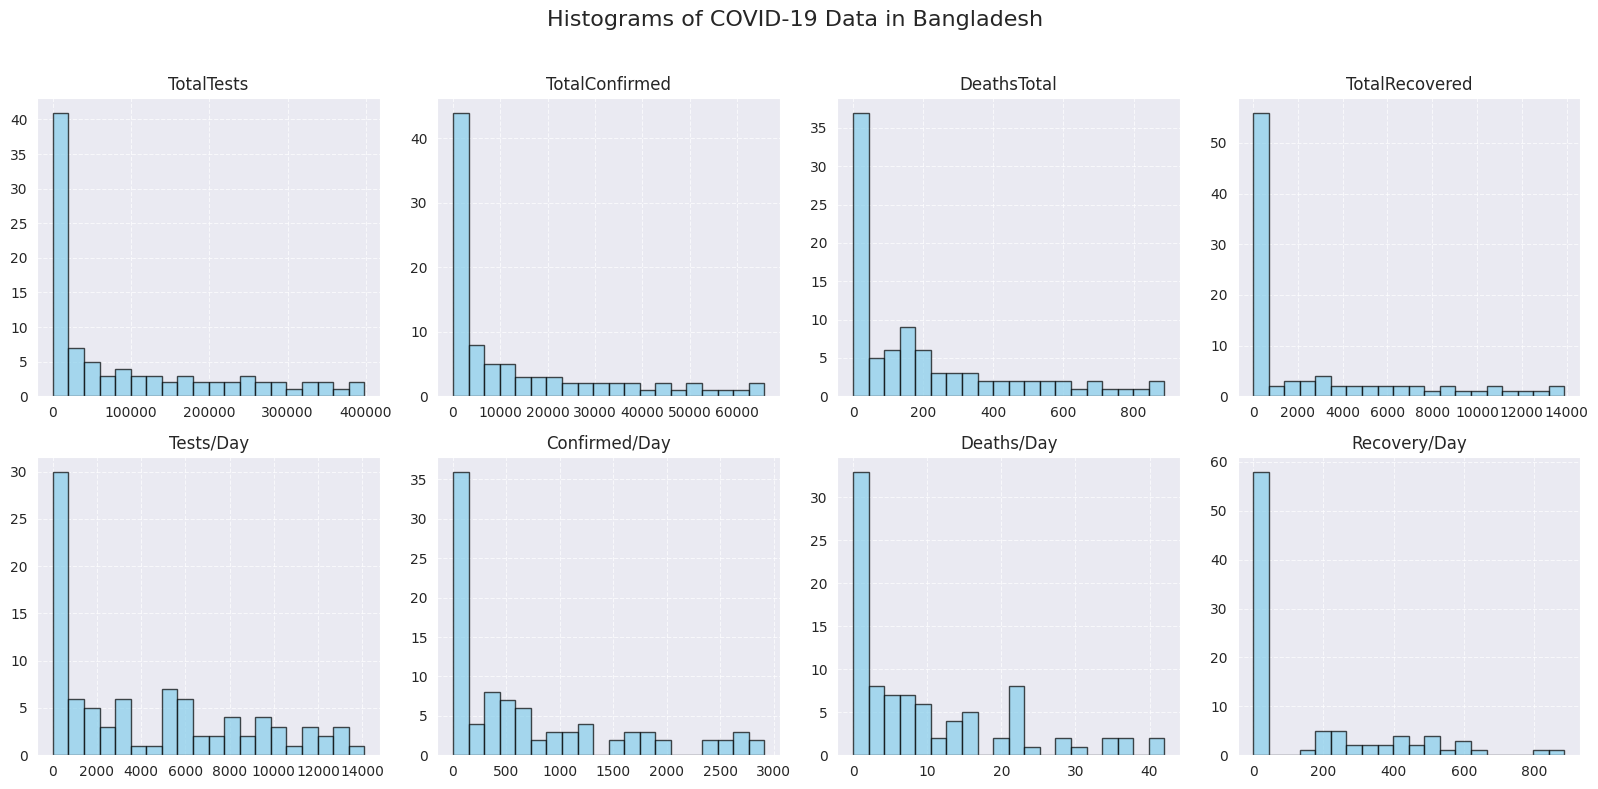

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Selecting numerical columns
num_columns = ["TotalTests", "TotalConfirmed", "DeathsTotal", "TotalRecovered",
               "Tests/Day", "Confirmed/Day", "Deaths/Day", "Recovery/Day"]

# Create subplots (adjust layout dynamically)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.suptitle("Histograms of COVID-19 Data in Bangladesh", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through numerical columns and create histograms
for i, col in enumerate(num_columns):
    axes[i].hist(df[col], bins=20, edgecolor="black", alpha=0.7, color="skyblue")
    axes[i].set_title(col, fontsize=12)
    axes[i].grid(True, linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()



THIS RESULT WE MADE A PIE CHART IN PERCENT

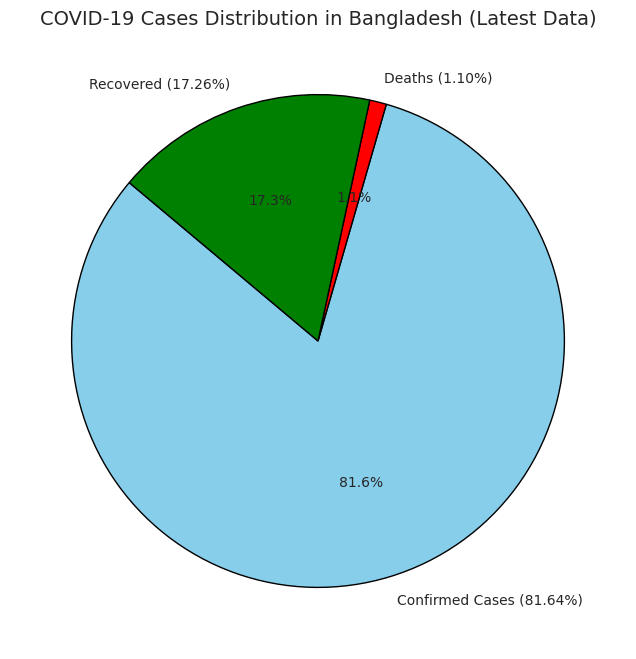

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Get the latest data (last row)
latest_data = df.iloc[-1]

# Extract relevant values
total_cases = latest_data["TotalConfirmed"]
total_deaths = latest_data["DeathsTotal"]
total_recovered = latest_data["TotalRecovered"]

# Data for pie chart
labels = ["Confirmed Cases", "Deaths", "Recovered"]
values = [total_cases, total_deaths, total_recovered]

# Calculate percentages
percentages = [f"{(v / sum(values)) * 100:.2f}%" for v in values]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=[f"{l} ({p})" for l, p in zip(labels, percentages)], autopct='%1.1f%%',
        colors=["skyblue", "red", "green"], startangle=140, wedgeprops={"edgecolor": "black"})

# Set title
plt.title("COVID-19 Cases Distribution in Bangladesh (Latest Data)", fontsize=14)

# Show plot
plt.show()



# Total Tests, Total Confirmed Cases, Total Deaths, and Total Recovered

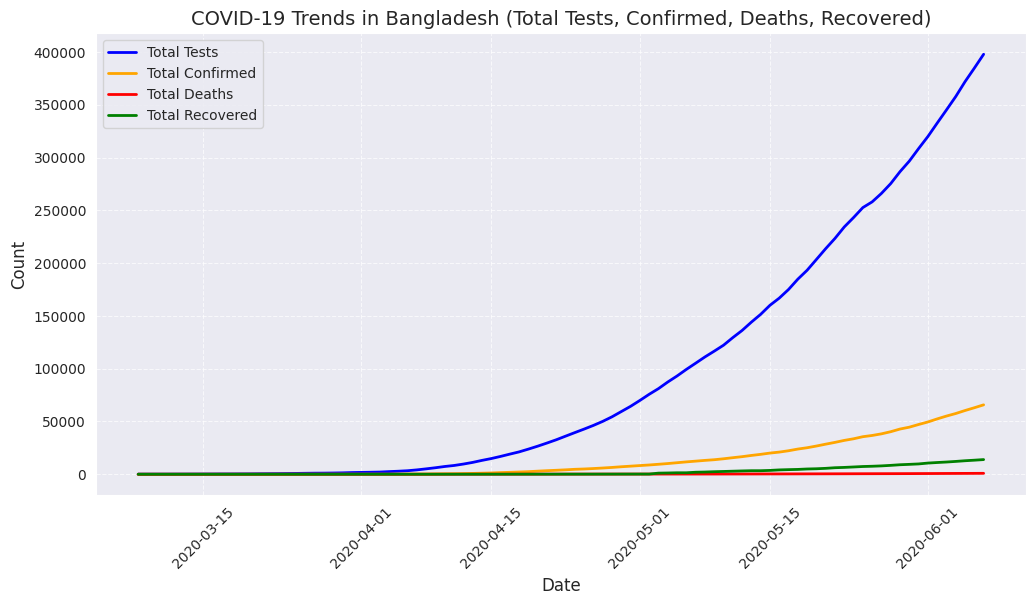

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["TotalTests"], label="Total Tests", color="blue", linewidth=2)
plt.plot(df["Date"], df["TotalConfirmed"], label="Total Confirmed", color="orange", linewidth=2)
plt.plot(df["Date"], df["DeathsTotal"], label="Total Deaths", color="red", linewidth=2)
plt.plot(df["Date"], df["TotalRecovered"], label="Total Recovered", color="green", linewidth=2)

# Formatting the chart
plt.xlabel("Date", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("COVID-19 Trends in Bangladesh (Total Tests, Confirmed, Deaths, Recovered)", fontsize=14)
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


# Bangladesh Covid19 Total ConFirmed(Actual Vs Predicted Used {LSTM Model})

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0560
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0368
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0219 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0117
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0081
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0098
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0093
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0054
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0030
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0024
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0023
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0017
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.5603e-04
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 1.8303e-04
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 6.5407e-04
Epoch 16/20
2/2 ━━━━━

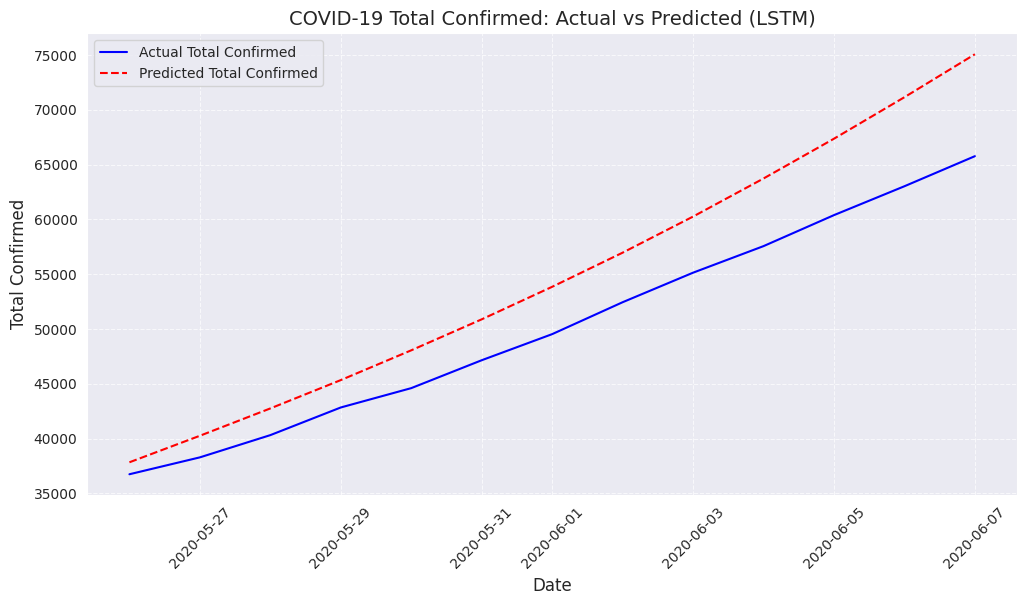

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Select the relevant column for prediction (example: TotalConfirmed)
df = df[['Date', 'TotalConfirmed']]

# Set 'Date' as index
df.set_index('Date', inplace=True)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Prepare data for LSTM model (Creating a dataset with time-step of 30)
time_step = 30
X_data, y_data = [], []

for i in range(time_step, len(scaled_data)):
    X_data.append(scaled_data[i-time_step:i, 0])  # Previous 30 days data
    y_data.append(scaled_data[i, 0])  # Target is the next day's value

# Convert to numpy arrays
X_data, y_data = np.array(X_data), np.array(y_data)

# Reshaping the data for LSTM input (samples, time steps, features)
X_data = np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))

# Split data into training and testing sets
train_size = int(len(X_data) * 0.8)
X_train, X_test = X_data[:train_size], X_data[train_size:]
y_train, y_test = y_data[:train_size], y_data[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Predicting the next value

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predict on the test data
predicted_values = model.predict(X_test)

# Inverse scaling to get the original values
predicted_values = scaler.inverse_transform(predicted_values)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_rescaled):], y_test_rescaled, label="Actual Total Confirmed", color="blue")
plt.plot(df.index[-len(predicted_values):], predicted_values, label="Predicted Total Confirmed", color="red", linestyle="--")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Confirmed", fontsize=12)
plt.title("COVID-19 Total Confirmed: Actual vs Predicted (LSTM)", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


BANGLADESH COVID 19 CORRELATION HEATMAP

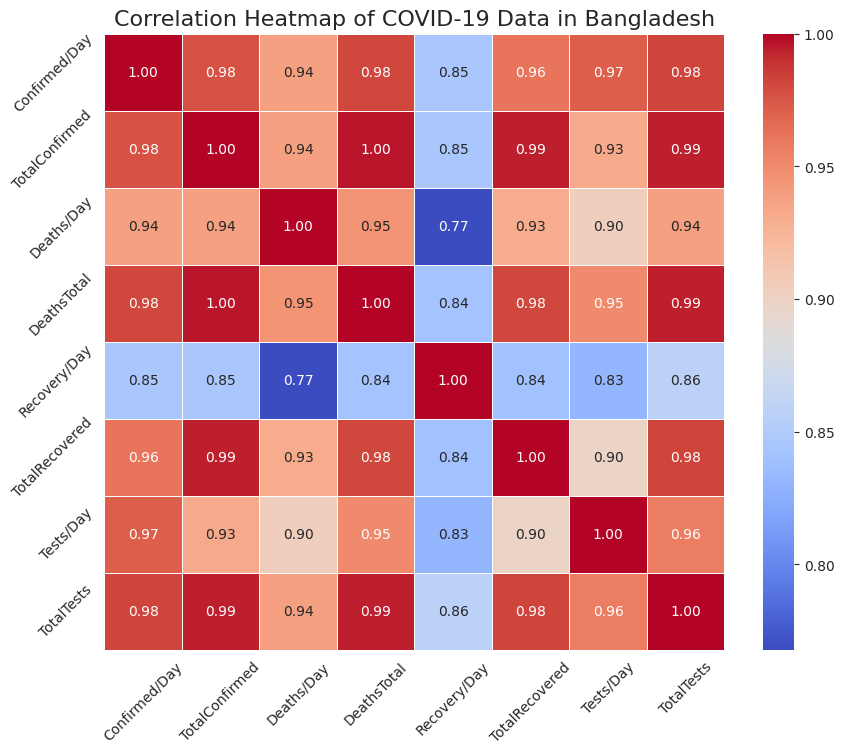

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Selecting numerical columns for correlation
num_columns = ["Confirmed/Day", "TotalConfirmed", "Deaths/Day", "DeathsTotal",
               "Recovery/Day", "TotalRecovered", "Tests/Day", "TotalTests"]

# Calculate the correlation matrix
correlation_matrix = df[num_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Title and formatting
plt.title("Correlation Heatmap of COVID-19 Data in Bangladesh", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show plot
plt.show()


IN BANGLADESH COVID 19  Actual vs Predicted Total Deaths

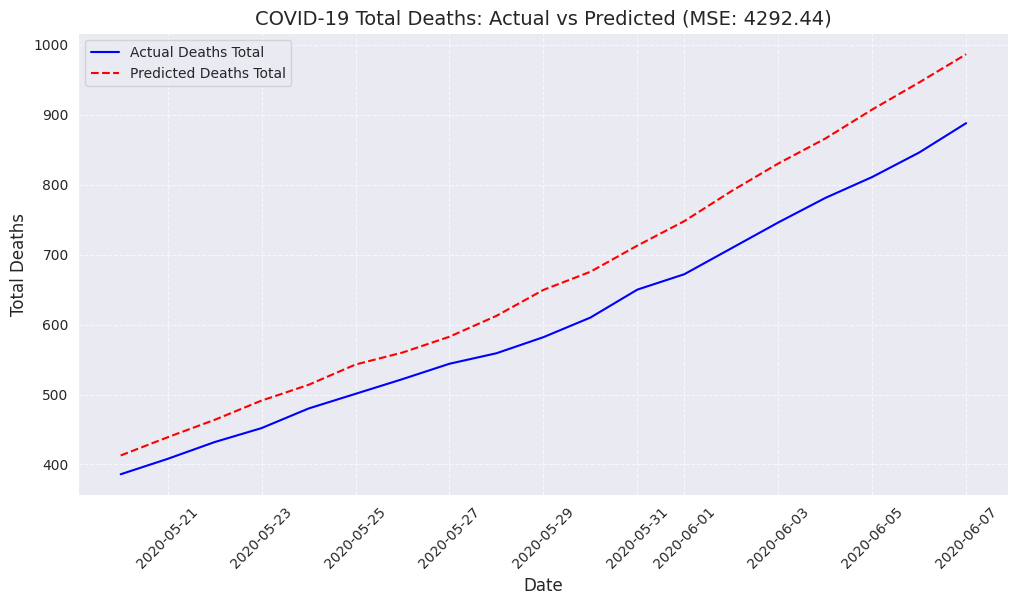

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Test_Confirm_Death_Recovery.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Selecting the relevant columns for time series (TotalConfirmed, DeathsTotal)
df = df[['Date', 'TotalConfirmed', 'DeathsTotal']]

# Setting 'Date' as index
df.set_index('Date', inplace=True)

# Creating the feature and target sets for prediction
X = df[['TotalConfirmed']]  # Feature (independent variable)
y = df['DeathsTotal']  # Target (dependent variable)

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Creating and training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label="Actual Deaths Total", color="blue")
plt.plot(df.index[-len(y_pred):], y_pred, label="Predicted Deaths Total", color="red", linestyle="--")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Deaths", fontsize=12)
plt.title(f"COVID-19 Total Deaths: Actual vs Predicted (MSE: {mse:.2f})", fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.show()


## BANGLADESH AGE AND GENDER ANALYSIS

In [ ]:
import pandas as pd

# Define file path for the new dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Gender_Age_Analysis.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Show dataset preview
print("Dataset Loaded Successfully!")
print("\nDataset Preview:")
print(df.head())

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Dataset Loaded Successfully!

Dataset Preview:
             Date  DeathMale  Deathfemale  DeathAge(1-10)  DeathAge(11-20)  \
0  April 21, 2020          5            4               0                0   
1  April 22, 2020          7            3               0                0   
2  April 23, 2020          5            2               0                0   
3  April 24, 2020          4            0               0                0   
4  April 25, 2020          4            5               0                0   

   DeathAge(21-30)  DeathAge(31-40)  DeathAge(41-50)  DeathAge(51-60)  \
0                0                0                3                3   
1                2                0                3                2   
2                0                0                1                2   
3                0                0                0                4   
4                0                0                0                1   

   DeathAge(60+)  
0              3  
1      

BANGLADESH AGE AND GENDER ANALYSIS SHOW A PLOT

Dataset Preview:
             Date  DeathMale  Deathfemale  DeathAge(1-10)  DeathAge(11-20)  \
0  April 21, 2020          5            4               0                0   
1  April 22, 2020          7            3               0                0   
2  April 23, 2020          5            2               0                0   
3  April 24, 2020          4            0               0                0   
4  April 25, 2020          4            5               0                0   

   DeathAge(21-30)  DeathAge(31-40)  DeathAge(41-50)  DeathAge(51-60)  \
0                0                0                3                3   
1                2                0                3                2   
2                0                0                1                2   
3                0                0                0                4   
4                0                0                0                1   

   DeathAge(60+)  
0              3  
1              3  
2              4  

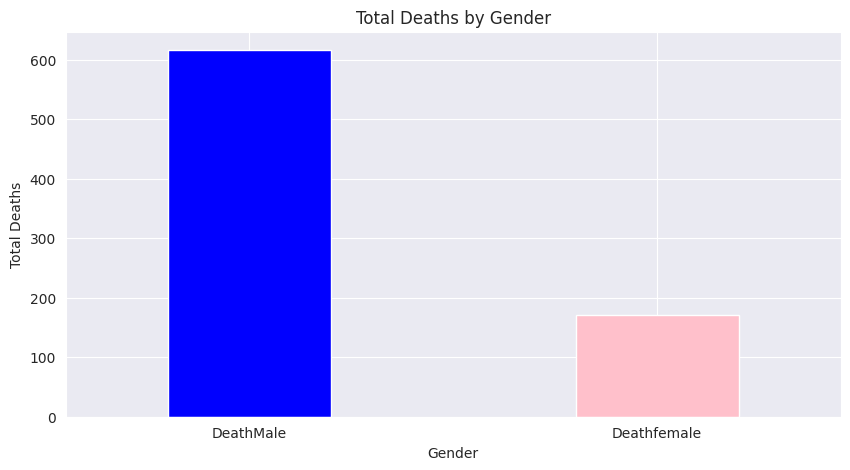

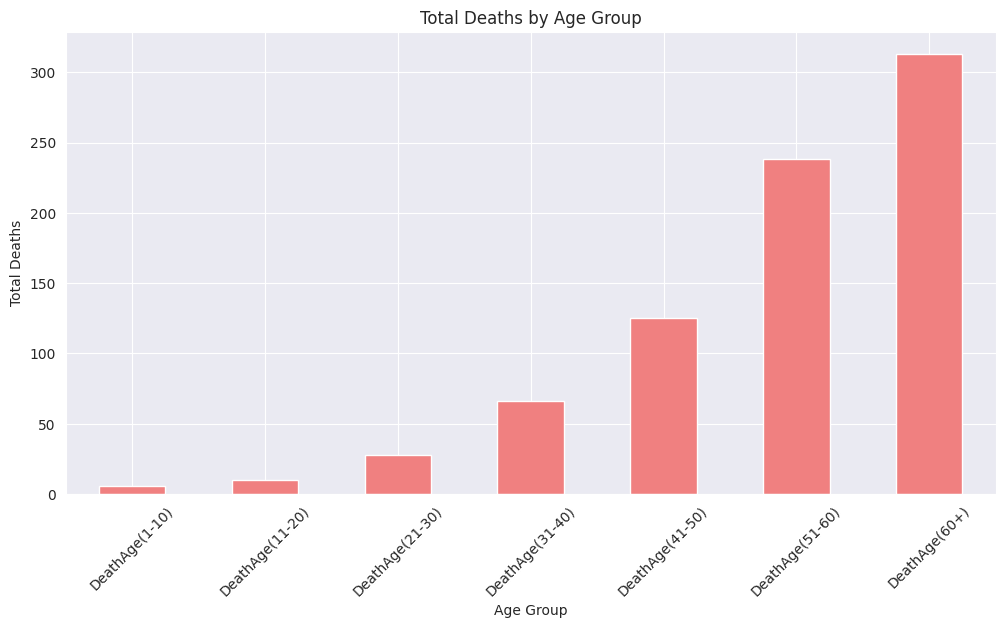

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path for the new dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_Gender_Age_Analysis.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Show dataset preview to understand its structure
print("Dataset Preview:")
print(df.head())

# Summing total deaths by gender
gender_deaths = df[['DeathMale', 'Deathfemale']].sum()

# Summing total deaths by age group
age_group_deaths = df[['DeathAge(1-10)', 'DeathAge(11-20)', 'DeathAge(21-30)', 'DeathAge(31-40)',
                       'DeathAge(41-50)', 'DeathAge(51-60)', 'DeathAge(60+)']].sum()

# Plotting the deaths by gender
plt.figure(figsize=(10, 5))
gender_deaths.plot(kind='bar', color=['blue', 'pink'], width=0.4)
plt.title('Total Deaths by Gender')
plt.ylabel('Total Deaths')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.show()

# Plotting the deaths by age group
plt.figure(figsize=(12, 6))
age_group_deaths.plot(kind='bar', color='lightcoral')
plt.title('Total Deaths by Age Group')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.show()



---------
------------

Bangladesh Covid 19 division wise data representation

In [ ]:
import pandas as pd

# Define file path for the dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "Covid Dataset of Bangladesh divisionwise.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Show dataset preview to understand its structure
print("Dataset Preview:")
print(df.head())

# Drop columns that aren't related to division (if needed), we will focus on division columns.
df_cleaned = df.dropna(axis=1, how='all')  # Remove any columns that are completely NaN

# Create a summary table by summing values for each division's column (Confirmed cases, Deaths, etc.)
# We're assuming columns like 'Confirmed cases Barisal', 'Deaths Barisal', etc., exist

# To focus on only relevant columns, we filter by column names that contain 'Barisal', 'CTG', 'DHK', etc.
division_columns = [col for col in df_cleaned.columns if 'Confirmed' in col or 'Deaths' in col]

# Create a table with total confirmed cases and deaths for each division
table_report = df_cleaned[division_columns].sum()

# Display the table report
print("\nTable Report for Confirmed Cases and Deaths in Each Division:")
print(table_report)



Dataset Preview:
     Date  Confirmed cases Barisal  Case rate Barisal  Deaths Barisal  \
0  Mar-20                      NaN                NaN             NaN   
1  Mar-20                      NaN                NaN             NaN   
2  Mar-20                      NaN                NaN             NaN   
3  Mar-20                      NaN                NaN             NaN   
4  Mar-20                      NaN                NaN             NaN   

   Death Rate Barisal  Confirmed cases CTG  Case rate CTG  Deaths CTG  \
0                 NaN                  NaN            NaN         NaN   
1                 NaN                  NaN            NaN         NaN   
2                 NaN                  NaN            NaN         NaN   
3                 NaN                  NaN            NaN         NaN   
4                 NaN                  NaN            NaN         NaN   

   Death Rate CTG  Confirmed cases DHK  ...  Deaths Rangpur  \
0             NaN                  NaN  ..

Show This report in Plot

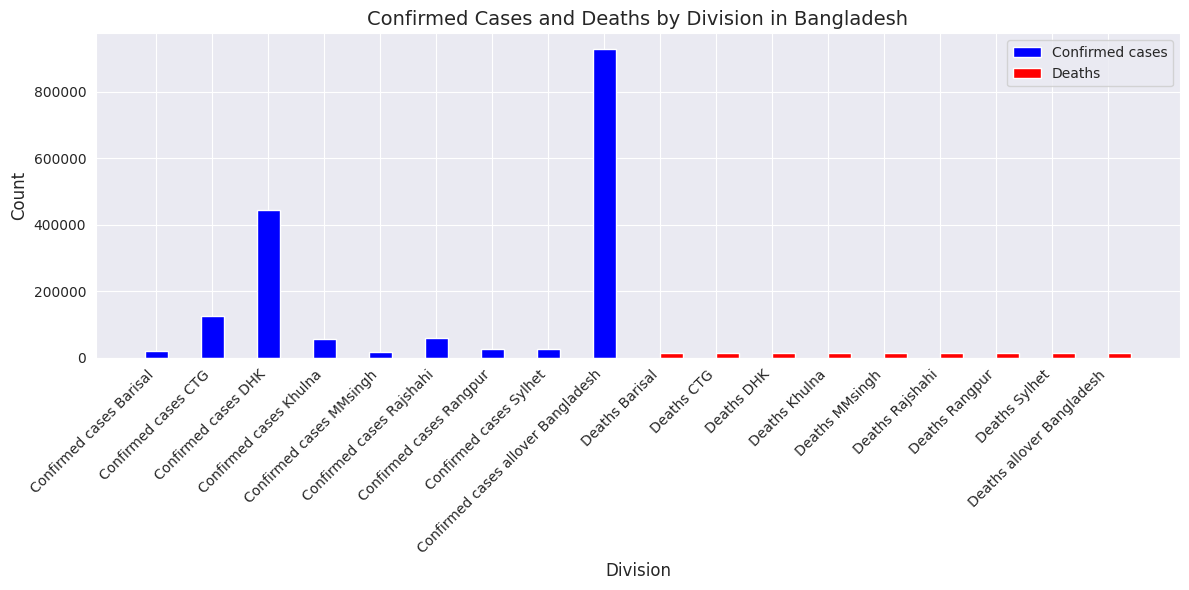

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define file path for the dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "Covid Dataset of Bangladesh divisionwise.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Clean the dataset to focus on relevant columns (Confirmed cases and Deaths for each division)
df_cleaned = df.dropna(axis=1, how='all')  # Remove columns that are completely NaN

# Identify columns related to confirmed cases and deaths for each division
division_columns = [col for col in df_cleaned.columns if 'Confirmed' in col or 'Deaths' in col]

# Create a table with total confirmed cases and deaths for each division
table_report = df_cleaned[division_columns].sum()

# Plotting the histogram for Confirmed cases and Deaths in each division
plt.figure(figsize=(12, 6))

# Plot Confirmed cases
plt.bar(table_report.index[::2], table_report.iloc[::2], width=0.4, label="Confirmed cases", color="blue", align="center")

# Plot Deaths
plt.bar(table_report.index[1::2], table_report.iloc[1::2], width=0.4, label="Deaths", color="red", align="edge")

# Formatting the plot
plt.xlabel("Division", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Confirmed Cases and Deaths by Division in Bangladesh", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


Bangladesh Covid19  Confirmed Cases And Deaths By Division In Bangladesh(Show this result in  Pie chart)

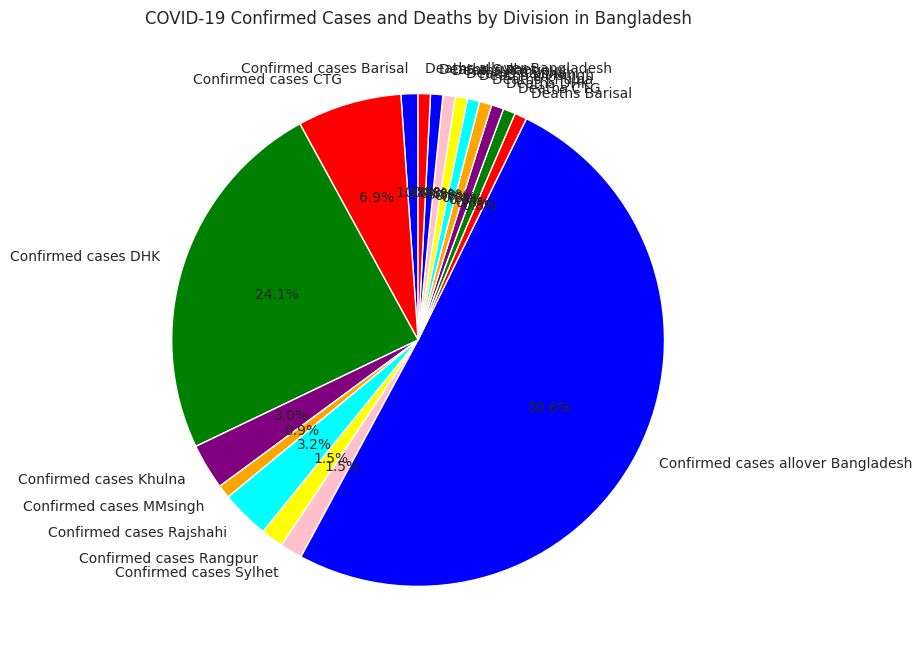

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "Covid Dataset of Bangladesh divisionwise.csv"
file_path = os.path.join(base_path, file_name)

# Load the dataset
df = pd.read_csv(file_path)

# Clean the dataset to remove any completely empty columns
df_cleaned = df.dropna(axis=1, how='all')

# Summing up the confirmed cases and deaths across all divisions
confirmed_cases = df_cleaned.filter(like='Confirmed').sum()
deaths = df_cleaned.filter(like='Deaths').sum()

# Combine the two categories (Confirmed cases and Deaths) using pd.concat
pie_data = pd.concat([confirmed_cases, deaths])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'yellow', 'pink'])
plt.title("COVID-19 Confirmed Cases and Deaths by Division in Bangladesh")

# Show the pie chart
plt.show()



Bangladesh Covid19  Confirmed Cases And Deaths By Division In Bangladesh

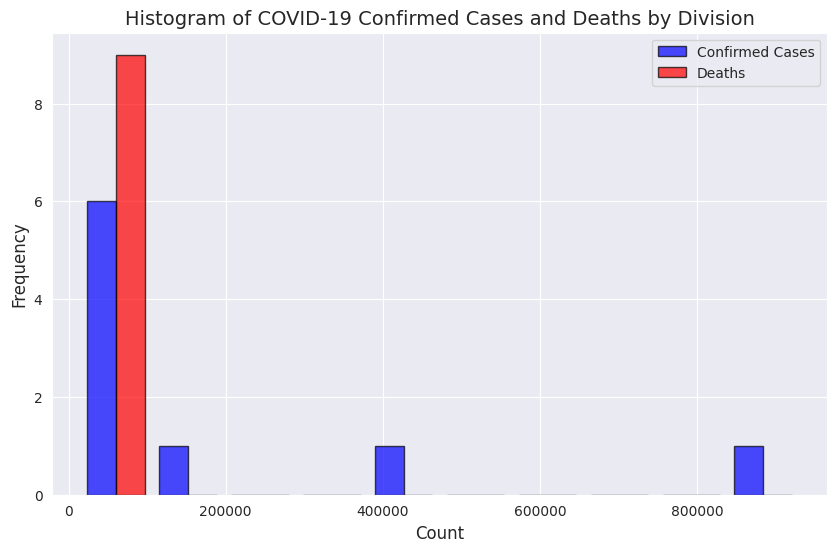

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "Covid Dataset of Bangladesh divisionwise.csv"
file_path = os.path.join(base_path, file_name)

# Load the dataset
df = pd.read_csv(file_path)

# Clean the dataset to remove any completely empty columns
df_cleaned = df.dropna(axis=1, how='all')

# Summing up the confirmed cases and deaths across all divisions
confirmed_cases = df_cleaned.filter(like='Confirmed').sum()
deaths = df_cleaned.filter(like='Deaths').sum()

# Combine the two categories (Confirmed cases and Deaths)
data = pd.concat([confirmed_cases, deaths])

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist([confirmed_cases, deaths], bins=10, label=['Confirmed Cases', 'Deaths'], color=['blue', 'red'], edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of COVID-19 Confirmed Cases and Deaths by Division', fontsize=14)
plt.legend()

# Show the plot
plt.show()


Bangladesh Covid19 Total Confirmed Cases By District With PerCentage Contribution

     Date  Confirmed cases Barisal  Case rate Barisal  Deaths Barisal  \
0  Mar-20                      NaN                NaN             NaN   
1  Mar-20                      NaN                NaN             NaN   
2  Mar-20                      NaN                NaN             NaN   
3  Mar-20                      NaN                NaN             NaN   
4  Mar-20                      NaN                NaN             NaN   

   Death Rate Barisal  Confirmed cases CTG  Case rate CTG  Deaths CTG  \
0                 NaN                  NaN            NaN         NaN   
1                 NaN                  NaN            NaN         NaN   
2                 NaN                  NaN            NaN         NaN   
3                 NaN                  NaN            NaN         NaN   
4                 NaN                  NaN            NaN         NaN   

   Death Rate CTG  Confirmed cases DHK  ...  Deaths Rangpur  \
0             NaN                  NaN  ...             NaN

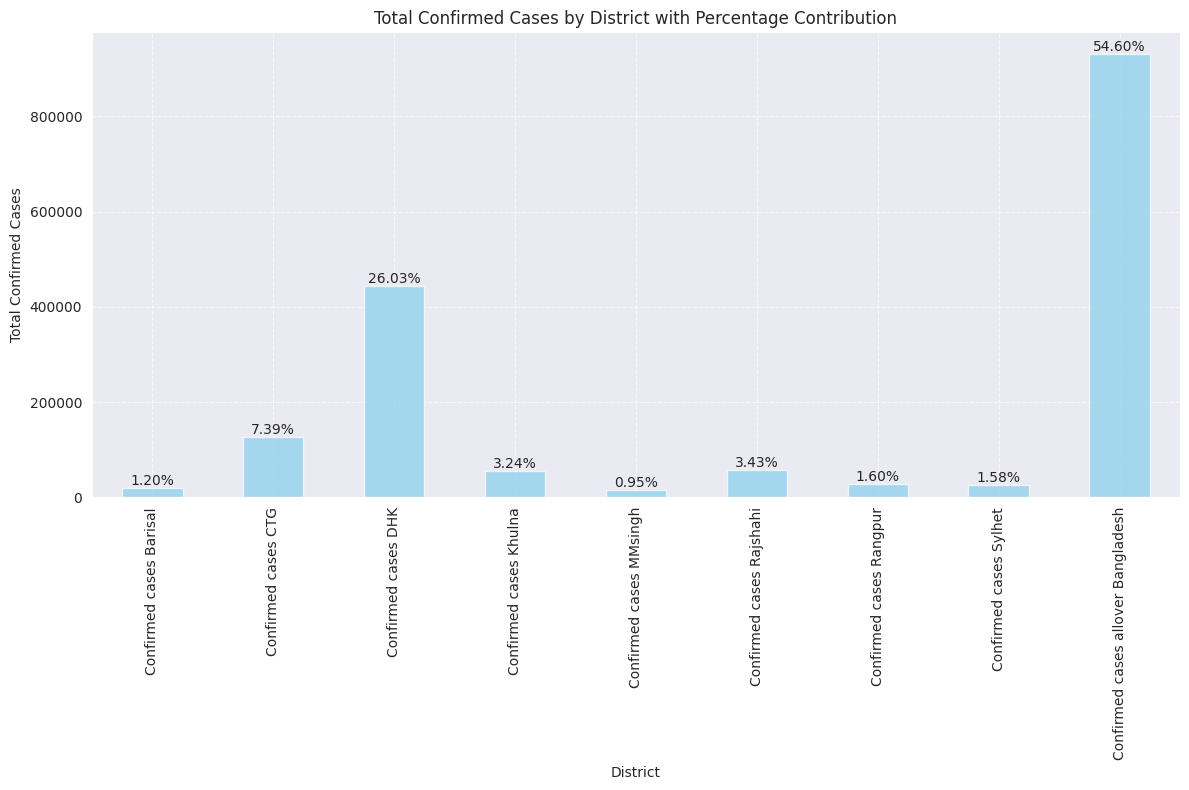

                             District  Total Cases  Percentage Contribution
0             Confirmed cases Barisal      20466.0                 1.201520
1                 Confirmed cases CTG     125792.0                 7.385007
2                 Confirmed cases DHK     443319.0                26.026408
3              Confirmed cases Khulna      55234.0                 3.242682
4             Confirmed cases MMsingh      16161.0                 0.948781
5            Confirmed cases Rajshahi      58369.0                 3.426732
6             Confirmed cases Rangpur      27185.0                 1.595979
7              Confirmed cases Sylhet      26831.0                 1.575197
8  Confirmed cases allover Bangladesh     929986.0                54.597694


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "Covid Dataset of Bangladesh divisionwise.csv"
file_path = os.path.join(base_path, file_name)

# Load the dataset
df = pd.read_csv(file_path)

# Clean the dataset to remove any completely empty columns
df_cleaned = df.dropna(axis=1, how='all')

# Preview the data to understand the structure
print(df_cleaned.head())

# Summing up the confirmed cases and deaths across all divisions
# Assuming district-wise data is included, we'll calculate the total count and amount
# Here I will assume "Confirmed cases" and "Deaths" are column names,
# you can adjust according to the dataset's exact structure.

# Create a list of districts (if needed, adjust based on your data columns)
districts = [col for col in df_cleaned.columns if 'Confirmed cases' in col]

# Total confirmed cases for each district
district_total_cases = df_cleaned[districts].sum(axis=0)

# Calculate the total sum for confirmed cases
total_cases = district_total_cases.sum()

# Calculate the percentage of each district's confirmed cases
district_percentages = (district_total_cases / total_cases) * 100

# Create a bar plot for district-wise confirmed cases
plt.figure(figsize=(12, 8))
district_total_cases.plot(kind='bar', color='skyblue', alpha=0.7, label='Total Cases')

# Add the percentage data on top of the bars
for i, v in enumerate(district_total_cases):
    plt.text(i, v + 100, f"{district_percentages[i]:.2f}%", ha='center', va='bottom', fontsize=10)

plt.title('Total Confirmed Cases by District with Percentage Contribution')
plt.xlabel('District')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# You can also display the data in tabular form
district_report = pd.DataFrame({
    'District': district_total_cases.index,
    'Total Cases': district_total_cases.values,
    'Percentage Contribution': district_percentages.values
})

print(district_report)


Bangladesh Covid19 Total Confirmed Cases And Deaths By District With PerCentage Contribution

     Date  Confirmed cases Barisal  Case rate Barisal  Deaths Barisal  \
0  Mar-20                      NaN                NaN             NaN   
1  Mar-20                      NaN                NaN             NaN   
2  Mar-20                      NaN                NaN             NaN   
3  Mar-20                      NaN                NaN             NaN   
4  Mar-20                      NaN                NaN             NaN   

   Death Rate Barisal  Confirmed cases CTG  Case rate CTG  Deaths CTG  \
0                 NaN                  NaN            NaN         NaN   
1                 NaN                  NaN            NaN         NaN   
2                 NaN                  NaN            NaN         NaN   
3                 NaN                  NaN            NaN         NaN   
4                 NaN                  NaN            NaN         NaN   

   Death Rate CTG  Confirmed cases DHK  ...  Deaths Rangpur  \
0             NaN                  NaN  ...             NaN

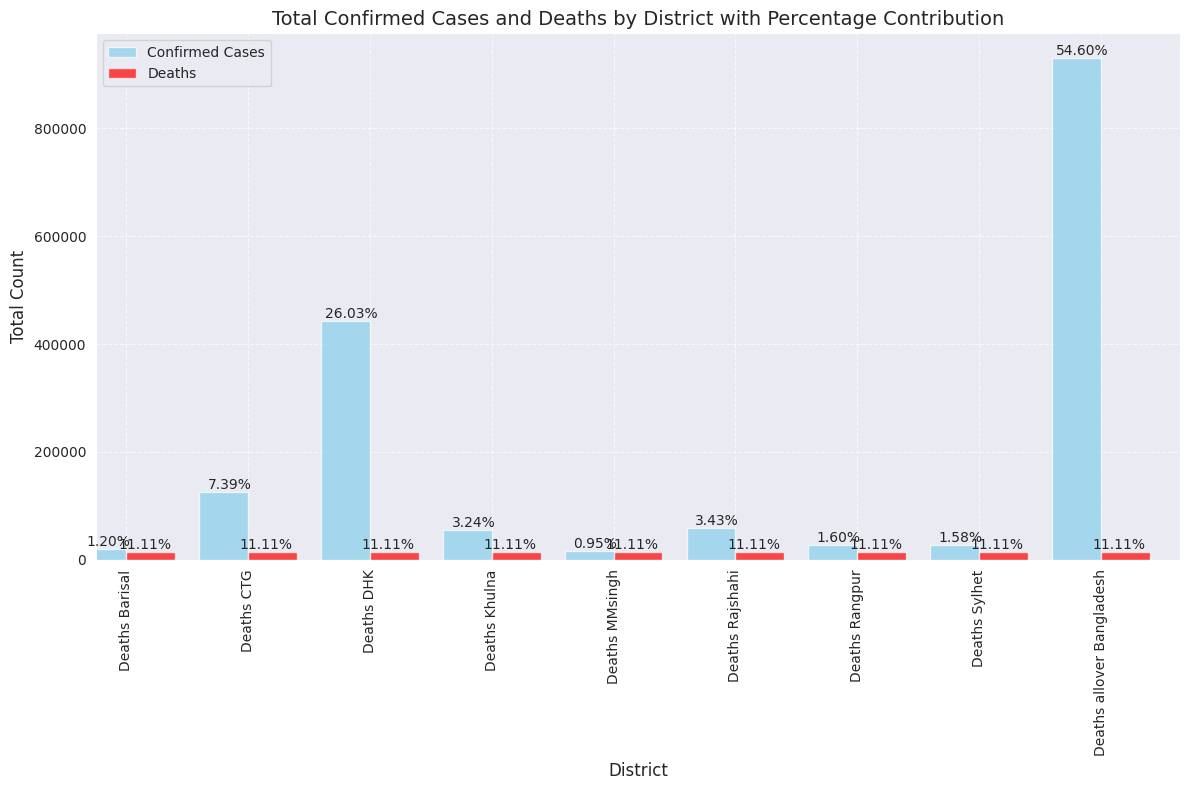

                             District  Total Confirmed Cases  \
0             Confirmed cases Barisal                20466.0   
1                 Confirmed cases CTG               125792.0   
2                 Confirmed cases DHK               443319.0   
3              Confirmed cases Khulna                55234.0   
4             Confirmed cases MMsingh                16161.0   
5            Confirmed cases Rajshahi                58369.0   
6             Confirmed cases Rangpur                27185.0   
7              Confirmed cases Sylhet                26831.0   
8  Confirmed cases allover Bangladesh               929986.0   

   Confirmed Cases Percentage  Total Deaths  Deaths Percentage  
0                    1.201520       14778.0          11.111111  
1                    7.385007       14778.0          11.111111  
2                   26.026408       14778.0          11.111111  
3                    3.242682       14778.0          11.111111  
4                    0.948781     

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "Covid Dataset of Bangladesh divisionwise.csv"
file_path = os.path.join(base_path, file_name)

# Load the dataset
df = pd.read_csv(file_path)

# Clean the dataset to remove any completely empty columns
df_cleaned = df.dropna(axis=1, how='all')

# Preview the data to understand the structure
print(df_cleaned.head())

# Summing up the confirmed cases and deaths across all divisions
# Create a list of districts (if needed, adjust based on your data columns)
districts = [col for col in df_cleaned.columns if 'Confirmed cases' in col]

# Total confirmed cases for each district
district_total_cases = df_cleaned[districts].sum(axis=0)

# Create a list for deaths columns
death_columns = [col for col in df_cleaned.columns if 'Deaths' in col]

# Total deaths for each district
district_total_deaths = df_cleaned[death_columns].sum(axis=0)

# Calculate the total sum for confirmed cases and deaths
total_cases = district_total_cases.sum()
total_deaths = district_total_deaths.sum()

# Calculate the percentage of each district's confirmed cases and deaths
district_cases_percentages = (district_total_cases / total_cases) * 100
district_deaths_percentages = (district_total_deaths / total_deaths) * 100

# Create a bar plot for district-wise confirmed cases and deaths
fig, ax = plt.subplots(figsize=(12, 8))

# Plot Confirmed cases
bars_cases = district_total_cases.plot(kind='bar', color='skyblue', alpha=0.7, ax=ax, position=1, width=0.4, label='Confirmed Cases')

# Plot Deaths
bars_deaths = district_total_deaths.plot(kind='bar', color='red', alpha=0.7, ax=ax, position=0, width=0.4, label='Deaths')

# Add the percentage data on top of the bars
for i, v in enumerate(district_total_cases):
    ax.text(i - 0.15, v + 100, f"{district_cases_percentages[i]:.2f}%", ha='center', va='bottom', fontsize=10)

for i, v in enumerate(district_total_deaths):
    ax.text(i + 0.15, v + 100, f"{district_deaths_percentages[i]:.2f}%", ha='center', va='bottom', fontsize=10)

# Set plot titles and labels
plt.title('Total Confirmed Cases and Deaths by District with Percentage Contribution', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the legend
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Optionally display the data in tabular form
district_report = pd.DataFrame({
    'District': district_total_cases.index,
    'Total Confirmed Cases': district_total_cases.values,
    'Confirmed Cases Percentage': district_cases_percentages.values,
    'Total Deaths': district_total_deaths.values,
    'Deaths Percentage': district_deaths_percentages.values
})

print(district_report)


Bangladesh Covid19 Total Confirmed Cases And Deaths By District Line

  Date  Confirmed cases Barisal  Case rate Barisal  Deaths Barisal  \
0  NaT                      NaN                NaN             NaN   
1  NaT                      NaN                NaN             NaN   
2  NaT                      NaN                NaN             NaN   
3  NaT                      NaN                NaN             NaN   
4  NaT                      NaN                NaN             NaN   

   Death Rate Barisal  Confirmed cases CTG  Case rate CTG  Deaths CTG  \
0                 NaN                  NaN            NaN         NaN   
1                 NaN                  NaN            NaN         NaN   
2                 NaN                  NaN            NaN         NaN   
3                 NaN                  NaN            NaN         NaN   
4                 NaN                  NaN            NaN         NaN   

   Death Rate CTG  Confirmed cases DHK  ...  Deaths Rangpur  \
0             NaN                  NaN  ...             NaN   
1             

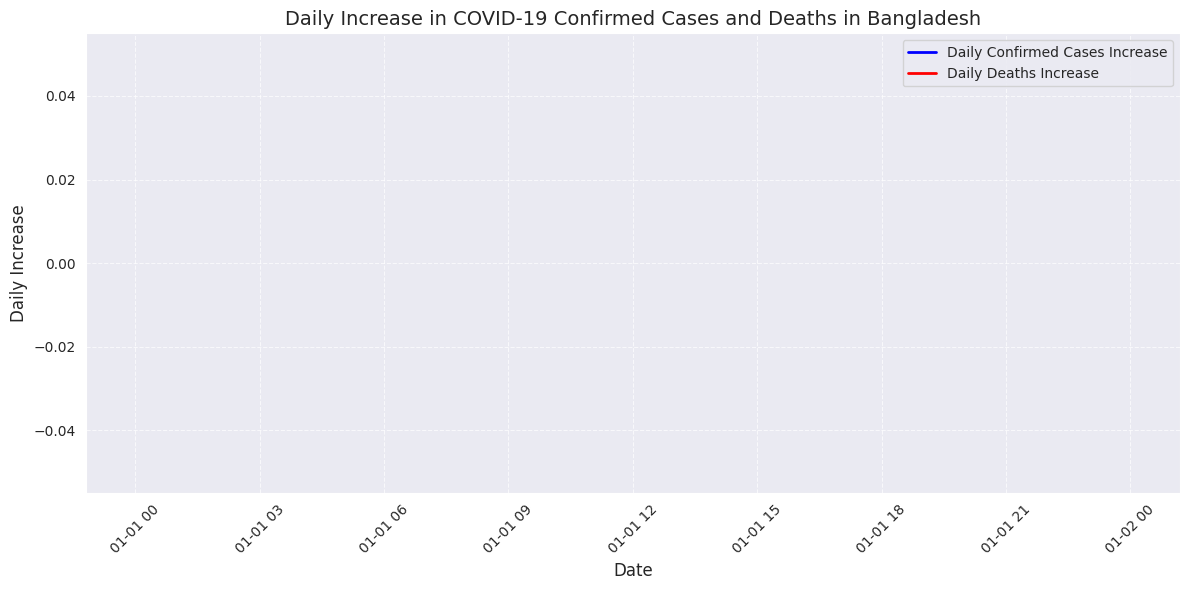

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "Covid Dataset of Bangladesh divisionwise.csv"
file_path = os.path.join(base_path, file_name)

# Load the dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Preview the data to check the date column and relevant columns for Confirmed cases and Deaths
print(df.head())

# Summing up the confirmed cases and deaths across all divisions (or use specific divisions if needed)
confirmed_columns = [col for col in df.columns if 'Confirmed cases' in col]
death_columns = [col for col in df.columns if 'Deaths' in col]

# Calculate the daily increase in confirmed cases and deaths
df['Total_Confirmed'] = df[confirmed_columns].sum(axis=1)
df['Total_Deaths'] = df[death_columns].sum(axis=1)

# Calculate the daily increase (difference between consecutive days)
df['Confirmed_Increase'] = df['Total_Confirmed'].diff().fillna(0)
df['Deaths_Increase'] = df['Total_Deaths'].diff().fillna(0)

# Plot the daily increases in Confirmed cases and Deaths
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Confirmed_Increase'], label='Daily Confirmed Cases Increase', color='blue', linewidth=2)
plt.plot(df['Date'], df['Deaths_Increase'], label='Daily Deaths Increase', color='red', linewidth=2)

# Add titles and labels
plt.title('Daily Increase in COVID-19 Confirmed Cases and Deaths in Bangladesh', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Increase', fontsize=12)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Bangladesh Covid19  Quarantine  Analysis

In [ ]:
import os
import pandas as pd

# Define file path for the updated dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_QuarentineData.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Show dataset preview to understand its structure
print("Dataset Preview:")
print(df.head())

# Drop columns that aren't related to division (if needed), we will focus on division columns.
df_cleaned = df.dropna(axis=1, how='all')  # Remove any columns that are completely NaN

# Create a summary table by summing values for each division's column (Confirmed cases, Deaths, etc.)
# We're assuming columns like 'Confirmed cases Barisal', 'Deaths Barisal', etc., exist

# To focus on only relevant columns, we filter by column names that contain 'Barisal', 'CTG', 'DHK', etc.
division_columns = [col for col in df_cleaned.columns if 'Confirmed' in col or 'Deaths' in col]

# Create a table with total confirmed cases and deaths for each division
table_report = df_cleaned[division_columns].sum()

# Display the table report
print("\nTable Report for Confirmed Cases and Deaths in Each Division:")
print(table_report)


Dataset Preview:
        Date  HomeQuarentine  HReleased  FacilityQuarentine  FReleased
0  3/17/2020           17781        360                  70          0
1  3/18/2020            1549        162                   8          0
2  3/19/2020            2698        165                  15          1
3  3/20/2020            5149        275                   9          0
4  3/21/2020            3396        637                  13          1

Table Report for Confirmed Cases and Deaths in Each Division:
Series([], dtype: float64)


Dataset Preview:
        Date  HomeQuarentine  HReleased  FacilityQuarentine  FReleased
0  3/17/2020           17781        360                  70          0
1  3/18/2020            1549        162                   8          0
2  3/19/2020            2698        165                  15          1
3  3/20/2020            5149        275                   9          0
4  3/21/2020            3396        637                  13          1

Column Names in Dataset:
Index(['Date', 'HomeQuarentine', 'HReleased', 'FacilityQuarentine',
       'FReleased'],
      dtype='object')

Table Report:
HomeQuarentine        282890
HReleased             230948
FacilityQuarentine     15542
FReleased              12024
dtype: int64


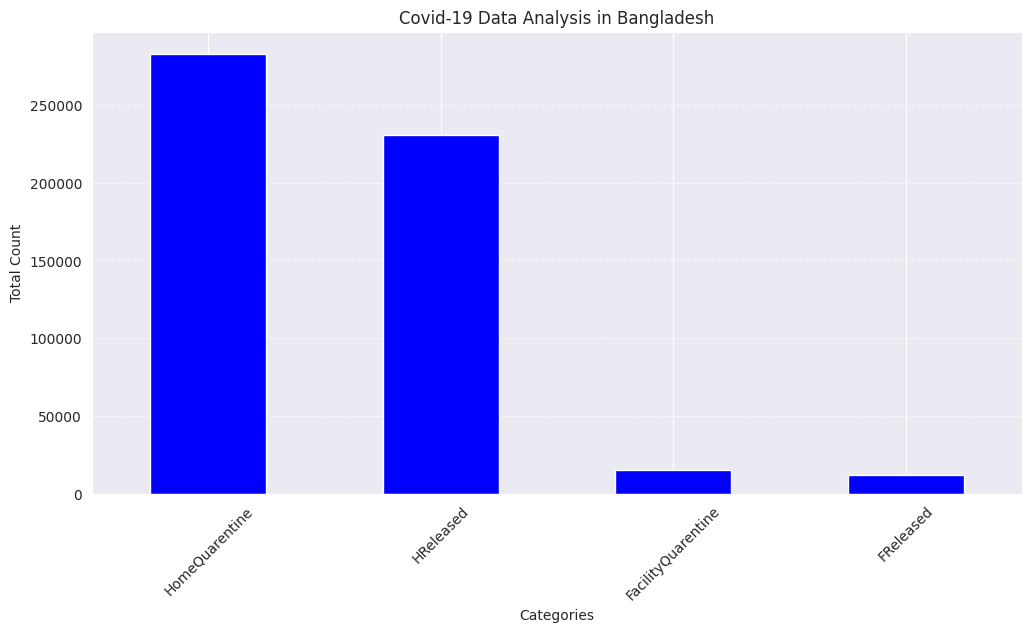

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define file path for the updated dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_QuarentineData.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Show dataset preview to understand its structure
print("Dataset Preview:")
print(df.head())

# Print column names to understand available data
print("\nColumn Names in Dataset:")
print(df.columns)

# Drop columns that aren't related to division (if needed), we will focus on division columns.
df_cleaned = df.dropna(axis=1, how='all')  # Remove any columns that are completely NaN

# Identify relevant columns by inspecting column names
relevant_keywords = ['Confirmed', 'Deaths', 'Quarentine', 'Released']  # Adjusted to dataset contents
division_columns = [col for col in df_cleaned.columns if any(keyword in col for keyword in relevant_keywords)]

# Ensure we have valid columns before proceeding
if not division_columns:
    print("No relevant columns found for confirmed cases or deaths. Please check the dataset structure.")
else:
    # Create a table with total counts for relevant columns
    table_report = df_cleaned[division_columns].sum()

    # Display the table report
    print("\nTable Report:")
    print(table_report)

    # Plot the data
    plt.figure(figsize=(12, 6))
    table_report.plot(kind='bar', color='blue')
    plt.xlabel("Categories")
    plt.ylabel("Total Count")
    plt.title("Covid-19 Data Analysis in Bangladesh")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



Bangladesh Covid19 Home Quarantine

Dataset Preview:
            HomeQuarentine  HReleased  FacilityQuarentine  FReleased
Date                                                                
2020-03-17           17781        360                  70          0
2020-03-18            1549        162                   8          0
2020-03-19            2698        165                  15          1
2020-03-20            5149        275                   9          0
2020-03-21            3396        637                  13          1


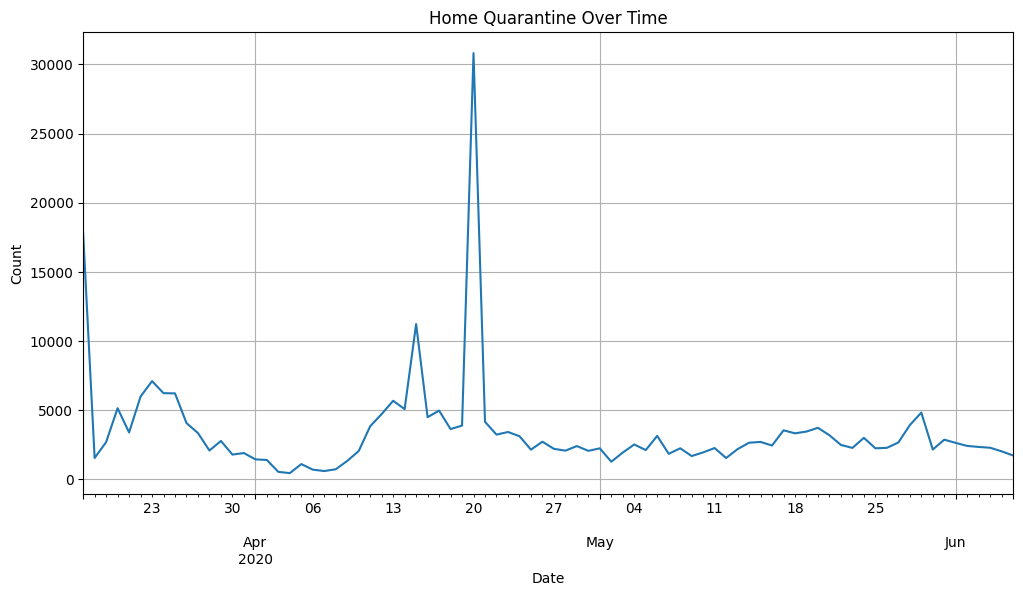

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


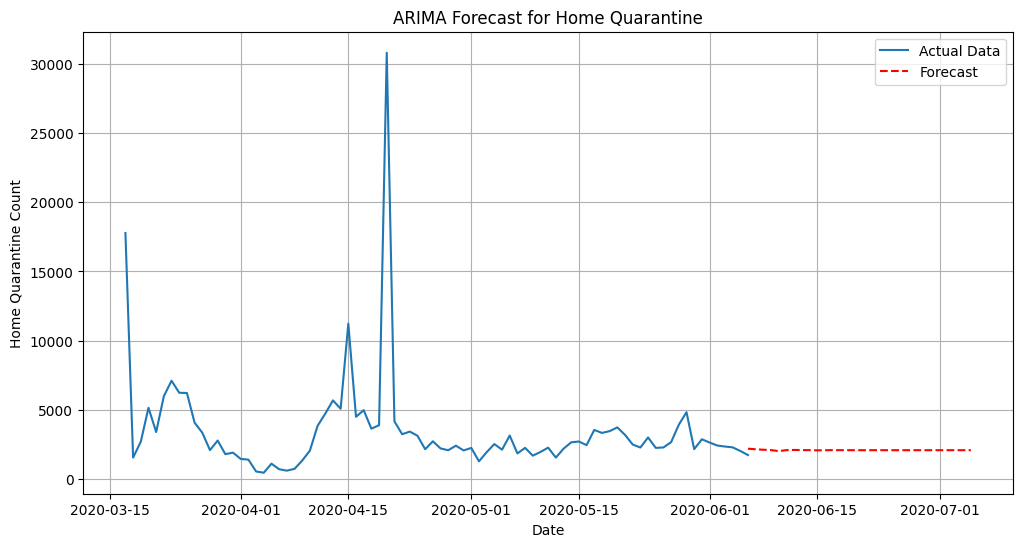

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Define file path for the updated dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_QuarentineData.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')  # Set Date as index

# Show dataset preview to understand its structure
print("Dataset Preview:")
print(df.head())

# Select a time-series column for ARIMA forecasting (e.g., HomeQuarantine)
time_series = df['HomeQuarentine'].dropna()

# Plot the original time series
time_series.plot(figsize=(12, 6), title='Home Quarantine Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.show()

# Fit ARIMA model
order = (5,1,0)  # Adjust order (p,d,q) as needed
model = ARIMA(time_series, order=order)
model_fit = model.fit()

# Forecast future values
forecast_steps = 30  # Predict next 30 days
forecast = model_fit.forecast(steps=forecast_steps)

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Actual Data')
plt.plot(pd.date_range(start=time_series.index[-1], periods=forecast_steps, freq='D'), forecast, label='Forecast', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Home Quarantine Count')
plt.title('ARIMA Forecast for Home Quarantine')
plt.legend()
plt.grid()
plt.show()


Dataset Preview:
            HomeQuarentine  HReleased  FacilityQuarentine  FReleased
Date                                                                
2020-03-17           17781        360                  70          0
2020-03-18            1549        162                   8          0
2020-03-19            2698        165                  15          1
2020-03-20            5149        275                   9          0
2020-03-21            3396        637                  13          1


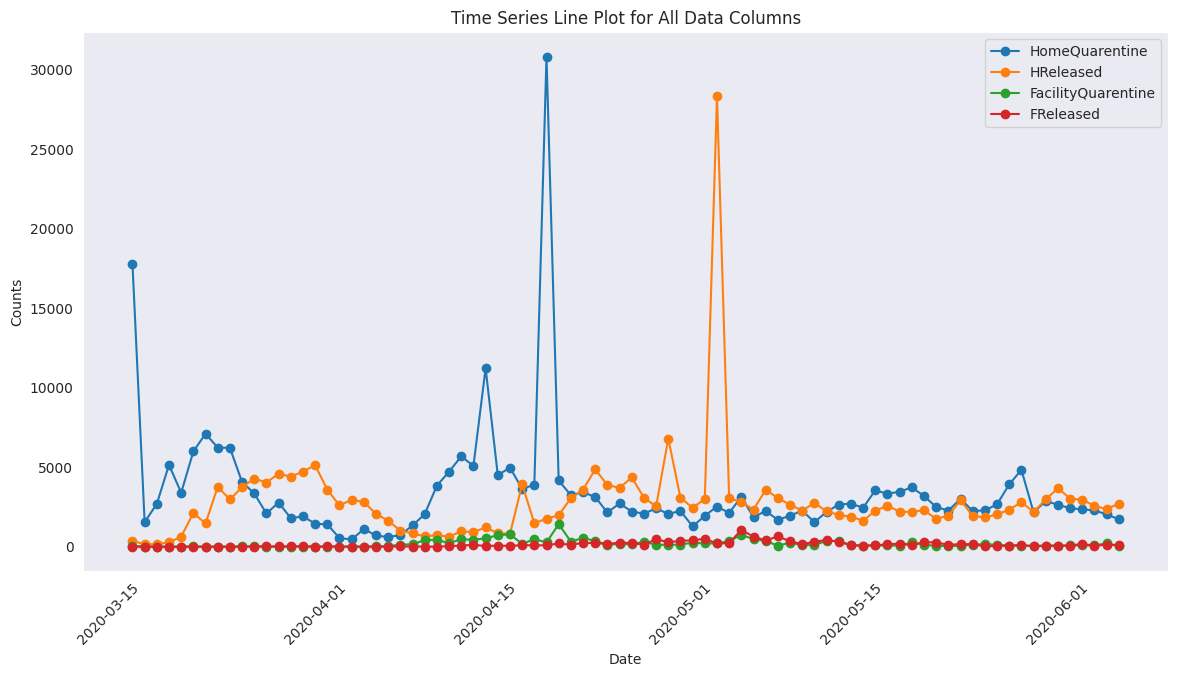

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define file path for the updated dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_QuarentineData.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')  # Set Date as index

# Show dataset preview to understand its structure
print("Dataset Preview:")
print(df.head())

# Plot all time-series data
plt.figure(figsize=(14, 7))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Time Series Line Plot for All Data Columns')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


Dataset Preview:
            HomeQuarentine  HReleased  FacilityQuarentine  FReleased
Date                                                                
2020-03-17           17781        360                  70          0
2020-03-18            1549        162                   8          0
2020-03-19            2698        165                  15          1
2020-03-20            5149        275                   9          0
2020-03-21            3396        637                  13          1


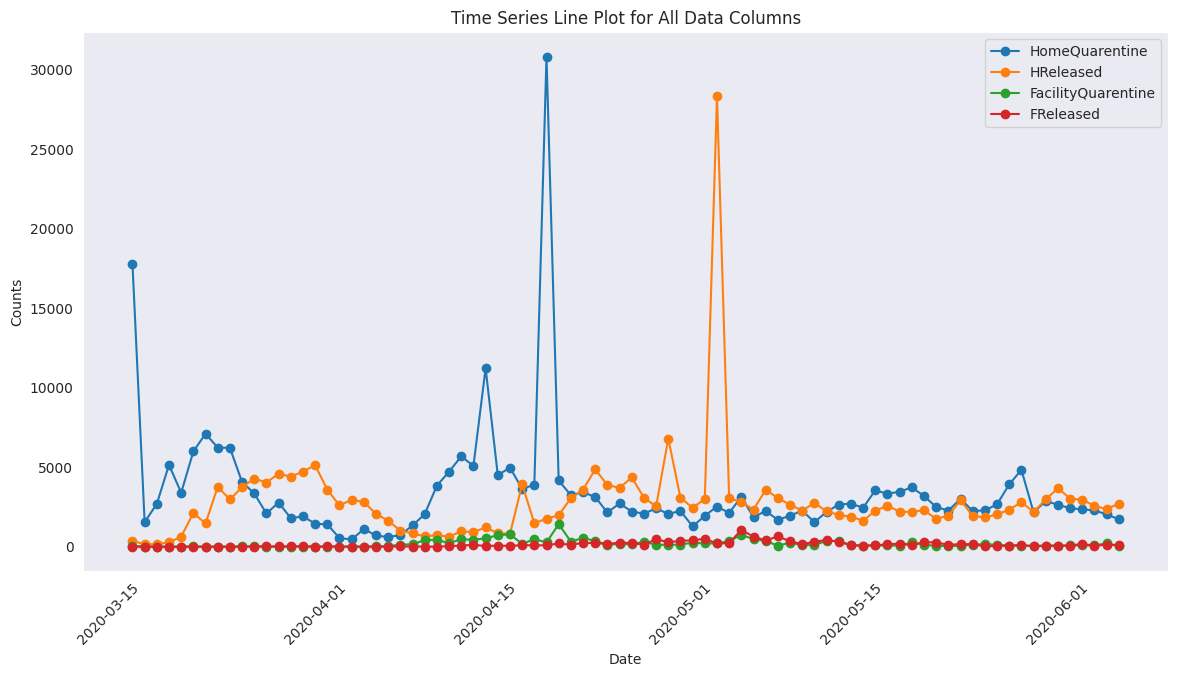

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)



Prediction Report:
                 Date  Predicted_HomeQuarentine
2020-06-07 2020-06-07               2195.363828
2020-06-08 2020-06-08               2150.880315
2020-06-09 2020-06-09               2118.093381
2020-06-10 2020-06-10               2091.600178
2020-06-11 2020-06-11               2018.652630
2020-06-12 2020-06-12               2087.728145
2020-06-13 2020-06-13               2104.041014
2020-06-14 2020-06-14               2090.876051
2020-06-15 2020-06-15               2087.870881
2020-06-16 2020-06-16               2073.627836
2020-06-17 2020-06-17               2081.870342
2020-06-18 2020-06-18               2088.700546
2020-06-19 2020-06-19               2086.274955
2020-06-20 2020-06-20               2085.404089
2020-06-21 2020-06-21               2082.949168
2020-06-22 2020-06-22               2083.578843
2020-06-23 2020-06-23               2085.290322
2020-06-24 2020-06-24               2085.070727
2020-06-25 2020-06-25               2084.797713
2020-06-26 2020-06-2

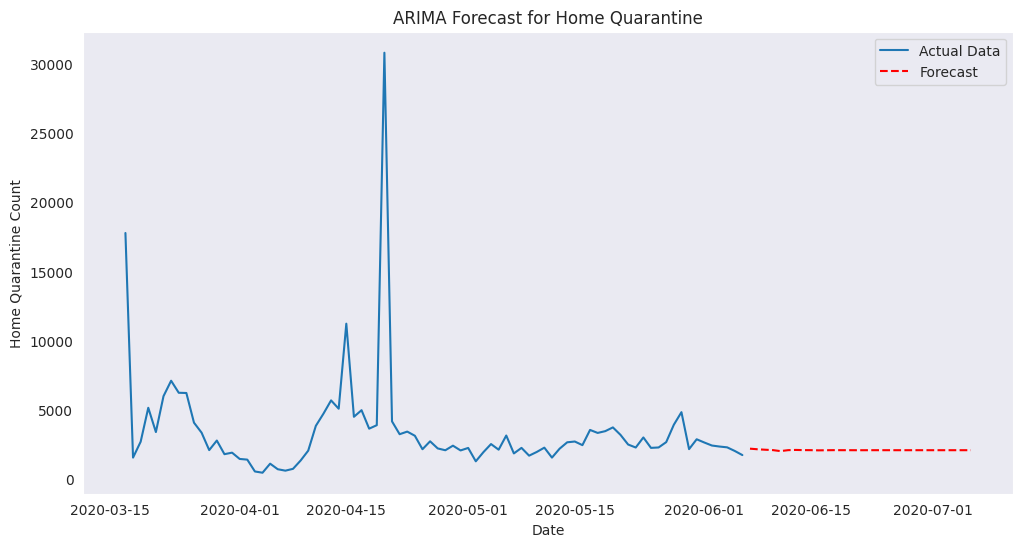

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Define file path for the updated dataset
base_path = "/content/drive/My Drive/Covid-19-Analysis-and-Prediction-mainSS/Covid-19-Analysis-and-Prediction-main/"
file_name = "COVID_DataSet_Bangladesh_QuarentineData.csv"
file_path = os.path.join(base_path, file_name)

# Load dataset
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.set_index('Date')  # Set Date as index

# Show dataset preview to understand its structure
print("Dataset Preview:")
print(df.head())

# Plot all time-series data
plt.figure(figsize=(14, 7))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Time Series Line Plot for All Data Columns')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()

# Perform ARIMA-based prediction on a selected column (e.g., HomeQuarentine)
prediction_column = 'HomeQuarentine'
if prediction_column in df.columns:
    time_series = df[prediction_column].dropna()

    # Fit ARIMA model
    order = (5,1,0)  # Adjust order (p,d,q) as needed
    model = ARIMA(time_series, order=order)
    model_fit = model.fit()

    # Forecast future values
    forecast_steps = 30  # Predict next 30 days
    forecast = model_fit.forecast(steps=forecast_steps)

    # Display forecasted values
    forecast_dates = pd.date_range(start=time_series.index[-1], periods=forecast_steps+1, freq='D')[1:]
    prediction_report = pd.DataFrame({'Date': forecast_dates, 'Predicted_HomeQuarentine': forecast})
    print("\nPrediction Report:")
    print(prediction_report)

    # Plot forecast
    plt.figure(figsize=(12, 6))
    plt.plot(time_series, label='Actual Data')
    plt.plot(forecast_dates, forecast, label='Forecast', linestyle='dashed', color='red')
    plt.xlabel('Date')
    plt.ylabel('Home Quarantine Count')
    plt.title('ARIMA Forecast for Home Quarantine')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print(f"Column '{prediction_column}' not found in dataset.")


# Chapter 10 : Conclusion :

All World Covid 19-

The COVID-19 pandemic, which emerged in late 2019, has had profound and lasting effects on global health, economies, and societies. With millions of infections and deaths recorded worldwide, the virus challenged healthcare systems, exposed vulnerabilities in public health infrastructure, and led to unprecedented lockdowns and restrictions.

Governments and scientific communities responded with rapid vaccine development, public health measures, and economic support programs. The global vaccination campaign played a crucial role in reducing severe cases and deaths, though challenges such as vaccine distribution disparities and new variants remained persistent threats.

Beyond health implications, COVID-19 reshaped the global economy, leading to supply chain disruptions, job losses, and a shift toward remote work and digitalization. Social behaviors, travel patterns, and educational systems also underwent significant transformations, many of which continue to influence the post-pandemic world.

While the acute phase of the pandemic has subsided, ongoing vigilance, improved healthcare preparedness, and international cooperation remain essential to mitigate future pandemics. The lessons learned from COVID-19 emphasize the importance of scientific research, early intervention, and global solidarity in addressing public health crises.

Bangladesh Covid 19 -

The COVID-19 pandemic had a significant impact on Bangladesh, affecting public health, the economy, and daily life. Since the first reported case in March 2020, the country experienced multiple waves of infection, with hospitals facing critical challenges due to limited healthcare infrastructure. Despite these difficulties, Bangladesh took decisive measures, including lockdowns, mask mandates, and social distancing policies, to control the virus's spread.

The nationwide vaccination campaign played a crucial role in reducing severe cases and mortality rates. The government, in collaboration with international organizations, ensured mass vaccination, prioritizing frontline workers and vulnerable populations. However, challenges such as vaccine hesitancy, misinformation, and logistical issues initially slowed progress.

Economically, the pandemic caused disruptions in industries such as garments, transportation, and tourism. Millions of people, especially in the informal sector, lost their jobs, increasing poverty and food insecurity. The government and NGOs provided stimulus packages and relief programs to support affected communities.

Despite the hardships, Bangladesh demonstrated resilience, with the economy rebounding as restrictions eased. The pandemic also accelerated digital transformation, with remote work, online education, and e-commerce gaining traction. Moving forward, continued investment in healthcare, pandemic preparedness, and economic recovery will be essential for long-term resilience against future public health crises.

### Stay Home! Stay Safe!

### Thank You!